# Installing and importing Libraries

In [270]:
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Core data manipulation libraries
import pandas as pd
import numpy as np

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Metrics
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
from scipy.stats import normaltest

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500) # To display all the columns of dataframe
pd.set_option("max_colwidth", None) # To set the width of the column to maximum

# Load Data

In [271]:
# Load the datasets
df_customer_churn = pd.read_csv("BankChurners.csv")
# Verify shapes
print("Data Shape:", df_customer_churn.shape)

Data Shape: (10127, 23)


# Data Preview and Info

In [272]:
# Display few rows of dataset
print("Data Preview:")
display(df_customer_churn.head())

Data Preview:


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                                                                                                            0.000093   
1                                                                                                                            0.000057   
2                                                                                                                            0.000021   
3                                                                                                                            0.000134   
4                                                                                                                            0.000022   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                                                                                                             0.99991  
1                                                                                                                             0.99994  
2                                                                                                                             0.99998  
3                                                                                                                             0.99987  
4                                                                                                   

In [273]:
# Display information about the DataFrames
print("Data Info:")
df_customer_churn.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                

In [274]:
# Col. index 21 and 22 are not meaningful, so dropping it.
cols_to_drop=df_customer_churn.columns[[21,22]].to_list()
df=df_customer_churn.drop(columns=cols_to_drop, axis=1).copy()
print(f"Dataset shape after dropping unwanted col {df.shape}")
print(df.columns.tolist)

Dataset shape after dropping unwanted col (10127, 21)
<bound method IndexOpsMixin.tolist of Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')>


In [275]:
# Renaming back to df_customer_churn
df_customer_churn=df.copy()

# stripping the columns
df_customer_churn.columns = (
    df_customer_churn.columns
    .str.strip())

cat_features = ["Attrition_Flag", "Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Dependent_count",
                "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Total_Relationship_Count"]

num_features = ["Customer_Age", "Credit_Limit", "Avg_Open_To_Buy", "Total_Trans_Amt", "Months_on_book", 
                "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Total_Amt_Chng_Q4_Q1", "Avg_Utilization_Ratio", "Total_Revolving_Bal"]

# Converting datatype as category for default numeric variable
def convert_cat(df, cat_features= cat_features):
    for feature in cat_features:
        if feature in df.columns:
            df[feature] = df[feature].astype("category")
        else:
            pass

convert_cat(df=df_customer_churn)

# Changing data type min run time.
df_customer_churn[num_features] = df_customer_churn[num_features].astype({
    "Customer_Age": "int8",
    "Credit_Limit": "float32",
    "Avg_Open_To_Buy": "float32",
    "Total_Trans_Amt": "int32",
    "Months_on_book": "int8",
    "Total_Trans_Ct": "int16",
    "Total_Ct_Chng_Q4_Q1": "float32",
    "Total_Amt_Chng_Q4_Q1": "float32",
    "Avg_Utilization_Ratio": "float32",
    "Total_Revolving_Bal": "int16"})

# Print updated DataFrame info to verify changes
print("Updated Data Info:")
df_customer_churn.info()


Updated Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int8    
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  category
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int8    
 10  Total_Relationship_Count  10127 non-null  category
 11  Months_Inactive_12_mon    10127 non-null  category
 12  Contacts_Count_12_mon     10127 non-null  category
 13  Credit_Limit              1

## Insights from Initial Data Exploration

**Data Completeness**  
   - The dataset have **no missing values**, we need to handle this issue.
   - Data types are appropriate: numerical features is float64 and int64, and categorical features are objects (strings).
   - The columns with column index 21 and 22 are not meaningful for analysis. So these columns are not really a part of the information we should care about. We can drop them.

In [276]:
print("Data describe:")
cm = sns.light_palette("green", as_cmap=True)
display(df_customer_churn.drop(columns="CLIENTNUM", axis=1).describe().T.style.background_gradient(cmap=cm))

Data describe:


## Descriptive Insights – Numerical Features

* **Variability Insights**: High variability (CV >70%) in credit and transaction features like Credit_Limit (105%), Avg_Open_To_Buy (122%), and Total_Trans_Amt (77%) indicates potential churn drivers due to diverse customer behaviors; low variability (CV <30%) in age and tenure suggests more consistent distributions.
* **Potential Importance**: Credit-related variables (e.g., Credit_Limit, Avg_Utilization_Ratio) show high dispersion and patterns (e.g., maxed-out ratios signaling risk), making them hypothesized as key predictors; transaction changes highlight behavioral shifts for upsell or churn opportunities.
**Summary**
* **Credit and transaction features show high variance** → Consider scaling or transformation
* **Age and tenure are more normally distributed** → Easier to model

In [277]:
print("Data describe:")
df_customer_churn.describe(include=["category", "object"]).T

Data describe:


count unique                top  freq
Attrition_Flag            10127      2  Existing Customer  8500
Gender                    10127      2                  F  5358
Dependent_count           10127      6                  3  2732
Education_Level           10127      7           Graduate  3128
Marital_Status            10127      4            Married  4687
Income_Category           10127      6     Less than $40K  3561
Card_Category             10127      4               Blue  9436
Total_Relationship_Count  10127      6                  3  2305
Months_Inactive_12_mon    10127      7                  3  3846
Contacts_Count_12_mon     10127      7                  3  3380



### Summary Table

| Main Insight                                   | Recommended Action                                |
|------------------------------------------------|---------------------------------------------------|
| `Attrition_Flag` is imbalanced (85% vs. 15%)   | Use resampling techniques or class weighting      |
| `Card_Category` heavily skewed toward `Blue`   | Group rare types or apply frequency encoding      |
| Behavioral variables show usage differences    | Leverage these for churn prediction               |
| Ordinal features (`Income_Category`, `Dependent_count`) | Use ordinal encoding or binning         |


# Data Quality Checks

## Missing Value

In [278]:
def displayNULL(df, dataset_name = None, style = 1):
    if style == 1 and dataset_name is None:
        for column in df.columns:
            if df[column].isna().sum() > 0:
                print(f"Column: {column}: {df[column].isnull().sum()}")
            else:
                pass
    else:
        missing_count = df.isnull().sum().sum()
        rows = len(df)
        
        
        if missing_count == 0:
            print(f" No missing values detected in {rows:,} rows")
        else:
            print(f"  {missing_count} missing values found in {rows:,} rows")

displayNULL(df=df_customer_churn, dataset_name="Data", style=2)

 No missing values detected in 10,127 rows


## Checking duplicate Value

In [279]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    if duplicates_count == 0:
        print(f" No duplicates found in {total_rows:,} rows")
    else:
        print(f"  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

duplicate_summary = {}
check_duplicates_report(df=df_customer_churn, dataset_name="Data")
duplicate_summary["Data"] = {
    "duplicates": df_customer_churn.duplicated().sum(),
    "total_rows": len(df_customer_churn)
}

 No duplicates found in 10,127 rows


## Checking Outlier Value

In [280]:
numeric_features = [
    "Customer_Age", "Credit_Limit", "Avg_Open_To_Buy", "Total_Trans_Amt", "Months_on_book", 
    "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Total_Amt_Chng_Q4_Q1", 
    "Avg_Utilization_Ratio", "Total_Revolving_Bal"]

def checking_outlier(list_feature, df, dataset_name):
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            # "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)


checking_outlier(list_feature=numeric_features, df=df_customer_churn, dataset_name="Data")

Feature  Outlier Count
0          Customer_Age              2
1          Credit_Limit            984
2       Avg_Open_To_Buy            963
3       Total_Trans_Amt            896
4        Months_on_book            386
5        Total_Trans_Ct              2
6   Total_Ct_Chng_Q4_Q1            396
7  Total_Amt_Chng_Q4_Q1            395

# Exploratory Data Analysis

In [281]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [282]:
# Collection of statistical test functions for analyzing relationships between categorical 
# and numerical features in datasets, such as credit card customer data for churn prediction.

def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    
    print(f"\nChi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("Result: p-value < 0.05 -> Reject H0")
        print(f"-> There is a statistically significant association between '{cat_feature}' and '{target_feature}'.")
    else:
        print("Result: p-value >= 0.05 -> Fail to reject H0")
        print(f"-> No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\nExpected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\nStandardized Residuals:")
        print(round(residuals, 2))
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    
    print(f"Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    
    print(f"Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()    
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]    
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)
    
    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("Variances are approximately equal across groups.")
    else:
        print("Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    
    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H0: The distributions of the two groups are equal.")
    print("H1: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\nResult: Statistically significant difference between the two groups (Reject H0).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\nResult: No statistically significant difference between the two groups (Fail to reject H0).")

def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    
    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\nT-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\nSignificant difference found (p < 0.05)")
            print(f"\nCohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"Effect size interpretation: {size} effect")
        else:
            print("\nNo significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    
    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\nANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\nANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\nSignificant difference found (p < 0.05)")
            print("Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nNo significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    
    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\nKruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("Significant difference found. Running Dunn's Post-Hoc Test...")
            # Note: This requires scikit-posthocs library, which may need installation (pip install scikit-posthocs)
            import scikit_posthocs as sp
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nNo significant difference found (p >= 0.05)")

def cal_Anderson(df, numerical_col, group_col):
   
    groups = df[group_col].dropna().unique()
    
    print(f"Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test:\n")
    print("H0: The data follows a normal distribution.")
    print("If test statistic > critical value -> Reject H0 -> Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")
        
        print(f"Group = {group}")
        print(f"  - Sample size: {len(data)}")
        print(f"  - Test statistic: {result.statistic:.4f}")
        
        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "Reject H0 -> Not normal" if result.statistic > cv else "Fail to reject H0 -> Possibly normal"
            print(f"    - a = {sl}% | CV = {cv:.4f} -> {verdict}")
        print()

def cal_normaltest(cat_feature, num_feature, df):
    
    print(f"D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")
        
        if n < 8:
            print(f"Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")
        
        if p > 0.05:
            print(f"  Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  Interpretation: Data does not appear to follow a normal distribution.\n")


| Test Name | Purpose | Conditions for Performance | Null Hypothesis (H₀) | Alternative Hypothesis (H₁) | When Recommended |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Chi-Square Test of Independence** | To check if two categorical variables are associated or independent. | Two categorical variables from a single population. | The two variables are independent (no association). | The two variables are dependent (there is an association). | When analyzing the relationship between two categorical variables. |
| **Shapiro-Wilk Test** | To assess if a sample of data is from a normally distributed population. | Requires at least 3 values; not reliable for sample sizes > 5000. | The data is normally distributed. | The data is not normally distributed. | Checking the normality assumption for parametric tests, especially with smaller samples. |
| **Levene’s Test** | To assess the equality (homogeneity) of variances for a numeric variable across two or more groups. | Samples are independent. | All groups have equal variances. | At least one group has a different variance. | To check the homoscedasticity assumption before performing a T-test or ANOVA. |
| **Mann-Whitney U Test** | To compare the distributions of a numerical feature between two independent groups. | Exactly two independent groups; does not assume normality. | The distributions of the two groups are equal. | The distributions are different. | As a non-parametric alternative to the independent T-test when normality is violated. |
| **Independent Two-Sample T-Test** | To compare the means of a numeric variable between two independent groups. | Data is normally distributed; requires two independent groups. Welch's test is used if variances are unequal. | The means of the two groups are equal. | The means are significantly different. | When comparing the means of two groups that meet parametric assumptions. |
| **One-Way ANOVA** | To check for significant differences between the means of three or more independent groups. | Data is normally distributed; homogeneity of variances; three or more independent groups. | All group means are equal. | At least one group mean is different. | When comparing the means of three or more groups that meet parametric assumptions. |
| **Kruskal-Wallis H-Test** | To check for significant differences in the distribution of a variable across three or more independent groups. | Three or more independent groups; assumes similar distribution shapes. | The distribution of the variable is the same across all groups. | At least one group has a different distribution. | As a non-parametric alternative to ANOVA when the normality assumption is violated. |
| **Anderson-Darling Test** | To test if a sample of data comes from a normal distribution. | More sensitive to deviations in the tails; not for very small (<8) samples. | The data follows a normal distribution. | The data does not follow a normal distribution. | As a rigorous normality test, especially when tail behavior is important. |
| **D’Agostino & Pearson’s Test** | To test for normality by evaluating the skewness and kurtosis of the data. | Recommended for sample sizes of 20 or more. | The data is normally distributed. | The data is not normally distributed. | As a general-purpose normality test for samples that are not very small. |


##  Attrition Distribution

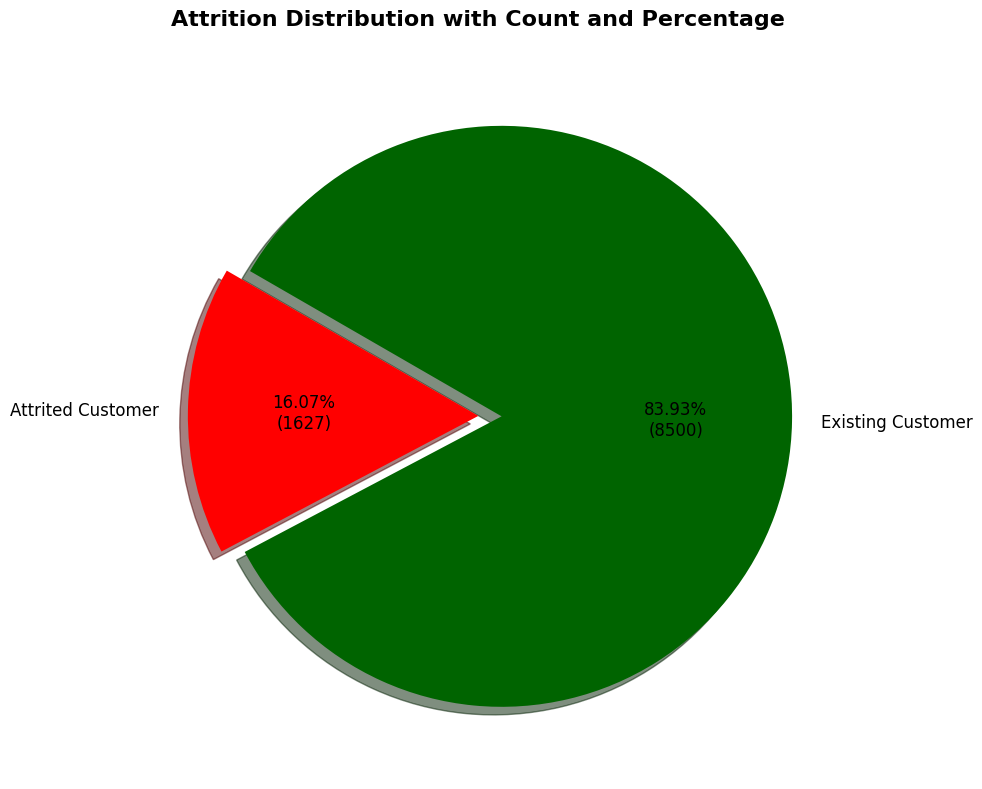

In [283]:

# Calculate value counts for the pie chart
attrition_distribution = df_customer_churn["Attrition_Flag"].value_counts().loc[["Attrited Customer", "Existing Customer"]]

# Define the custom colors: red for Attrited, dark green for Existing
custom_colors = ['red', 'darkgreen']

# --- Main Change: Function to format labels with percentage and count ---
def autopct_format(pct, all_vals):
    """
    Formats the pie chart labels to show percentage and the absolute count.
    """
    absolute = int(round(pct / 100.*sum(all_vals)))
    return f"{pct:.2f}%\n({absolute:d})"

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 8))

# --- Pie Chart with Custom Label Format ---
ax.pie(
    attrition_distribution,
    labels=attrition_distribution.index,
    colors=custom_colors,
    autopct=lambda pct: autopct_format(pct, attrition_distribution), # Apply the custom format
    startangle=150,
    explode=(0, 0.08),
    shadow=True,
    textprops={'fontsize': 12} # Adjust font size for better readability
)

ax.set_title("Attrition Distribution with Count and Percentage", weight='bold', fontsize=16, pad=20)

plt.tight_layout()
plt.show()

**Insights:** <br>
- Around `16.07%` customers has attrited, which reflects a realistic churn rate in the banking sector.
- Although the data is imbalanced, it is not incorrect — it naturally reflects actual customer behavior.

## Numerical Feature Distributions

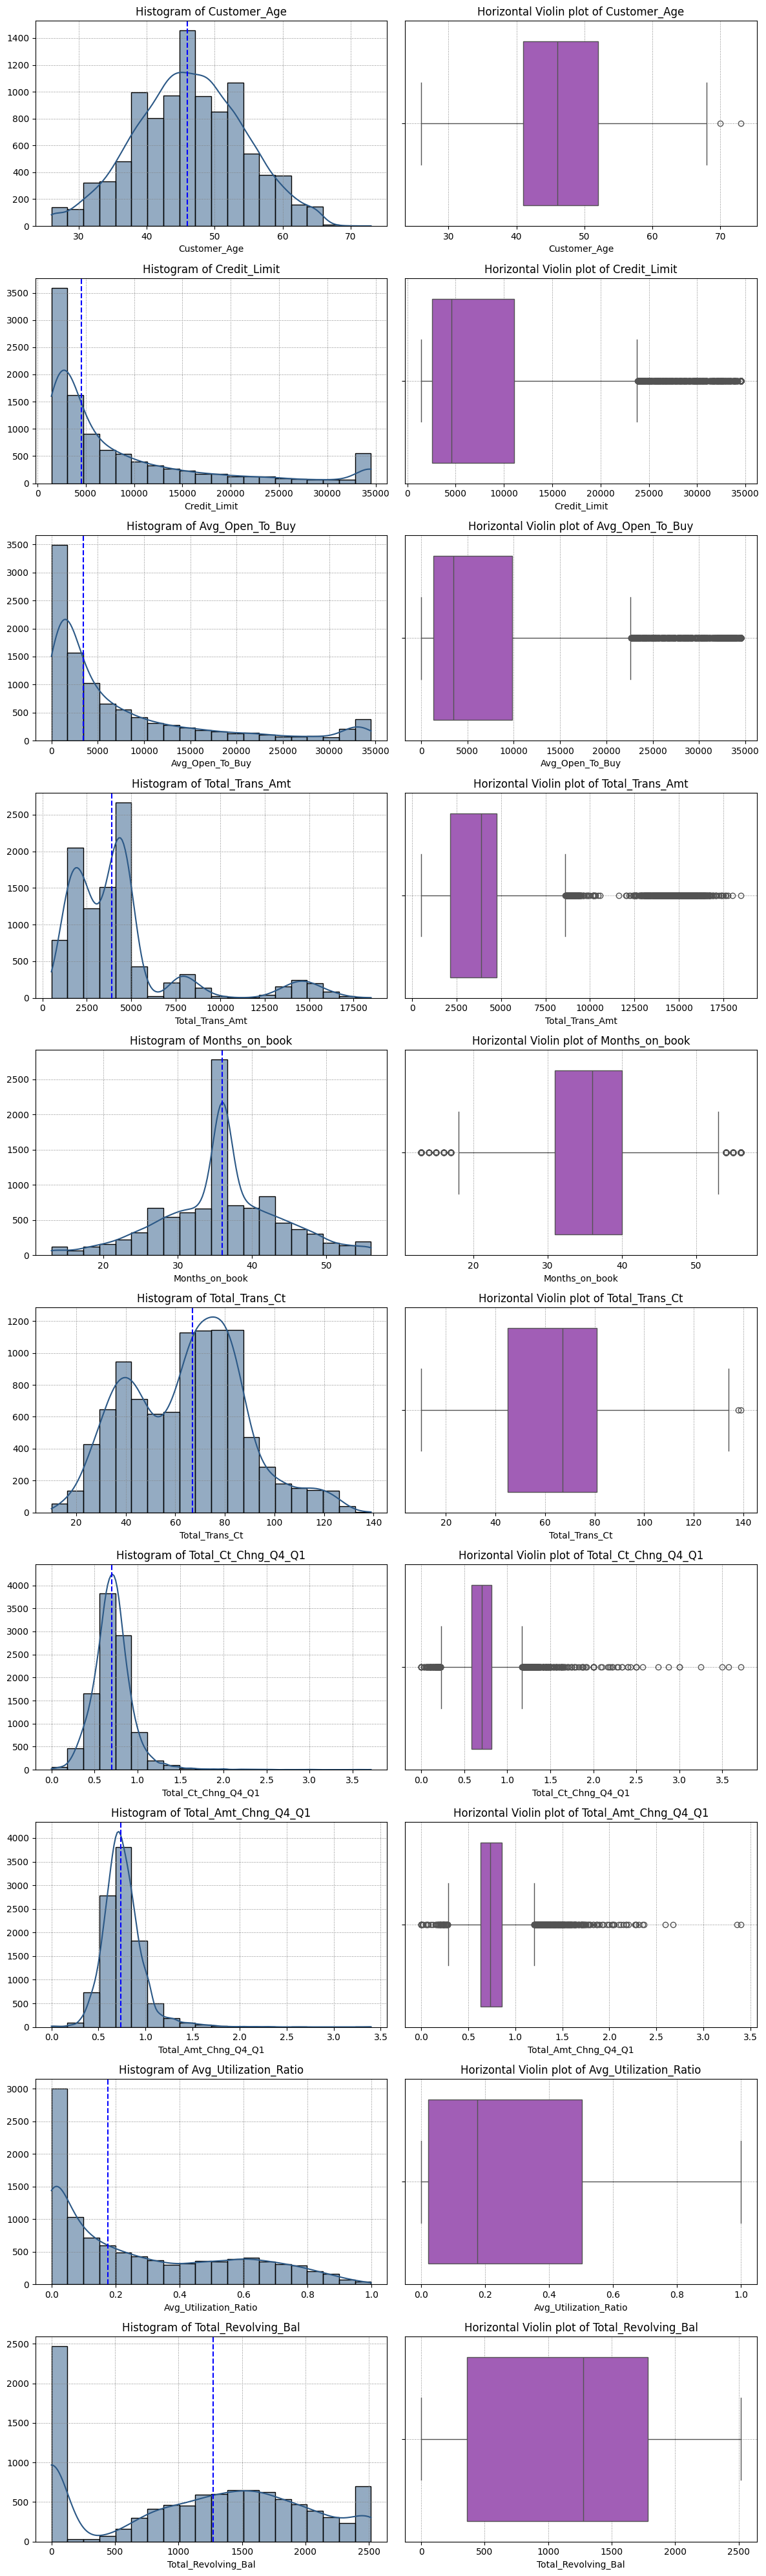

In [284]:
def plot_numerical_features(df=df_customer_churn, numerical_features = num_features):
    fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, len(numerical_features)*4))
    axes = np.atleast_2d(axes)

    for i, feature in enumerate(numerical_features):
        sns.histplot(data=df[feature], color="#2B5886", bins = 20, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f"Histogram of {feature}")
        axes[i, 0].set_ylabel("")
        axes[i, 0].grid(color="gray", linestyle=":", linewidth=0.7)
        axes[i, 0].axvline(df[feature].median(), color="blue", linestyle="--", label="Median Train")

        sns.boxplot(data=df[feature], color="#A94FC5", orient="h", ax=axes[i, 1])
        axes[i, 1].set_title(f"Horizontal Violin plot of {feature}")
        axes[i, 1].set_xlabel(feature)
        axes[i, 1].grid(color="gray", linestyle=":", linewidth=0.7)

    plt.tight_layout()
    plt.show()

plot_numerical_features(df=df_customer_churn, numerical_features = num_features)

In [ ]:
def check_skewness(data = df_customer_churn, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for dataset:")
    print("-"*70)
    print(f"{'Feature':<30} | {'Skewness':<10} | {'Remark'}")
    print("-"*70)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+10f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+10f} | {remark}")
    print("-"*70)
    return skew_feature, skew_df

skew_feature, skew_df = check_skewness()


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
Total_Ct_Chng_Q4_Q1            |  +2.064031 | Highly skewed
Total_Trans_Amt                |  +2.041003 | Highly skewed
Total_Amt_Chng_Q4_Q1           |  +1.732064 | Highly skewed
Credit_Limit                   |  +1.666726 | Highly skewed
Avg_Open_To_Buy                |  +1.661697 | Highly skewed
Avg_Utilization_Ratio          |  +0.718008 | Moderately skewed
Total_Trans_Ct                 |  +0.153673 | Approximately symmetric
Total_Revolving_Bal            |  -0.148837 | Approximately symmetric
Months_on_book                 |  -0.106565 | Approximately symmetric
Customer_Age                   |  -0.033605 | Approximately symmetric
----------------------------------------------------------------------


: 

: 

: 

: 

: 

: 

: 

: 

## Categorical Feature Distribution

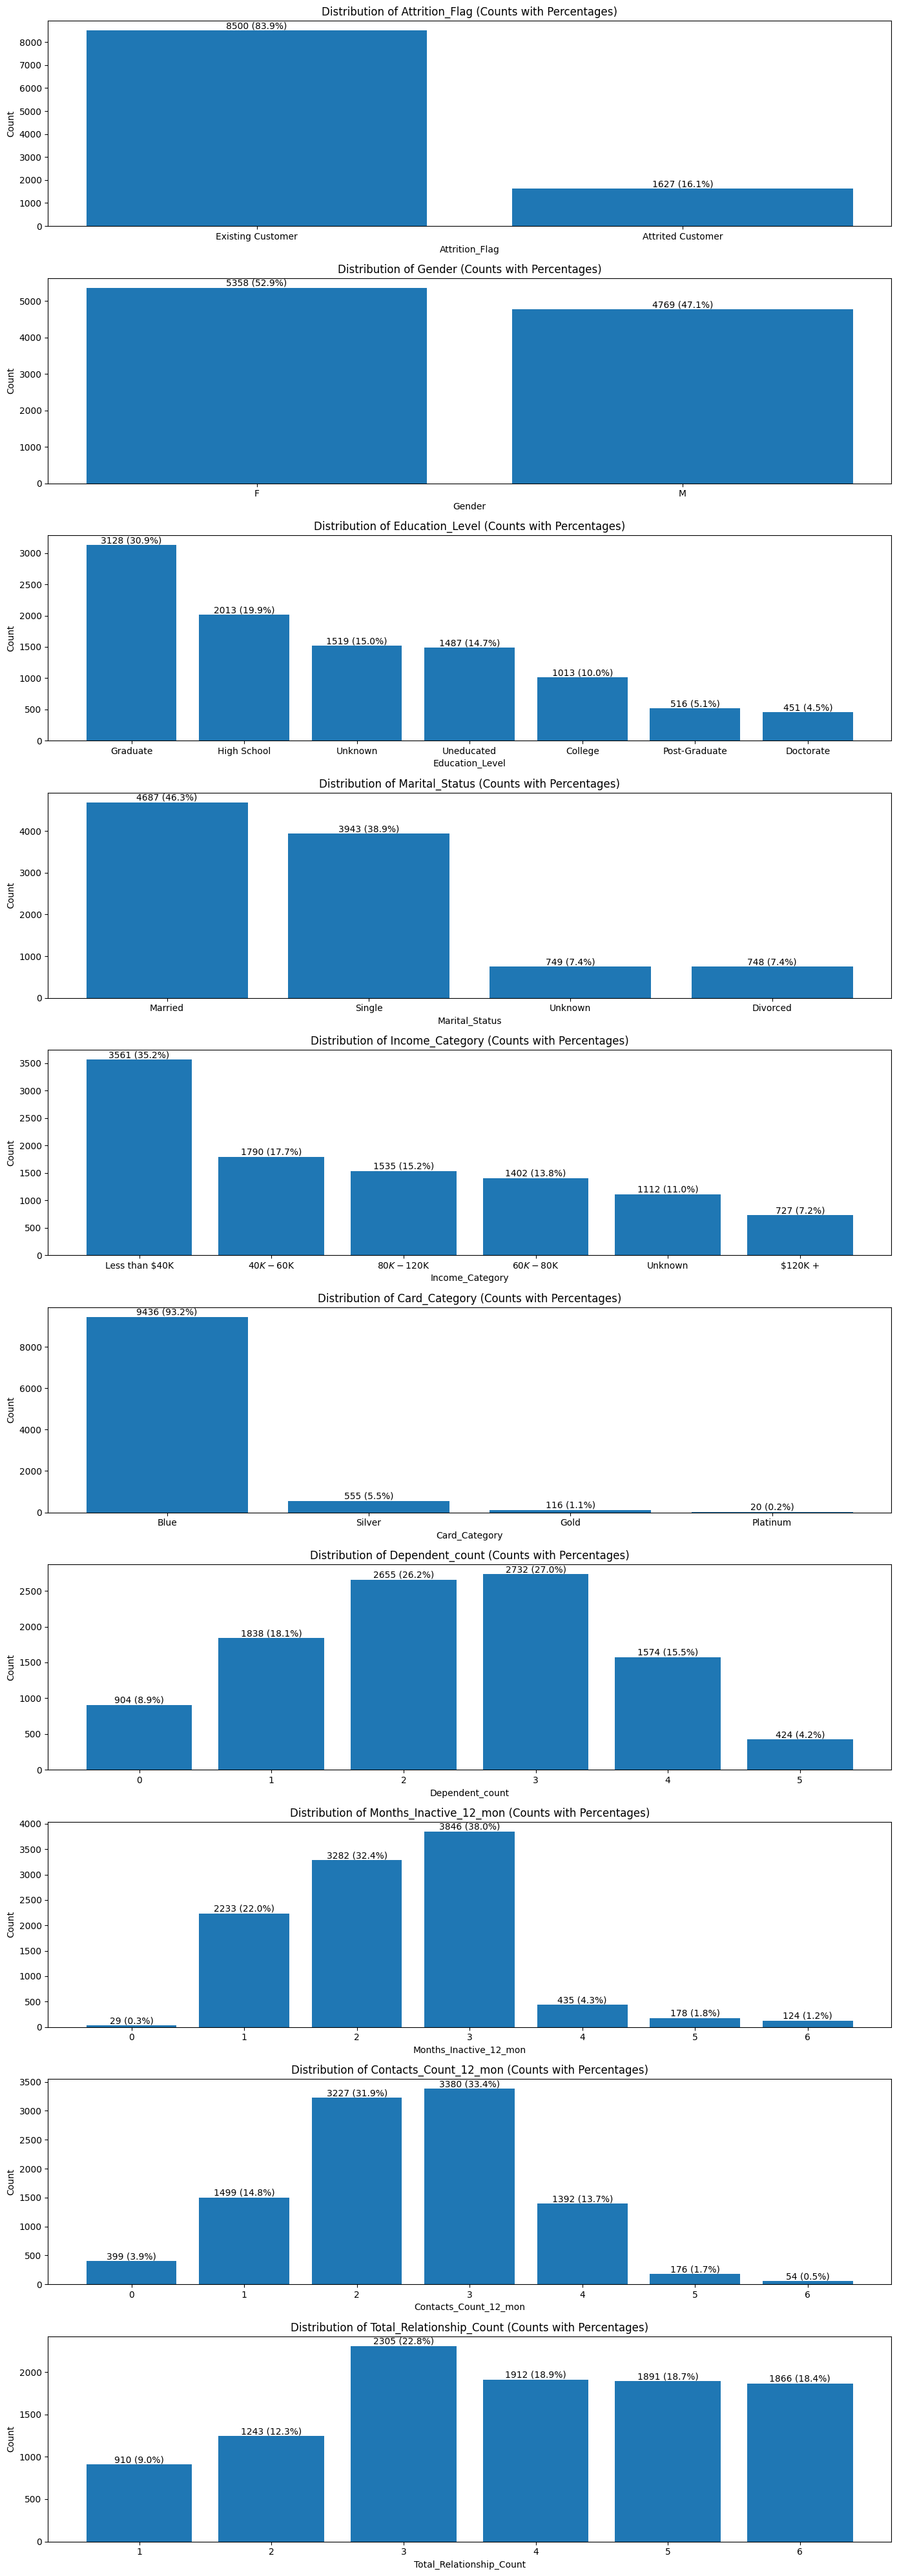

In [285]:
def plot_categorical_distribution(df, cat_features):
    # Create subplots: one row per feature, one column
    fig, ax = plt.subplots(len(cat_features), 1, figsize=(14, len(cat_features) * 4))
    ax = np.atleast_1d(ax)  # Ensure ax is at least 1D for single feature case
    
    for i, feature in enumerate(cat_features):
        # Get counts and calculate percentages
        counts = df[feature].value_counts()
        total = counts.sum()
        percentages = (counts / total * 100).round(1)  # Percentages rounded to 1 decimal
        
        # Plot bar chart with counts
        bars = ax[i].bar(counts.index, counts.values)
        ax[i].set_title(f'Distribution of {feature} (Counts with Percentages)')
        ax[i].set_xlabel(feature)
        ax[i].set_ylabel('Count')
        
        # Add labels with both count and percentage on top of each bar
        for bar, count, pct in zip(bars, counts, percentages):
            ax[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                       f'{count} ({pct}%)', ha='center', va='bottom')
               
    plt.tight_layout()
    plt.show()

plot_categorical_distribution(df=df_customer_churn, cat_features=cat_features)



#### Findings

| Feature                  | Key Observations |
|--------------------------|------------------|
| Attrition Flag (Target) | Existing customers make up about 84%, highlighting a significant class imbalance in the data. |
| Gender                   | Distribution is almost even, with females at roughly 53% and males at 47%; no major adjustments needed. |
| Education Level          | Graduates (31%) and uneducated individuals (25%) are the largest groups; doctorate and post-graduate levels are uncommon (under 10%) and could be combined; unknown entries (15%) are preserved through a dedicated flag like `is_unknown_education_level`. |
| Marital Status           | Married individuals lead at 46%, suggesting a stable customer base; unknown status (7%) is kept or merged, with representation via `is_unknown_marital_status`. |
| Income Category          | The majority (35%) earn under $40K; high earners (over $120K) are only 7% and might be categorized as "High income"; unknown income (11%) could hold value and is flagged with `is_unknown_income_category`. |
| Card Category            | Blue cards overwhelmingly prevail (93%), while others are scarce; suggest consolidating into "Blue" versus "Other" for easier analysis. |
| Dependent Count          | Primarily 1-3 dependents per customer; those with 5 are rare, so grouping "4 or more" could be useful. |
| Months Inactive (Last 12 Months) | Inactivity mostly lasts 2-3 months, indicating overall stability; extended inactivity (over 4 months) is uncommon. |
| Contact Count (Last 12 Months) | Around 65% have 2-3 interactions annually; those with 0-1 may indicate disengagement and potential churn risk, warranting further examination. |
| Total Relationship Count | Evenly distributed from 2-6 products; only 9% have a single relationship, which might correlate with higher attrition. |

#### Summary & Recommended Actions (Bullet Points)
- **Handle target imbalance in Attrition Flag**: Implement oversampling like SMOTE, adjust class weights, or fine-tune decision thresholds to balance the model.
- **Address uneven distributions in categories**: Merge infrequent categories to enhance model reliability and reduce noise.
- **Manage "Unknown" entries across features**: Retain these as they are, since they may provide useful signals.
- **Examine behavioral patterns (e.g., minimal contacts)**: Analyze these as indicators of possible attrition to uncover predictive insights.
- **Prepare all categorical variables**: Apply encoding methods such as one-hot or ordinal to make them suitable for modeling.


### Insights on Numerical Feature Distributions

**Shape and Spread of Distributions**

- **Histograms** reveal that all features are distributed fairly evenly across their respective ranges.
- **Box plot** confirm that the central 50% of values (the interquartile range), and the whiskers (showing the range).

**Skewness Analysis**

- The **skewness values** for numerical features (`Total_Trans_Ct`, `Months_on_book`, `Customer_Age` and `Total_Revolving_Bal`) in dataset are less than 0.5, indicating that the distributions are **approximately symmetric**. which means:

- The features: `Total_Ct_Chng_Q4_Q1`, `Total_Trans_Amt`, `Total_Amt_Chng_Q4_Q1`, `Credit_Limit`, `Avg_Open_To_Buy`, `Avg_Utilization_Ratio`  have **skewness values** greater than 0.5, indicating that the distributions are **Highly/Moderately symmetric**. Many model assumes **normal distribution** but in reality data points may not be perfectly symmetric. If the data are skewed, then this kind of model will always underestimate the skewness risk.The more the data is skewed the less accurate the model will be. We need to handle skewness in chapter **Data Preprocessing**

### Correlation Analysis of Numerical Features

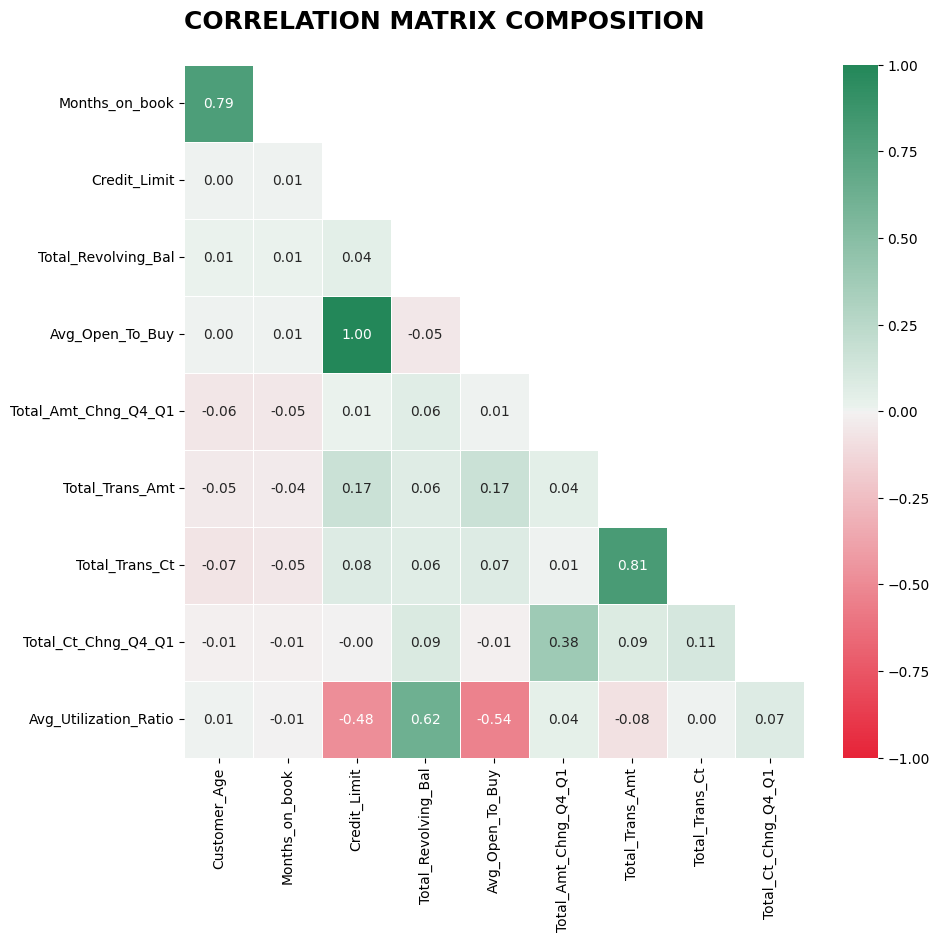

In [286]:

corr_matrix = df_customer_churn.drop(columns="CLIENTNUM", axis=1).corr(numeric_only=True)

ones_corr = np.ones_like(corr_matrix, dtype=bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

cmap = sns.diverging_palette(10, 145, s=90, l=50, center="light", as_cmap=True)

# Heatmap with the custom cmap
fig, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

title = "CORRELATION MATRIX COMPOSITION\n"
ax.set_title(title, loc="left", fontsize=18, weight="bold")

plt.show()


## **Correlation Analysis of Numerical Features**

**1. Overall Weak Correlation Pattern**

* Most numerical features exhibit **correlation coefficients near 0**.
* Indicates **minimal linear dependency** among feature pairs.

> **Implication**: No sign of multicollinearity → suitable for models that assume feature independence (e.g., **Logistic Regression**) as well as **tree-based models** (e.g., RandomForest, XGBoost).

**2. Notable Positive Correlations**

| Feature Pair                                    | Correlation | Interpretation                                                                        |
| ----------------------------------------------- | ----------- | ------------------------------------------------------------------------------------- |
| `Total_Trans_Ct` & `Total_Trans_Amt`            | **0.81**    | Higher transaction count usually corresponds to higher transaction amounts.           |
| `Months_on_book` & `Customer_Age`               | **0.79**    | Older customers tend to have longer banking relationships.                            |
| `Total_Ct_Chng_Q4_Q1` & `Total_Amt_Chng_Q4_Q1`  | **0.38**    | Changes in transaction frequency moderately align with changes in transaction amount. |
| `Avg_Utilization_Ratio` & `Total_Revolving_Bal` | **0.62**    | Customers with high utilization tend to carry larger revolving balances.              |

**3. Moderate Negative Correlations**

| Feature Pair                                | Correlation | Interpretation                                                             |
| ------------------------------------------- | ----------- | -------------------------------------------------------------------------- |
| `Avg_Utilization_Ratio` & `Avg_Open_To_Buy` | **-0.54**   | Higher utilization reduces available credit → inverse relationship.        |
| `Avg_Utilization_Ratio` & `Credit_Limit`    | **-0.48**   | Customers with higher credit limits generally use a smaller portion of it. |


**Summary**

| Observation                                     | Actionable Insight                                       |
| ----------------------------------------------- | -------------------------------------------------------- |
| Weak overall correlations                       | Features are not redundant → preserve full feature set   |
| Strong link: `Trans_Ct` ↔ `Trans_Amt`           | Confirms purchase frequency correlates with volume       |
| `Avg_Utilization_Ratio` as behavioral indicator | Valuable signal for **credit risk and churn prediction** |

## Bivariate Analysis

In [287]:
def bivariate_percent_plot(cat, df, figsize=(15, 6), order=None, rot=0):
    # Create crosstab of counts between cat and Attrition_Flag
    cross_tab = pd.crosstab(df[cat], df['Attrition_Flag'])

    # Calculate percentages row-wise
    percent_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

    # Reorder if order is provided
    if order:
        cross_tab = cross_tab.reindex(order)
        percent_tab = percent_tab.reindex(order)
        categories = order
    else:
        categories = cross_tab.index.tolist()

    # Drop any NaN rows after reindexing (if order includes missing)
    cross_tab = cross_tab.dropna()
    percent_tab = percent_tab.dropna()

    fig, ax = plt.subplots(figsize=figsize)

    # Plot grouped bars using Pandas plot (similar to countplot)
    cross_tab.plot(kind='bar', ax=ax, color=sns.color_palette("husl", n_colors=len(cross_tab.columns)))

    # Add text labels with count and percentage side by side on top of each bar
    for col_idx, container in enumerate(ax.containers):
        for row_idx, rect in enumerate(container):
            height = rect.get_height()
            percent = percent_tab.iloc[row_idx, col_idx]
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                height,
                f'{int(height)} ({percent:.1f}%)',  # Side by side: count percentage%
                ha='center', va='bottom', fontsize=10, weight='bold'
            )

    ax.set_title(f'Counts and Percentages of Attrition by {cat}', fontsize=14, weight='bold')
    ax.set_xlabel(cat, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.legend(title='Attrition', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Rotate x-ticks if needed
    if cat in ["Education_Level", "Income_Category"]:
        ax.set_xticklabels(categories, rotation=45)
    else:
        ax.set_xticklabels(categories, rotation=rot)

    sns.despine(left=False, bottom=False, ax=ax)
    plt.tight_layout()
    plt.show()

    # Assuming cal_ChiSquare is defined elsewhere
    cal_ChiSquare(cat_feature=cat, target_feature="Attrition_Flag", df=df, show_residuals=True)


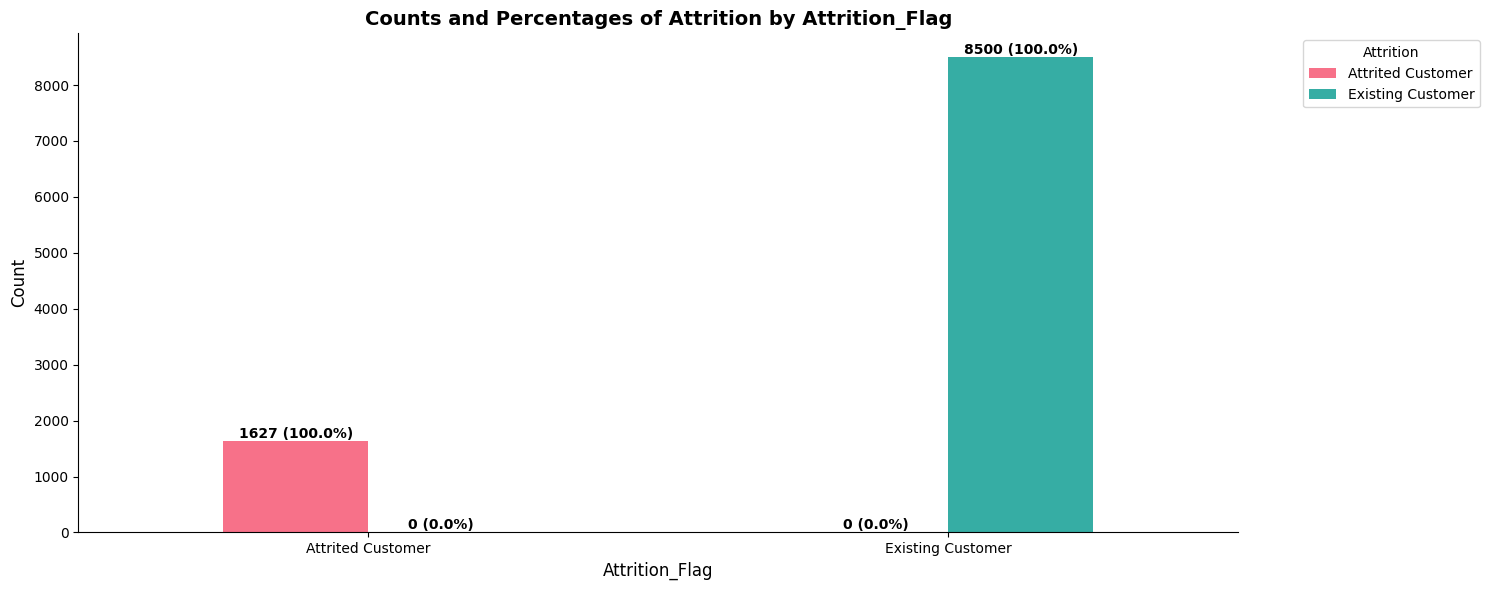


Chi-Square Test of Independence: 'Attrition_Flag' vs. 'Attrition_Flag'
Chi-squared statistic: 10119.586
Degrees of freedom: 1
p-value: 0.000000
Result: p-value < 0.05 -> Reject H0
-> There is a statistically significant association between 'Attrition_Flag' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag     Attrited Customer  Existing Customer
Attrition_Flag                                         
Attrited Customer              84.47             -36.95
Existing Customer             -36.95              16.17


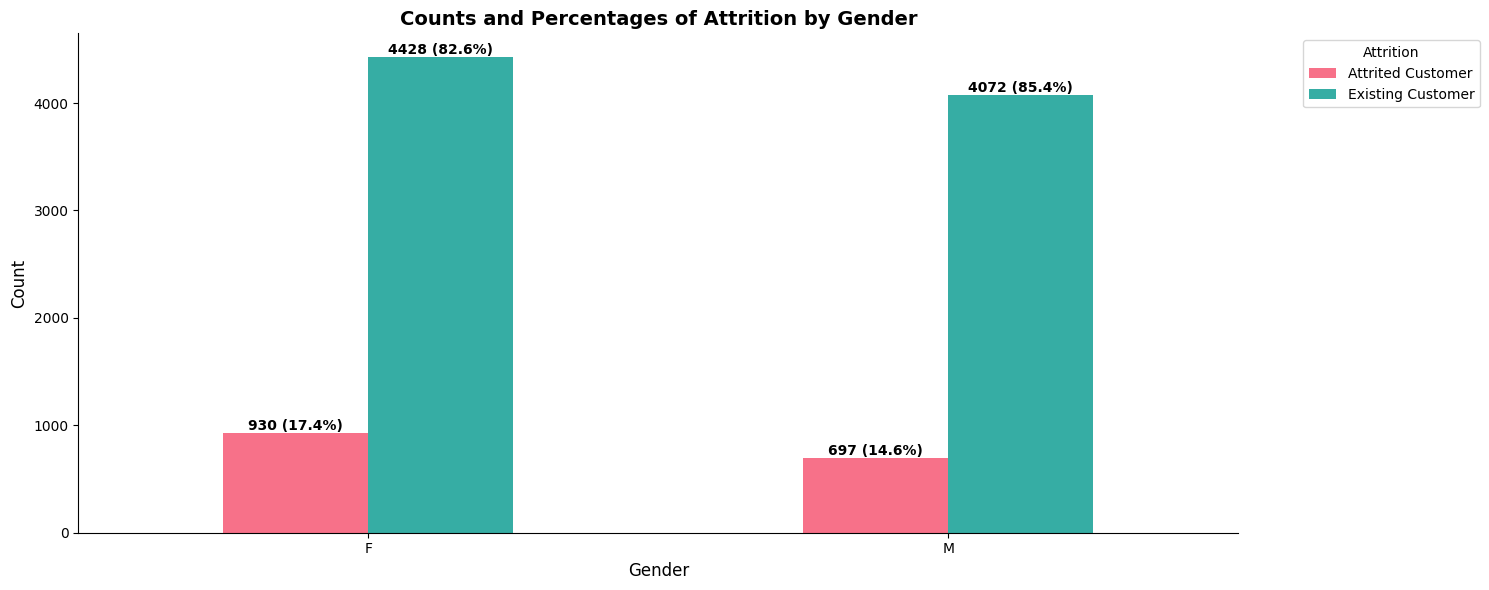


Chi-Square Test of Independence: 'Gender' vs. 'Attrition_Flag'
Chi-squared statistic: 13.866
Degrees of freedom: 1
p-value: 0.000196
Result: p-value < 0.05 -> Reject H0
-> There is a statistically significant association between 'Gender' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag  Attrited Customer  Existing Customer
Gender                                              
F                            2.36              -1.03
M                           -2.50               1.09


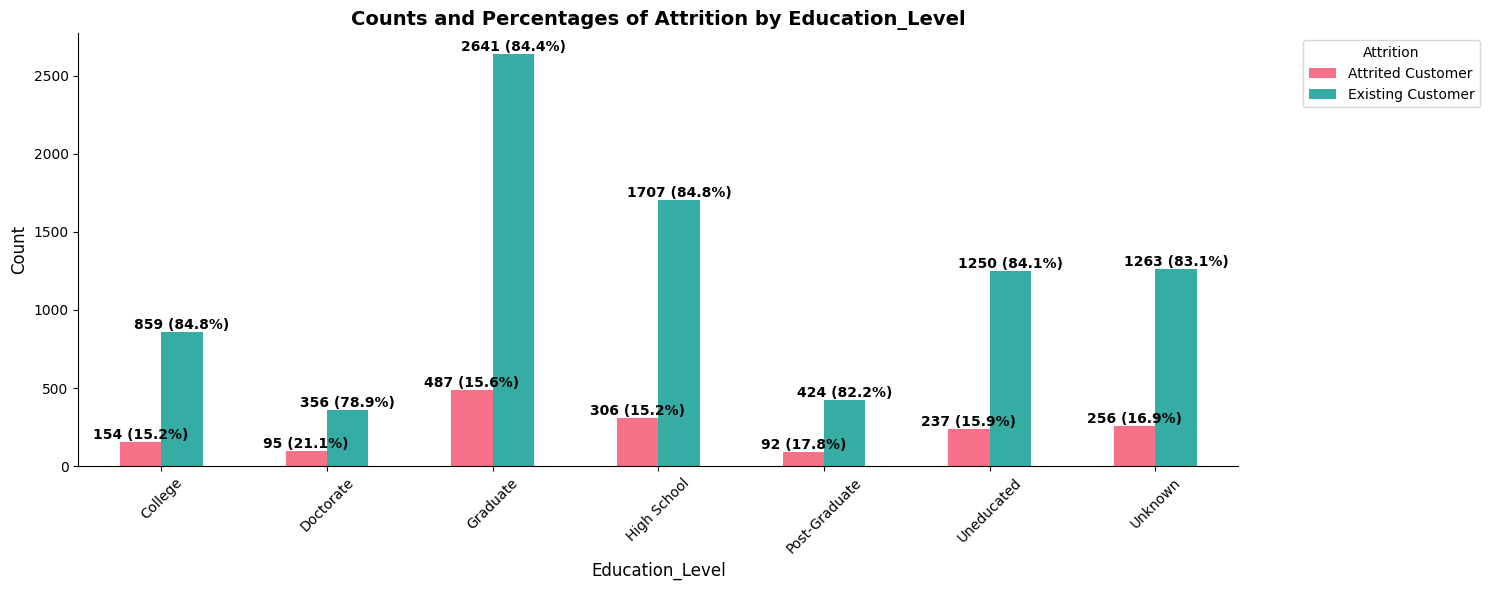


Chi-Square Test of Independence: 'Education_Level' vs. 'Attrition_Flag'
Chi-squared statistic: 12.511
Degrees of freedom: 6
p-value: 0.051489
Result: p-value >= 0.05 -> Fail to reject H0
-> No statistically significant association between 'Education_Level' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag   Attrited Customer  Existing Customer
Education_Level                                      
College                      -0.69               0.30
Doctorate                     2.65              -1.16
Graduate                     -0.69               0.30
High School                  -0.97               0.42
Post-Graduate                 1.00              -0.44
Uneducated                   -0.12               0.05
Unknown                       0.77              -0.33


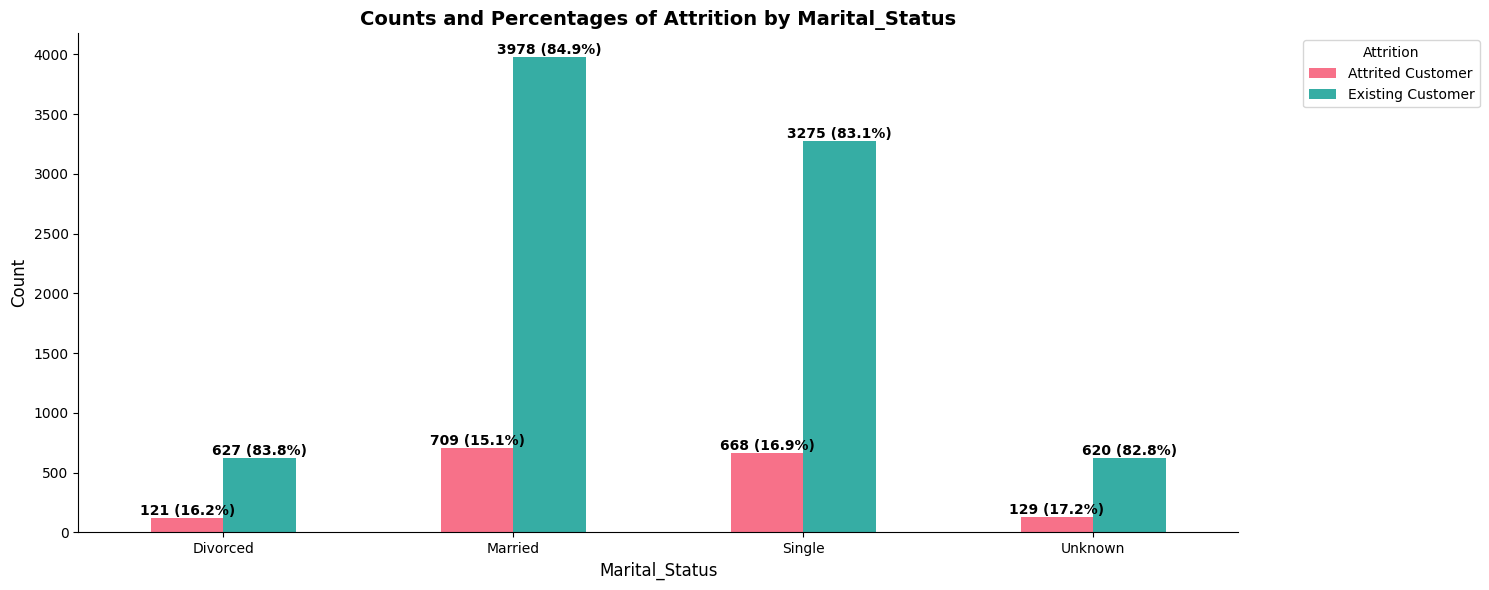


Chi-Square Test of Independence: 'Marital_Status' vs. 'Attrition_Flag'
Chi-squared statistic: 6.056
Degrees of freedom: 3
p-value: 0.108913
Result: p-value >= 0.05 -> Fail to reject H0
-> No statistically significant association between 'Marital_Status' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag  Attrited Customer  Existing Customer
Marital_Status                                      
Divorced                     0.08              -0.03
Married                     -1.60               0.70
Single                       1.37              -0.60
Unknown                      0.79              -0.35


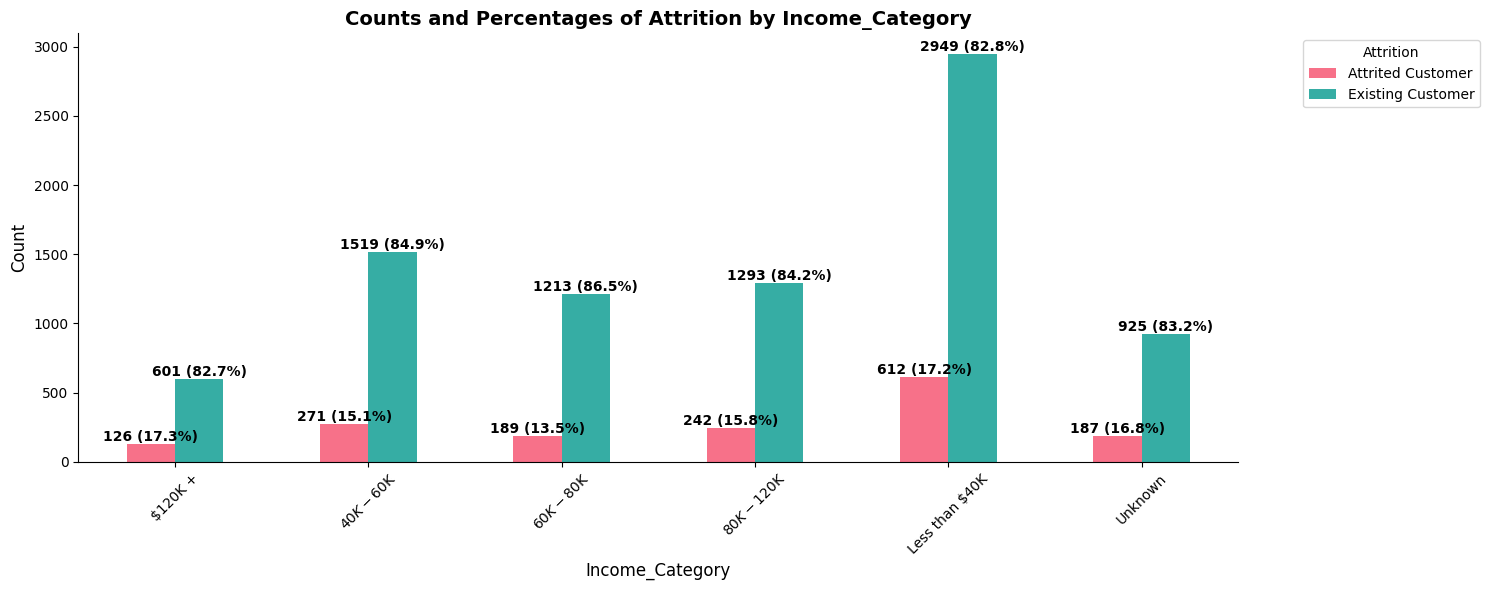


Chi-Square Test of Independence: 'Income_Category' vs. 'Attrition_Flag'
Chi-squared statistic: 12.832
Degrees of freedom: 5
p-value: 0.025002
Result: p-value < 0.05 -> Reject H0
-> There is a statistically significant association between 'Income_Category' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag   Attrited Customer  Existing Customer
Income_Category                                      
$120K +                       0.85              -0.37
$40K - $60K                  -0.98               0.43
$60K - $80K                  -2.42               1.06
$80K - $120K                 -0.29               0.13
Less than $40K                1.67              -0.73
Unknown                       0.62              -0.27


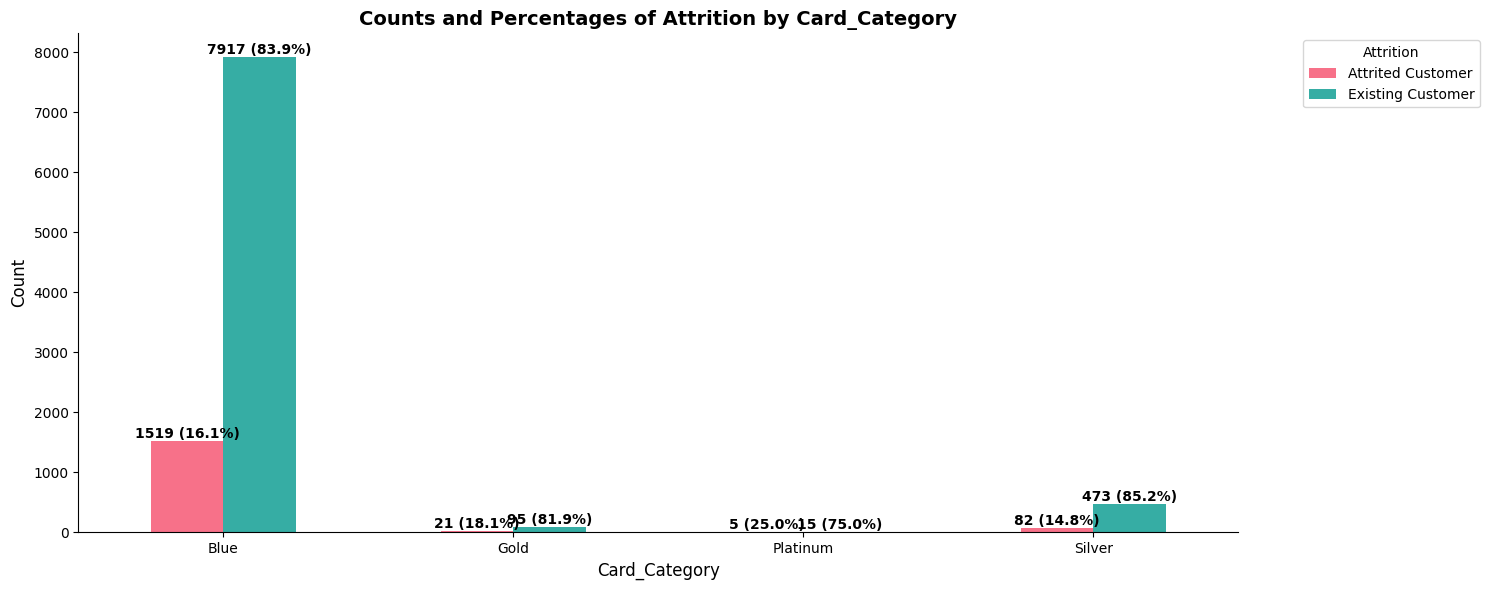


Chi-Square Test of Independence: 'Card_Category' vs. 'Attrition_Flag'
Chi-squared statistic: 2.234
Degrees of freedom: 3
p-value: 0.525238
Result: p-value >= 0.05 -> Fail to reject H0
-> No statistically significant association between 'Card_Category' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag  Attrited Customer  Existing Customer
Card_Category                                       
Blue                         0.08              -0.03
Gold                         0.55              -0.24
Platinum                     1.00              -0.44
Silver                      -0.76               0.33


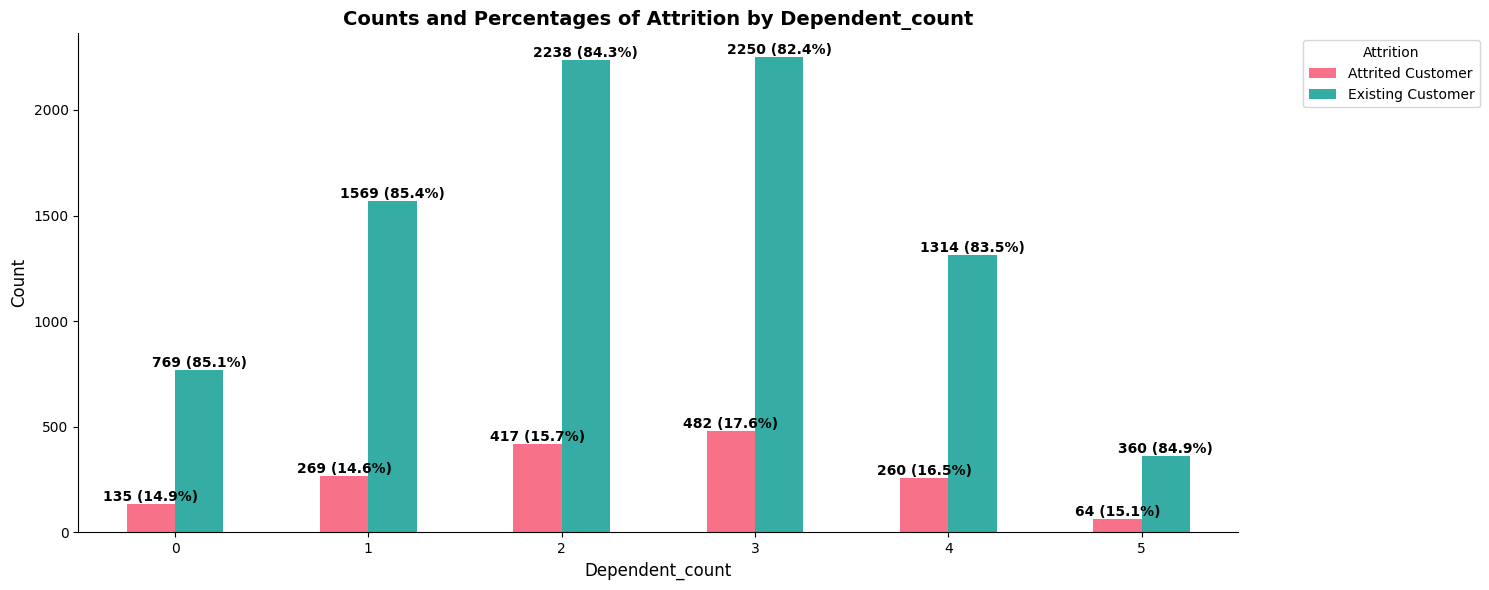


Chi-Square Test of Independence: 'Dependent_count' vs. 'Attrition_Flag'
Chi-squared statistic: 9.476
Degrees of freedom: 5
p-value: 0.091505
Result: p-value >= 0.05 -> Fail to reject H0
-> No statistically significant association between 'Dependent_count' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag   Attrited Customer  Existing Customer
Dependent_count                                      
0                            -0.85               0.37
1                            -1.53               0.67
2                            -0.46               0.20
3                             2.06              -0.90
4                             0.45              -0.20
5                            -0.50               0.22


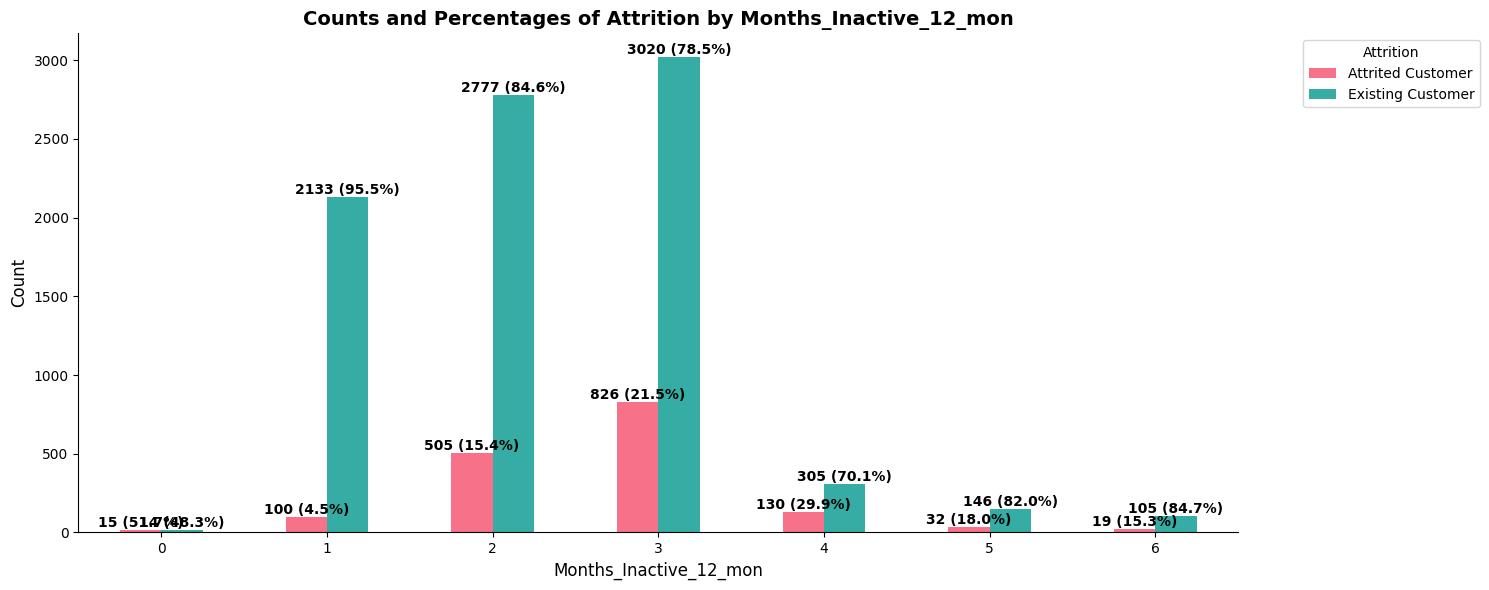


Chi-Square Test of Independence: 'Months_Inactive_12_mon' vs. 'Attrition_Flag'
Chi-squared statistic: 396.456
Degrees of freedom: 6
p-value: 0.000000
Result: p-value < 0.05 -> Reject H0
-> There is a statistically significant association between 'Months_Inactive_12_mon' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag          Attrited Customer  Existing Customer
Months_Inactive_12_mon                                      
0                                    4.79              -2.10
1                                  -13.66               5.98
2                                   -0.97               0.42
3                                    8.37              -3.66
4                                    7.19              -3.15
5                                    0.64              -0.28
6                                   -0.21               0.09


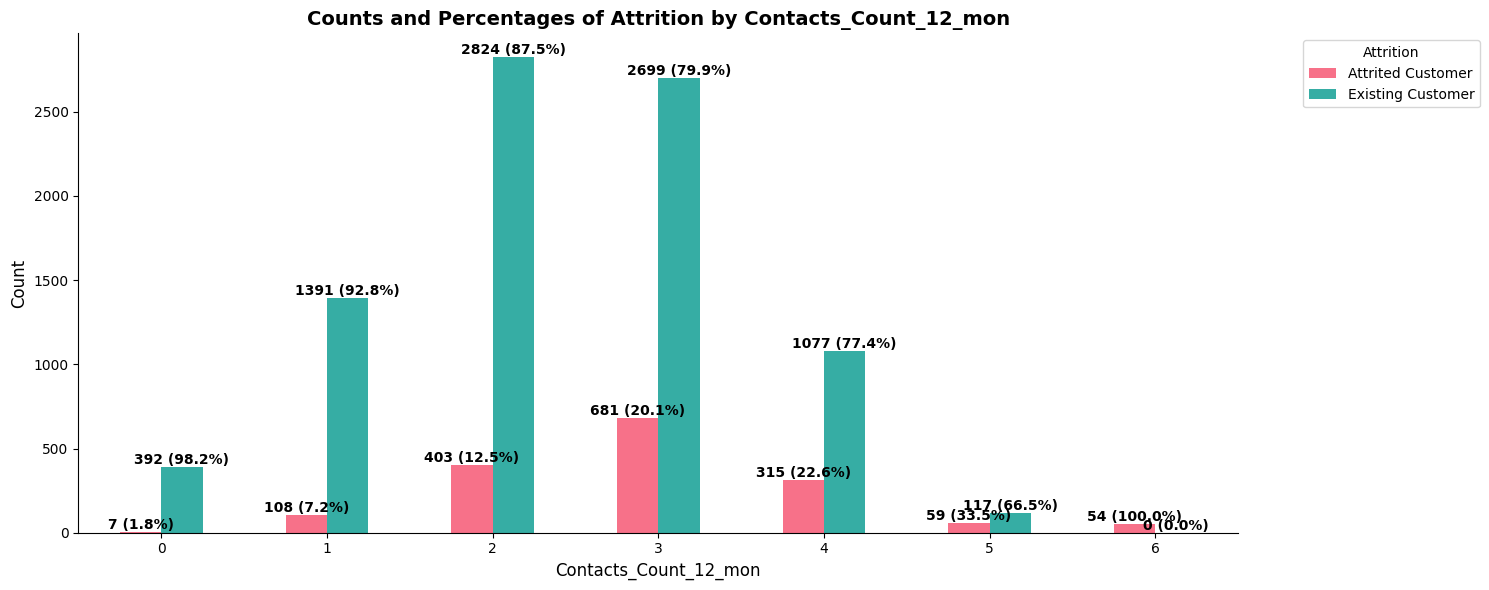


Chi-Square Test of Independence: 'Contacts_Count_12_mon' vs. 'Attrition_Flag'
Chi-squared statistic: 586.638
Degrees of freedom: 6
p-value: 0.000000
Result: p-value < 0.05 -> Reject H0
-> There is a statistically significant association between 'Contacts_Count_12_mon' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag         Attrited Customer  Existing Customer
Contacts_Count_12_mon                                      
0                                  -7.13               3.12
1                                  -8.56               3.74
2                                  -5.07               2.22
3                                   5.92              -2.59
4                                   6.11              -2.67
5                                   5.78              -2.53
6                                  15.39              -6.73


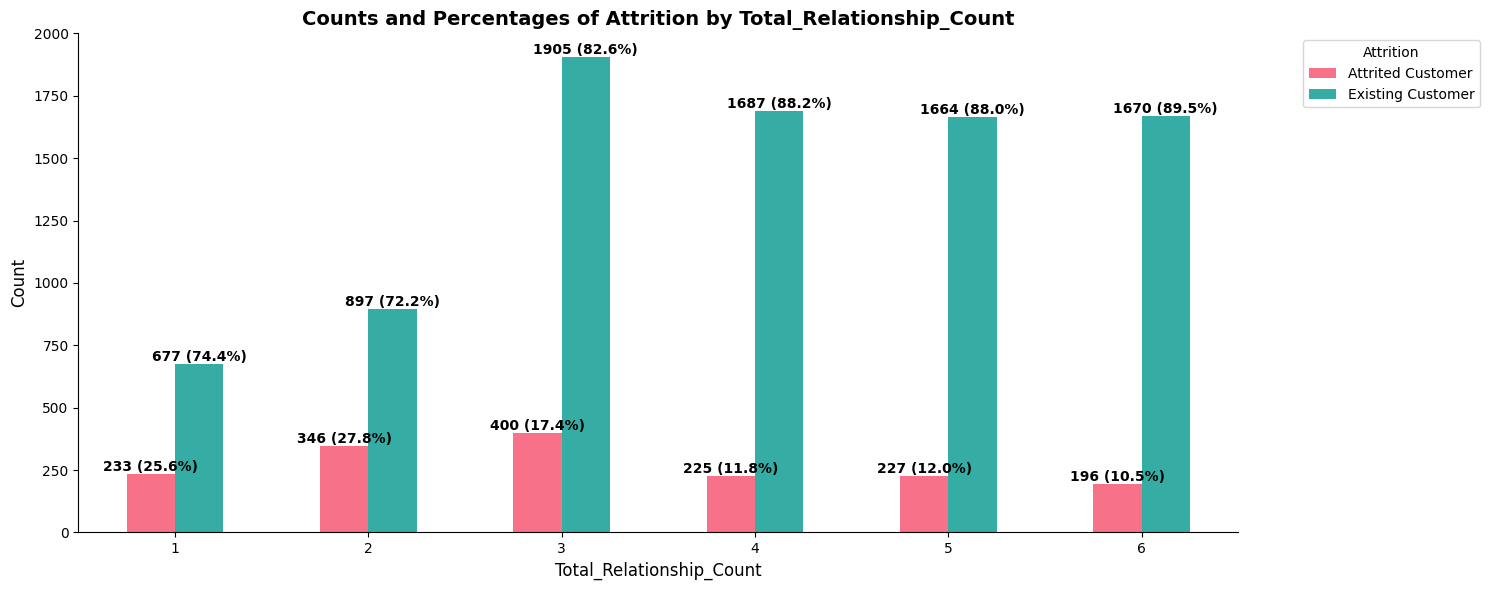


Chi-Square Test of Independence: 'Total_Relationship_Count' vs. 'Attrition_Flag'
Chi-squared statistic: 284.068
Degrees of freedom: 5
p-value: 0.000000
Result: p-value < 0.05 -> Reject H0
-> There is a statistically significant association between 'Total_Relationship_Count' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag            Attrited Customer  Existing Customer
Total_Relationship_Count                                      
1                                      7.18              -3.14
2                                     10.35              -4.53
3                                      1.54              -0.67
4                                     -4.69               2.05
5                                     -4.41               1.93
6                                     -5.99               2.62


In [288]:
for feature in cat_features:
    bivariate_percent_plot(cat=feature, df= df_customer_churn)

In [ ]:
def perform_statical_testing(feature, df = df_customer_churn, total_categories = 2, target_feature = "Attrition_Flag"):
    cal_normaltest(cat_feature=target_feature, num_feature=feature, df=df)
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df, categorical_feature=target_feature, num_feature=feature)
    else:
        pass

def plot_numerical_distribution_by_Attrition(feature, df = df_customer_churn, target_feature = "Attrition_Flag", order = None):
    print("\033[1m\033[34m" + f"Distribution of {feature} by Attrition_Flag" + "\033[0m")    # Summary information
    df_summary_feature = df.groupby(by = target_feature, as_index= False)\
    .agg (
        Count = (feature, "count"),
        Mean = (feature, "mean"),
        Median = (feature, "median"),
        Std = (feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean", ascending=False)    

    summary_data = [
        ("Overall Mean", f"{df[feature].mean():.2f}"),
        ("Overall Median", f"{df[feature].median()}"),
        ("Overall Std", f"{df[feature].std():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cm).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(feature=feature, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.violinplot(x=target_feature, y=feature, data=df, hue=target_feature,
                   palette=color(n_colors=len(df[target_feature].unique())), ax=ax)
    ax.set_title(f"Violin plot of {feature} distribution by {target_feature}", pad=15, weight = "bold")
    ax.set_xlabel(feature, labelpad=10)
    ax.set_ylabel(target_feature, labelpad=10)
    plt.grid(axis="y", color="gray", linestyle=":", alpha=0.7)
    sns.despine(left=False, bottom=False, ax=ax)
    plt.tight_layout()
    plt.show()

: 

: 

: 

Distribution of Customer_Age by Attrition_Flag


D’Agostino and Pearson Normality Test for 'Customer_Age' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 41.753
  p-value   : 0.00000
  Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 9.556
  p-value   : 0.00841
  Interpretation: Data does not appear to follow a normal distribution.

Mann–Whitney U Test for 'Customer_Age' by 'Attrition_Flag'

H0: The distributions of the two groups are equal.
H1: The distributions are different.

U statistic : 6724539.5
p-value     : 0.0780999487812895

Result: No statistically significant difference between the two groups (Fail to reject H0).


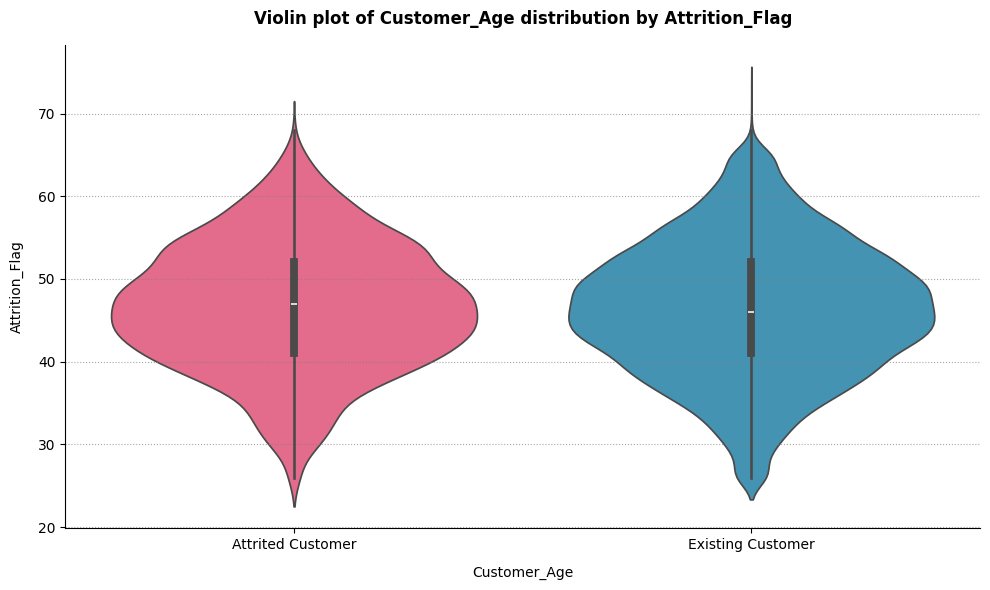

********************************************************************************************************************************************************************************************************
Distribution of Credit_Limit by Attrition_Flag


D’Agostino and Pearson Normality Test for 'Credit_Limit' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 2321.659
  p-value   : 0.00000
  Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 521.994
  p-value   : 0.00000
  Interpretation: Data does not appear to follow a normal distribution.

Mann–Whitney U Test for 'Credit_Limit' by 'Attrition_Flag'

H0: The distributions of the two groups are equal.
H1: The distributions are different.

U statistic : 7468152.0
p-value     : 3.0078405911217975e-07

Result: Statistically significant difference between the two groups (Reject H0).
 Interpretation: Group 'Existing Customer' has a higher median 'Credit_Limit' than Group 'Attrited Customer'.


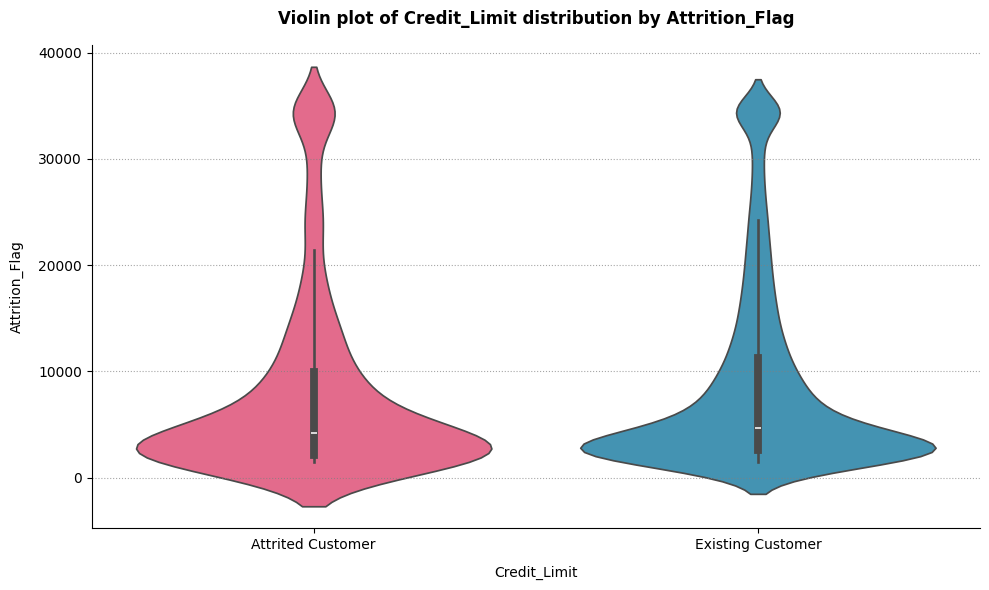

********************************************************************************************************************************************************************************************************
Distribution of Avg_Open_To_Buy by Attrition_Flag


D’Agostino and Pearson Normality Test for 'Avg_Open_To_Buy' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 2306.844
  p-value   : 0.00000
  Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 519.998
  p-value   : 0.00000
  Interpretation: Data does not appear to follow a normal distribution.

Mann–Whitney U Test for 'Avg_Open_To_Buy' by 'Attrition_Flag'

H0: The distributions of the two groups are equal.
H1: The distributions are different.

U statistic : 6615783.0
p-value     : 0.00565236631405401

Result: Statistically significant difference between the two groups (Reject H0).
 Interpretation: Group 'Attrited Customer' has a higher median 'Avg_Open_To_Buy' than Group 'Existing Customer'.


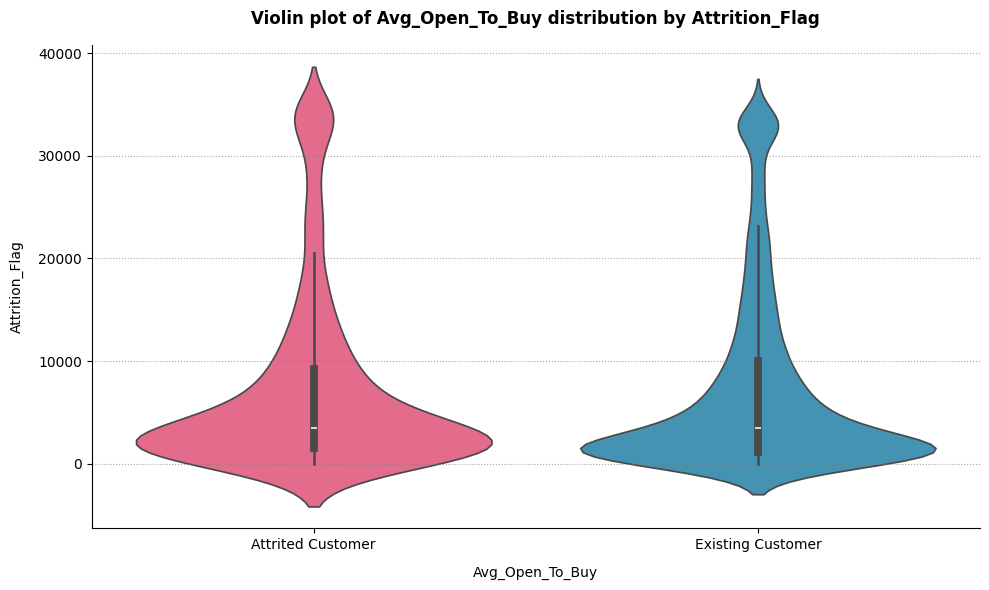

********************************************************************************************************************************************************************************************************
Distribution of Total_Trans_Amt by Attrition_Flag


D’Agostino and Pearson Normality Test for 'Total_Trans_Amt' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 3197.816
  p-value   : 0.00000
  Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 459.748
  p-value   : 0.00000
  Interpretation: Data does not appear to follow a normal distribution.

Mann–Whitney U Test for 'Total_Trans_Amt' by 'Attrition_Flag'

H0: The distributions of the two groups are equal.
H1: The distributions are different.

U statistic : 9347620.0
p-value     : 2.719009390771485e-112

Result: Statistically significant difference between the two groups (Reject H0).
 Interpretation: Group 'Existing Customer' has a higher median 'Total_Trans_Amt' than Group 'Attrited Customer'.


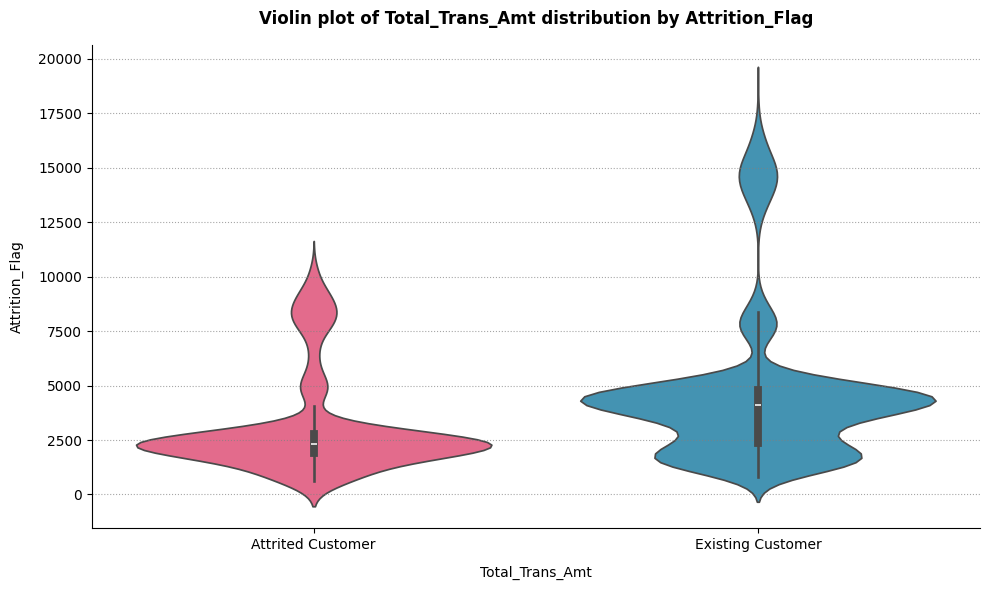

********************************************************************************************************************************************************************************************************
Distribution of Months_on_book by Attrition_Flag


D’Agostino and Pearson Normality Test for 'Months_on_book' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 53.873
  p-value   : 0.00000
  Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 13.579
  p-value   : 0.00113
  Interpretation: Data does not appear to follow a normal distribution.

Mann–Whitney U Test for 'Months_on_book' by 'Attrition_Flag'

H0: The distributions of the two groups are equal.
H1: The distributions are different.

U statistic : 6749662.5
p-value     : 0.12366716741255611

Result: No statistically significant difference between the two groups (Fail to reject H0).


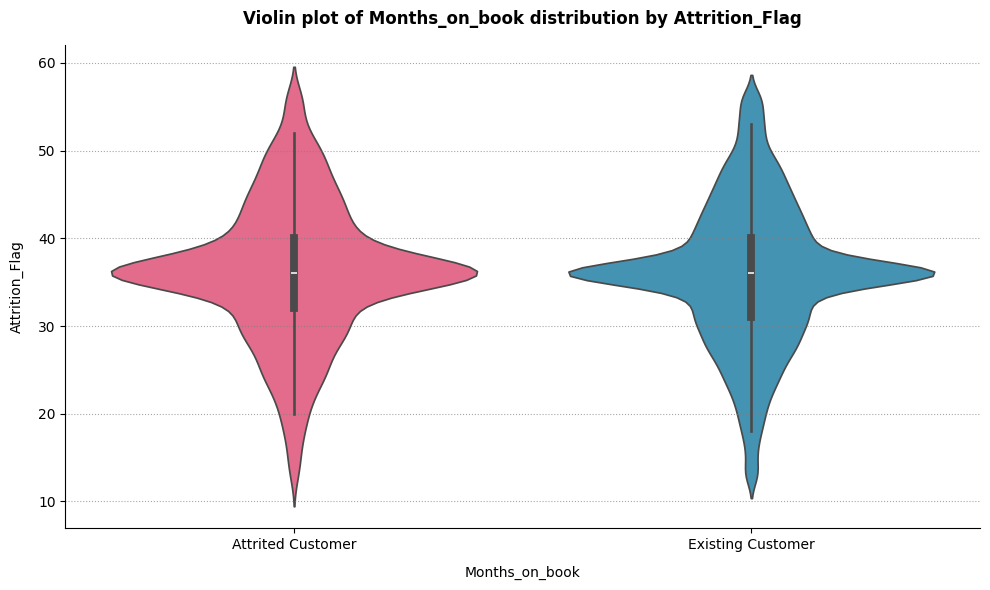

********************************************************************************************************************************************************************************************************
Distribution of Total_Trans_Ct by Attrition_Flag


D’Agostino and Pearson Normality Test for 'Total_Trans_Ct' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 17.716
  p-value   : 0.00014
  Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 72.474
  p-value   : 0.00000
  Interpretation: Data does not appear to follow a normal distribution.

Mann–Whitney U Test for 'Total_Trans_Ct' by 'Attrition_Flag'

H0: The distributions of the two groups are equal.
H1: The distributions are different.

U statistic : 11003326.0
p-value     : 0.0

Result: Statistically significant difference between the two groups (Reject H0).
 Interpretation: Group 'Existing Customer' has a higher median 'Total_Trans_Ct' than Group 'Attrited Customer'.


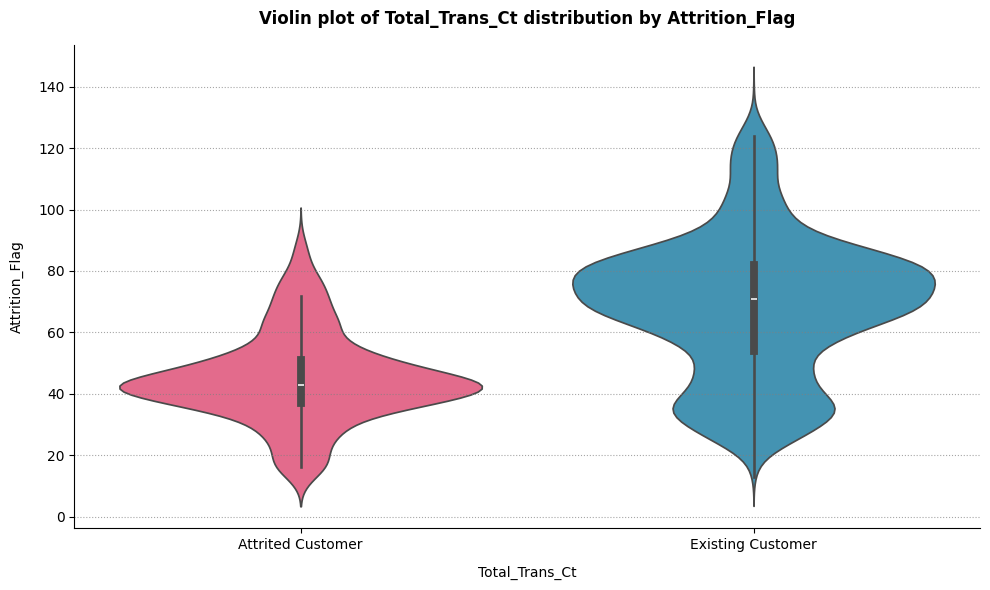

********************************************************************************************************************************************************************************************************
Distribution of Total_Ct_Chng_Q4_Q1 by Attrition_Flag


D’Agostino and Pearson Normality Test for 'Total_Ct_Chng_Q4_Q1' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 5498.969
  p-value   : 0.00000
  Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 403.554
  p-value   : 0.00000
  Interpretation: Data does not appear to follow a normal distribution.

Mann–Whitney U Test for 'Total_Ct_Chng_Q4_Q1' by 'Attrition_Flag'

H0: The distributions of the two groups are equal.
H1: The distributions are different.

U statistic : 10307283.0
p-value     : 1.908240659213709e-216

Result: Statistically significant difference between the two groups (Reject H0).
 Interpretation: Group 'Existing Customer' has a higher median 'Total_Ct_Chng_Q4_Q1' than Group 'Attrited Customer'.


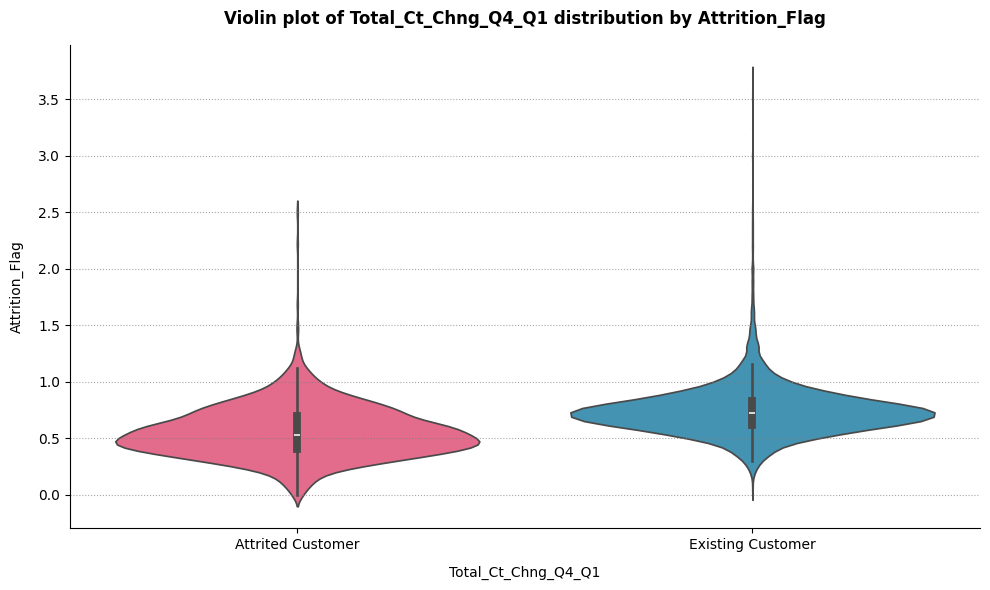

********************************************************************************************************************************************************************************************************
Distribution of Total_Amt_Chng_Q4_Q1 by Attrition_Flag


D’Agostino and Pearson Normality Test for 'Total_Amt_Chng_Q4_Q1' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 4334.021
  p-value   : 0.00000
  Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 12.923
  p-value   : 0.00156
  Interpretation: Data does not appear to follow a normal distribution.

Mann–Whitney U Test for 'Total_Amt_Chng_Q4_Q1' by 'Attrition_Flag'

H0: The distributions of the two groups are equal.
H1: The distributions are different.

U statistic : 8023238.5
p-value     : 1.064474309855412e-24

Result: Statistically significant difference between the two groups (Reject H0).
 Interpretation: Group 'Existing Customer' has a higher median 'Total_Amt_Chng_Q4_Q1' than Group 'Attrited Customer'.


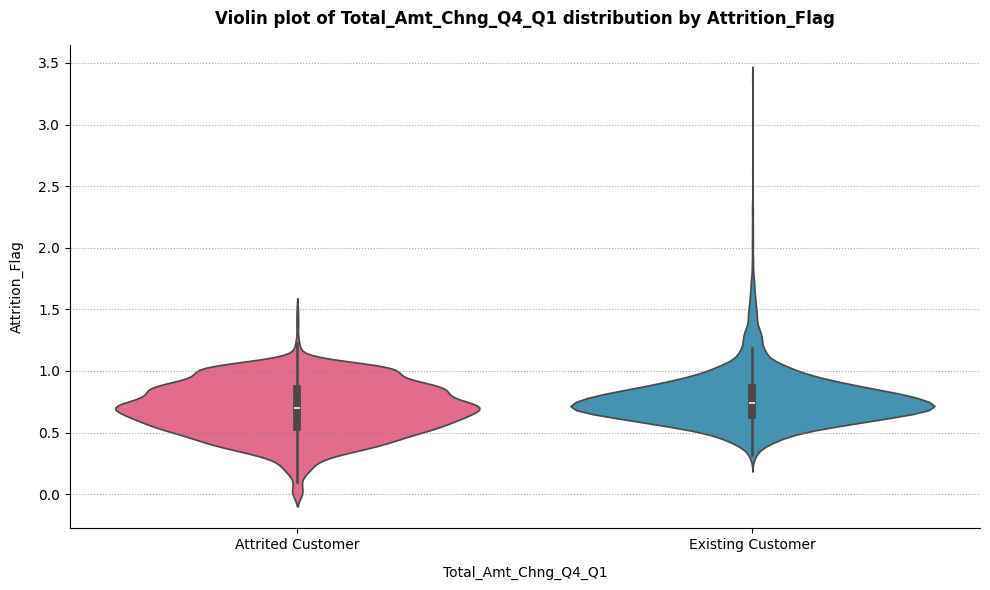

********************************************************************************************************************************************************************************************************
Distribution of Avg_Utilization_Ratio by Attrition_Flag


D’Agostino and Pearson Normality Test for 'Avg_Utilization_Ratio' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 1895.909
  p-value   : 0.00000
  Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 433.203
  p-value   : 0.00000
  Interpretation: Data does not appear to follow a normal distribution.

Mann–Whitney U Test for 'Avg_Utilization_Ratio' by 'Attrition_Flag'

H0: The distributions of the two groups are equal.
H1: The distributions are different.

U statistic : 9509093.5
p-value     : 2.8690970172667045e-129

Result: Statistically significant difference between the two groups (Reject H0).
 Interpretation: Group 'Existing Customer' has a higher median 'Avg_Utilization_Ratio' than Group 'Attrited Customer'.


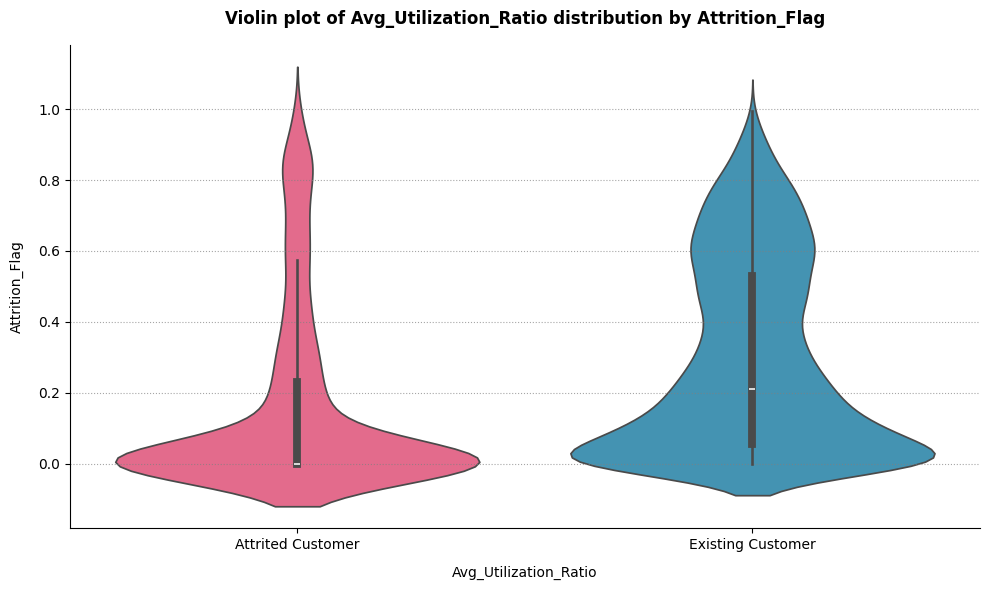

********************************************************************************************************************************************************************************************************
Distribution of Total_Revolving_Bal by Attrition_Flag


D’Agostino and Pearson Normality Test for 'Total_Revolving_Bal' across 'Attrition_Flag' groups

 Group: Existing Customer (n = 8500)
  Statistic : 982.460
  p-value   : 0.00000
  Interpretation: Data does not appear to follow a normal distribution.

 Group: Attrited Customer (n = 1627)
  Statistic : 238.552
  p-value   : 0.00000
  Interpretation: Data does not appear to follow a normal distribution.

Mann–Whitney U Test for 'Total_Revolving_Bal' by 'Attrition_Flag'

H0: The distributions of the two groups are equal.
H1: The distributions are different.

U statistic : 9510716.0
p-value     : 1.915678673031676e-129

Result: Statistically significant difference between the two groups (Reject H0).
 Interpretation: Group 'Existing Customer' has a higher median 'Total_Revolving_Bal' than Group 'Attrited Customer'.


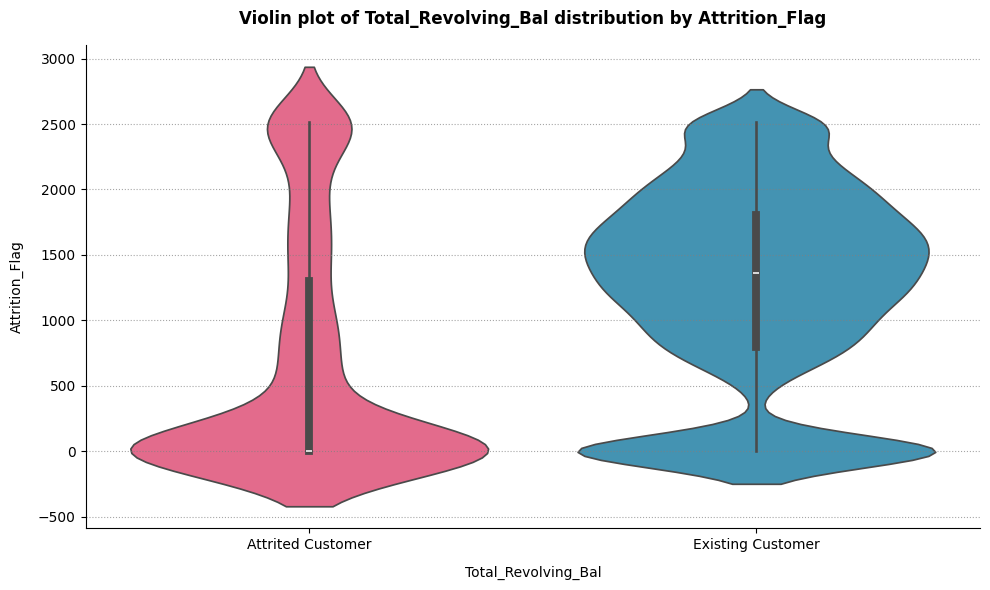

********************************************************************************************************************************************************************************************************


: 

: 

In [ ]:
for feature in num_features:
    plot_numerical_distribution_by_Attrition(feature=feature)
    print("*"*200)

**Summary of Feature Relationships with Churn**

| Feature                  | Type        | Statistical Test Used | Relationship with Attrition | Summary                                                                 |
|--------------------------|-------------|------------------------|------------------------------|-------------------------------------------------------------------------|
| **Gender**               | Categorical | Chi-Square Test        | ✅ Significant               | Female customers are slightly more likely to churn                     |
| **Education_Level**      | Categorical | Chi-Square Test        | ❌ Not Significant           | Doctorate holders show higher churn, but overall pattern is weak       |
| **Marital_Status**       | Categorical | Chi-Square Test        | ❌ Not Significant           | No strong difference between marital groups                            |
| **Income_Category**      | Categorical | Chi-Square Test        | ✅ Significant               | $60K–$80K segment has lowest churn rate                                |
| **Card_Category**        | Categorical | Chi-Square Test        | ❌ Not Significant           | Card type does not impact churn significantly                          |
| **Dependent_count**      | Categorical | Chi-Square Test        | ❌ Not Significant           | Weak signal; 3 dependents slightly overrepresented among churners      |
| **Months_Inactive_12_mon** | Categorical | Chi-Square Test        | ✅ Significant               | 3–4 months inactivity strongly linked with higher churn                |
| **Contacts_Count_12_mon** | Categorical | Chi-Square Test        | ✅ Significant               | Frequent contact (especially 6/year) associated with high churn        |
| **Total_Relationship_Count** | Categorical | Chi-Square Test      | ✅ Significant               | Fewer products (1–2) linked with higher churn                          |
| **Customer_Age**         | Numerical   | Mann–Whitney U Test    | ❌ Not Significant           | Age does not differ significantly between churned and retained         |
| **Months_on_book**       | Numerical   | Mann–Whitney U Test    | ❌ Not Significant           | Tenure shows no significant churn pattern                              |
| **Credit_Limit**         | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers tend to have lower credit limits                     |
| **Avg_Open_To_Buy**      | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers have less available credit                           |
| **Total_Trans_Amt**      | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers spend less overall                                   |
| **Total_Trans_Ct**       | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers have fewer transactions                              |
| **Total_Ct_Chng_Q4_Q1**  | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers show smaller increase in transaction count           |
| **Total_Amt_Chng_Q4_Q1** | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers show lower growth in transaction volume              |
| **Avg_Utilization_Ratio**| Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers have lower utilization rates                         |
| **Total_Revolving_Bal**  | Numerical   | Mann–Whitney U Test    | ✅ Significant               | Churned customers have lower revolving balances                        |


## Multivariate Analysis
### RFM Analysis

In [289]:
# Create R-F-M
df_customer_churn["Recency"] = df_customer_churn["Months_on_book"].max() - df_customer_churn["Months_on_book"] + 1
df_customer_churn["Frequency"] = df_customer_churn["Total_Trans_Ct"]
df_customer_churn["Monetary"] = df_customer_churn["Total_Trans_Amt"]

In [290]:
df_customer_churn["R_Score"] = pd.qcut(df_customer_churn["Recency"].rank(method="first"), 5, labels=[5, 4, 3, 2, 1])
df_customer_churn["F_Score"] = pd.qcut(df_customer_churn["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
df_customer_churn["M_Score"] = pd.qcut(df_customer_churn["Monetary"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [291]:
df_customer_churn["RFM_Segment"] = df_customer_churn["R_Score"].astype(str) + df_customer_churn["F_Score"].astype(str) + df_customer_churn["M_Score"].astype(str)

| Segment                 | Description                                              | RFM Condition         |
| ----------------------- | -------------------------------------------------------- | --------------------- |
| **Top Customers**       | Purchase frequently, recently, and spend a lot           | `R=5, F=5, M=5`       |
| **At Risk / Lost**      | Rarely purchase, haven’t returned, and spend very little | `R=1–2, F=1–2, M=1–2` |
| **New but not engaged** | Recently joined but low purchase activity and spending   | `R=5, F=1, M=1`       |
| **Potential Loyalists** | Moderate recency, high frequency and high spending       | `R=3–4, F=4–5, M=4–5` |
| **Other**               | Customers not fitting the above profiles                 | Anything else         |

In [292]:
def classify_rfm(row):
    r, f, m = int(row["R_Score"]), int(row["F_Score"]), int(row["M_Score"])
    if r == 5 and f == 5 and m == 5:
        return "Top Customers"
    elif r in [1, 2] and f in [1, 2] and m in [1, 2]:
        return "At Risk or Lost"
    elif r == 5 and f == 1 and m == 1:
        return "New but not engaged"
    elif r in [3, 4] and f in [4, 5] and m in [4, 5]:
        return "Potential Loyalists"
    else:
        return "Other"
df_customer_churn["RFM_Segment"] = df_customer_churn.apply(classify_rfm, axis=1)

In [293]:
df_customer_churn.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender Dependent_count  \
0  768805383  Existing Customer            45      M               3   
1  818770008  Existing Customer            49      F               5   
2  713982108  Existing Customer            51      M               3   
3  769911858  Existing Customer            40      F               4   
4  709106358  Existing Customer            40      M               3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book Total_Relationship_Count Months_Inactive_12_mon  \
0              39                        5                      1   
1              44                        6                      1   
2              36                        4                      1   
3              34                        3                      4   
4              21                        5                      1   

  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                     3       12691.0                  777          11914.0   
1                     2        8256.0                  864           7392.0   
2                     0        3418.0                    0           3418.0   
3                     1        3313.0                 2517            796.0   
4                     0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  Recency  Frequency  Monetary R_Score F_Score  \
0                  0.061       18         42      1144       4       2   
1                  0.105       13         33      1291       5       1   
2                  0.000       21         20      1887       4       1   
3                  0.760       23         20      1171       2       1   
4                  0.000       36         28       816       1       1   

  M_Score          RFM_Segment  
0       1                Other  
1       1  New but not engaged  
2       1                Other  
3       1      At Risk or Lost  
4       1      At Risk or Lost

In [294]:
summary_rfm = (
    df_customer_churn.groupby("RFM_Segment").agg({
        "Recency": ["mean", "min", "max"],
        "Frequency": ["mean", "min", "max"],
        "Monetary": ["mean", "min", "max"],
        "CLIENTNUM": "count"
    })
    .sort_values(("Monetary", "mean"), ascending=False)
    .style
    .set_caption("RFM Summary by Segment")
    .format(precision=0)
    .set_table_styles([
        {"selector": "th", "props": [("text-align", "center")]},
        {"selector": "caption", "props": [("caption-side", "top"), ("font-size", "16px"), ("font-weight", "bold")]}
    ])
    .set_properties(**{
        "text-align": "center",
        "font-size": "12px"
    })
    .background_gradient(subset=[("Recency", "mean"), ("Frequency", "mean"), ("Monetary", "mean")], cmap="Blues")
)
summary_rfm

In [295]:
df_customer_churn = df_customer_churn.astype({
    "R_Score": "int8",
    "F_Score": "int8",
    "M_Score": "int8"
})

(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

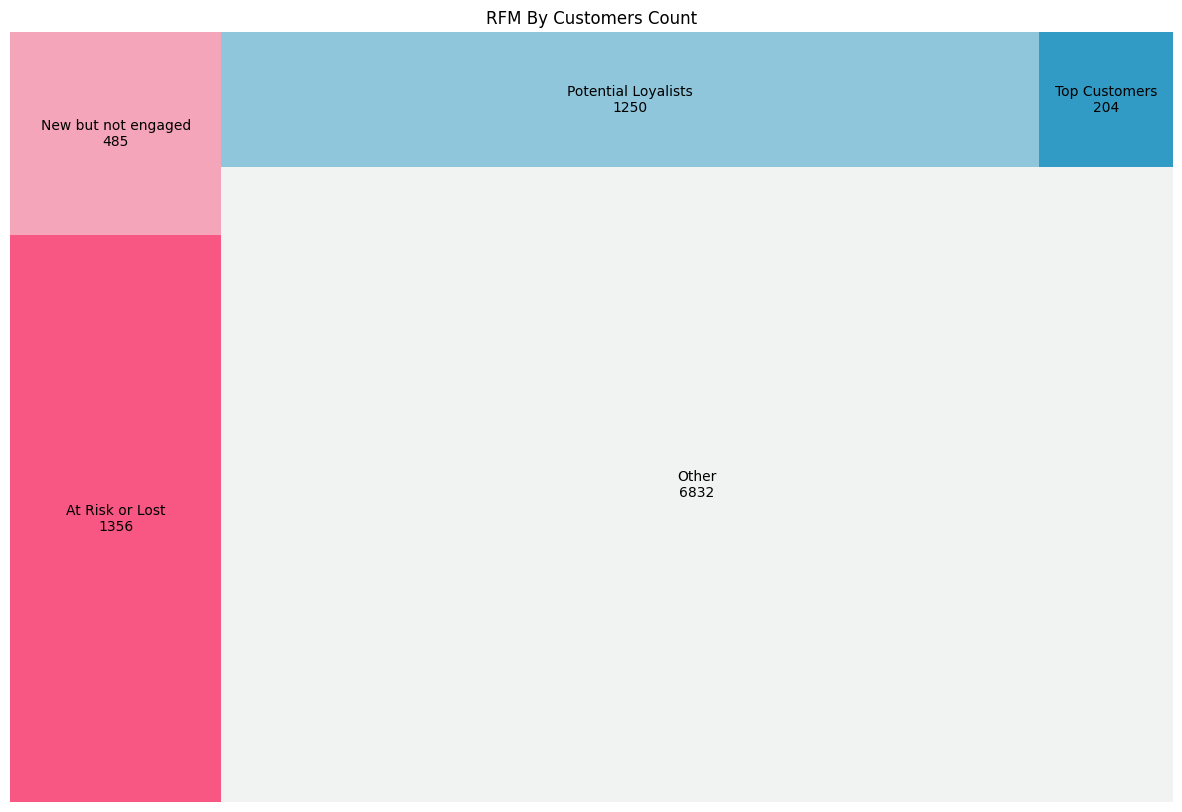

In [296]:
import squarify

rfm_summarised = df_customer_churn.groupby (by = "RFM_Segment", as_index = False)\
                        .agg (
                            customersCount = ("CLIENTNUM", "nunique"),
                            total_R = ("R_Score", "sum"),
                            total_F = ("F_Score", "sum"),
                            total_M = ("M_Score", "sum")
                        )

plt.figure(figsize=(15, 10))
squarify.plot(
    rfm_summarised["customersCount"].to_list(),
    label = rfm_summarised["RFM_Segment"] + "\n" + rfm_summarised["customersCount"].astype(str),
    color = color(n_colors=5)
)
plt.title ("RFM By Customers Count")
plt.axis("off")

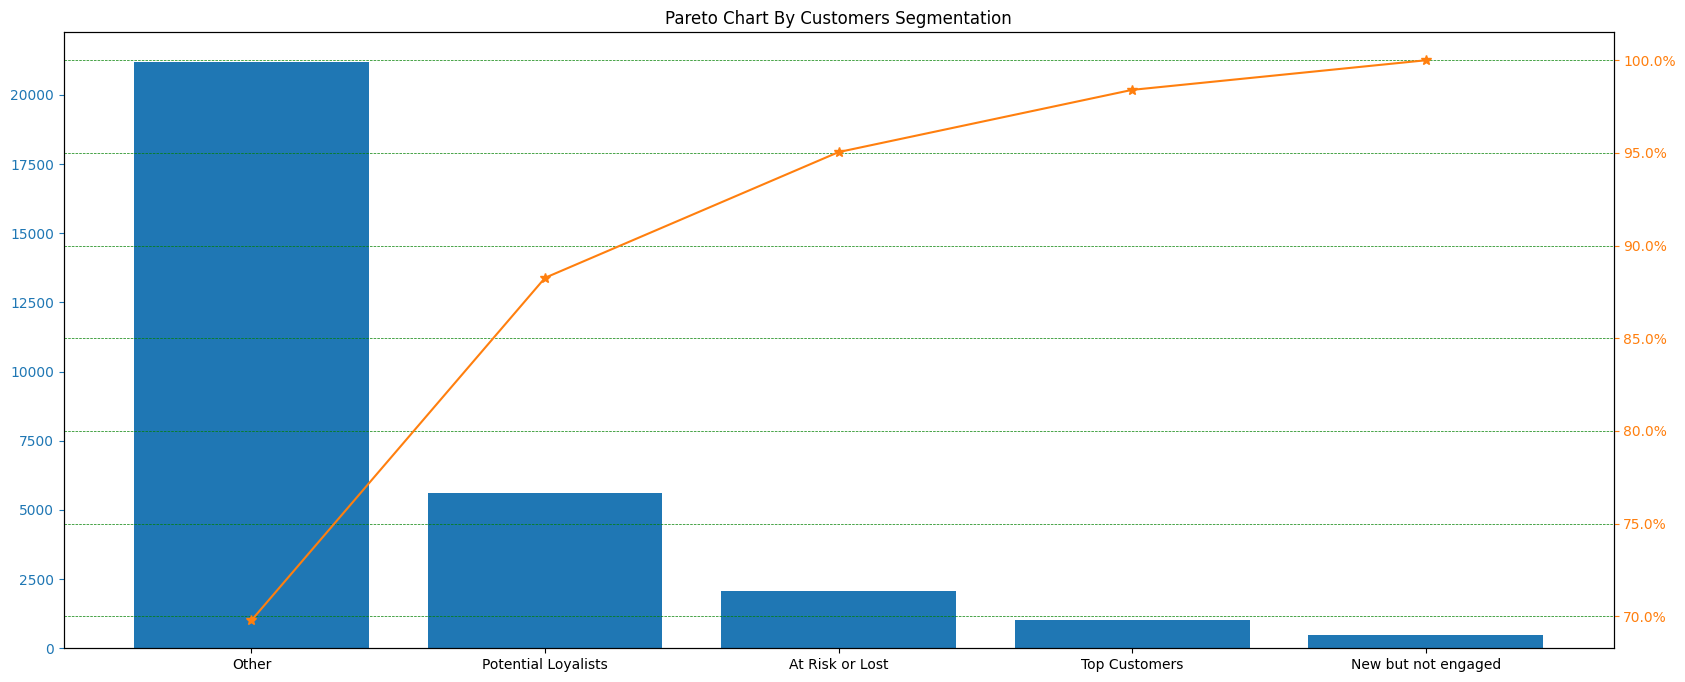

In [297]:
from matplotlib.ticker import PercentFormatter
rfm_summarised = rfm_summarised.sort_values(by="total_M",ascending=False)
rfm_summarised["cumpercentage"] = rfm_summarised["total_M"].cumsum()/rfm_summarised["total_M"].sum()*100
fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(rfm_summarised["RFM_Segment"], rfm_summarised["total_M"], color="C0")
ax2 = ax.twinx()
ax2.plot(rfm_summarised["RFM_Segment"], rfm_summarised["cumpercentage"], color="C1", marker="*", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.grid(color = "green", linestyle = "--", linewidth = 0.5)
plt.title ("Pareto Chart By Customers Segmentation")
plt.show()

**Insight**

| Segment                 | % of Customers | Key Behavior Insights                            | 
| ----------------------- | -------------- | ------------------------------------------------ |
| **Top Customers**       | **2%**         | Most recent, frequent, and highest spenders      |
| **Potential Loyalists** | **12%**        | Active with good frequency/spending              |
| **Other**               | **68%**        | Average recency, frequency, and spend            |
| **At Risk / Lost**      | **13%**        | Previously active, now disengaged (long recency) |
| **New, Not Engaged**    | **5%**         | Just joined, low activity & spend                |

**Pareto Insight**

* **Top 2 groups ("Top Customers" + "Potential Loyalists") = only 14% of users**
* But contribute **nearly 80% of revenue**
* → Focus efforts on **high-value groups**

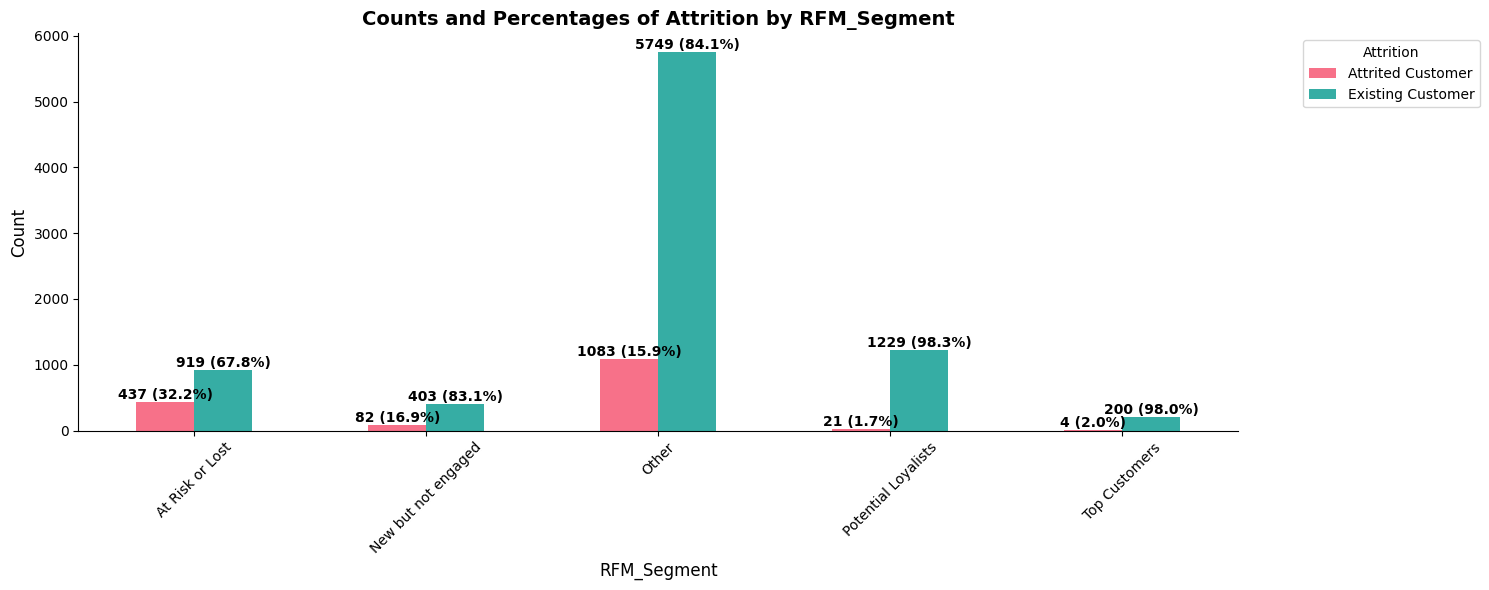


Chi-Square Test of Independence: 'RFM_Segment' vs. 'Attrition_Flag'
Chi-squared statistic: 485.067
Degrees of freedom: 4
p-value: 0.000000
Result: p-value < 0.05 -> Reject H0
-> There is a statistically significant association between 'RFM_Segment' and 'Attrition_Flag'.

Standardized Residuals:
Attrition_Flag       Attrited Customer  Existing Customer
RFM_Segment                                              
At Risk or Lost                  14.85              -6.50
New but not engaged               0.46              -0.20
Other                            -0.44               0.19
Potential Loyalists             -12.69               5.55
Top Customers                    -5.03               2.20


In [298]:
bivariate_percent_plot(cat="RFM_Segment", df= df_customer_churn, rot=45)

* **RFM segmentation is strongly associated with churn**
* **“At Risk or Lost”** group needs **recovery strategies**
* **“Top” and “Potential Loyalists”** show strong retention potential
* RFM segments are useful **predictors for churn modeling**

### Business Insight Ideas

#### Analyzing the Relationship Between Income and Trading Behavior

In [299]:
df_customer_churn_bussiness = df_customer_churn.copy()

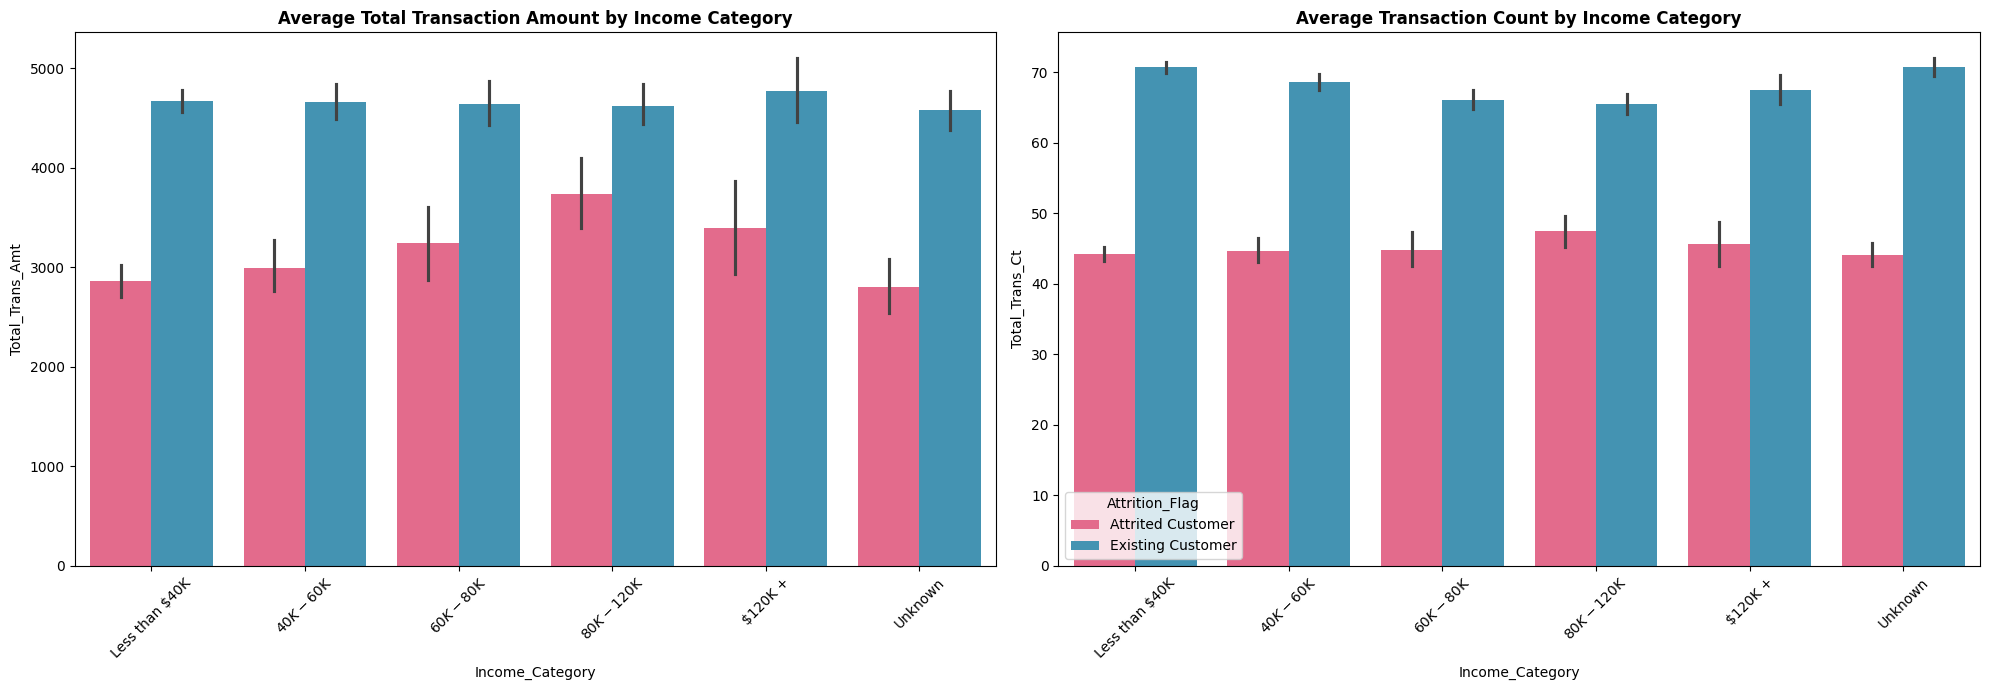

In [300]:
income_order = ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +", "Unknown"]
plt.figure(figsize=(20, 7))

# --- Barplot 1 ---
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=df_customer_churn_bussiness, x="Income_Category", y="Total_Trans_Amt",
                  palette=color(n_colors=2), order=income_order, hue="Attrition_Flag")
plt.title("Average Total Transaction Amount by Income Category", weight = "bold")
plt.xticks(rotation=45)
plt.legend().remove()

# --- Barplot 2 ---
plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=df_customer_churn_bussiness, x="Income_Category", y="Total_Trans_Ct", 
                  palette=color(n_colors=2), order=income_order, hue="Attrition_Flag")
plt.title("Average Transaction Count by Income Category", weight = "bold")
plt.xticks(rotation=45)

# for container in ax2.containers:
#     ax2.bar_label(container, fmt='%.0f', label_type="edge", fontsize=10)

plt.tight_layout()
plt.show()

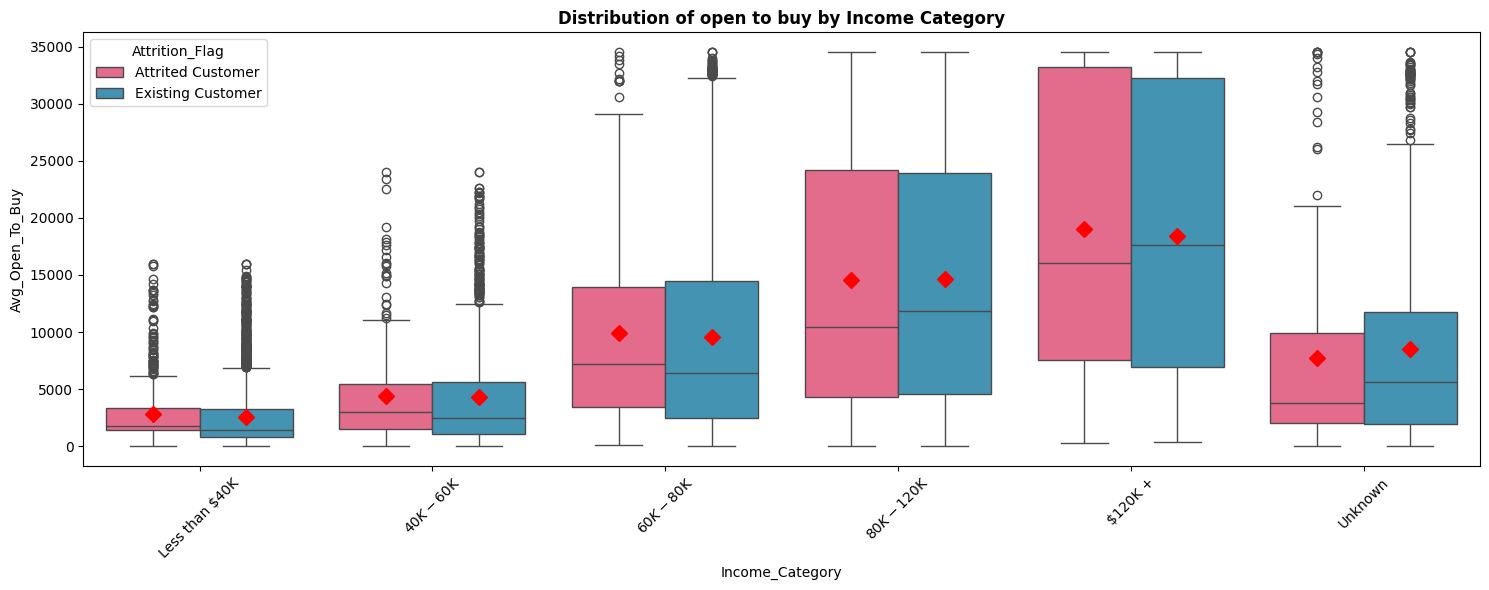

In [301]:

# meanprops to change the mean marker to red diamonds
meanprops = {
    "marker": "D",              # Shape: 'D' for diamond (optional; default is triangle)
    "markerfacecolor": "red",   # Fill color (this changes the main color)
    "markeredgecolor": "red",   # Edge color (set to match fill for a solid look)
    "markersize": 8             # Size of the marker (optional)
    }

plt.figure(figsize=(15, 6))
sns.boxplot(data=df_customer_churn_bussiness, x="Income_Category", y="Avg_Open_To_Buy",
            palette=color(n_colors=2), order=income_order, hue="Attrition_Flag",
            showmeans=True,         # Enables mean markers
            meanprops=meanprops)    # Applies custom styles (including color change)

plt.title("Distribution of open to buy by Income Category", weight="bold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


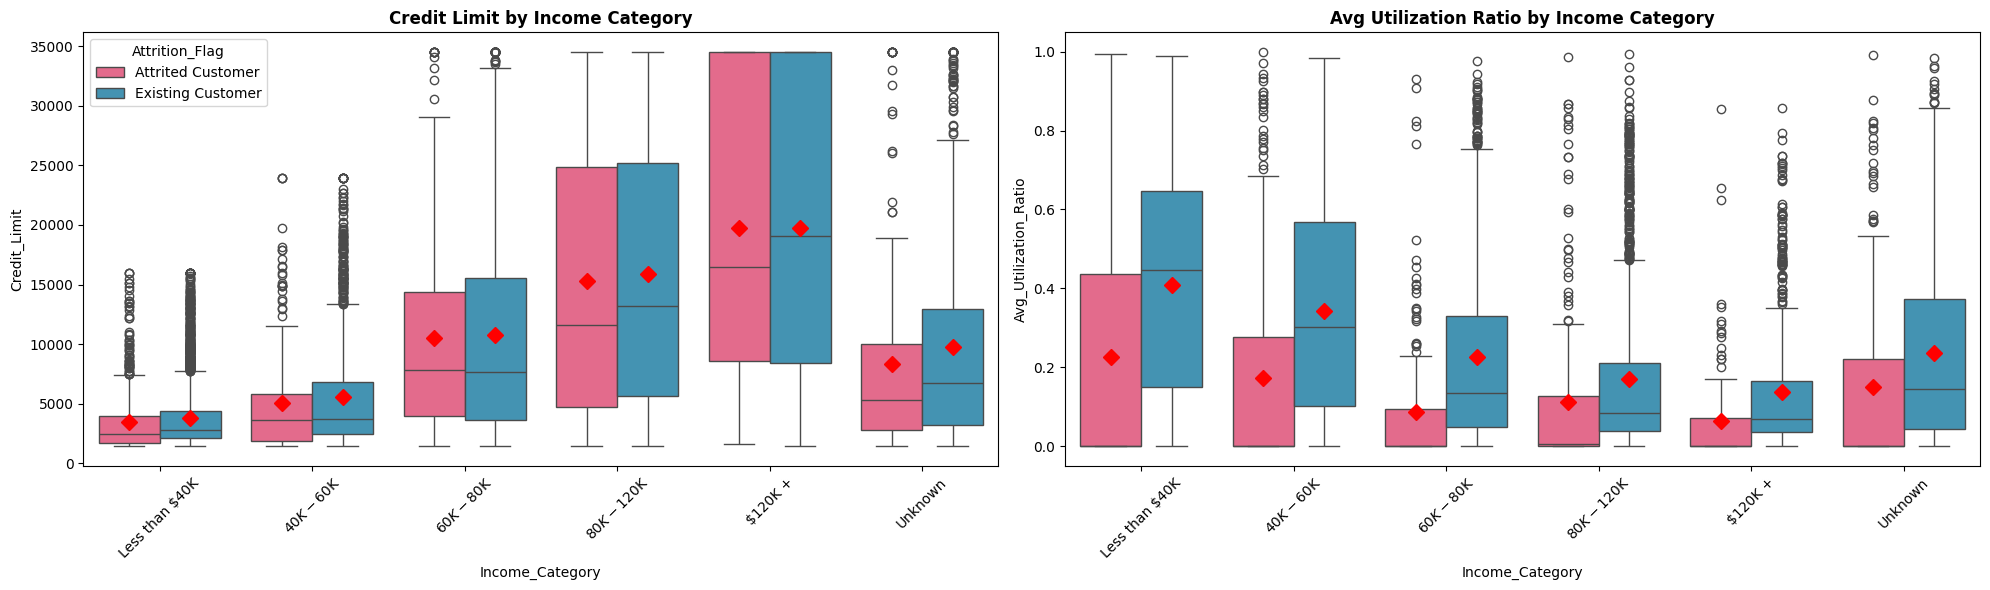

In [302]:
meanprops = {
    "marker": "D",              # Shape: 'D' for diamond (optional; default is triangle)
    "markerfacecolor": "red",   # Fill color (this changes the main color)
    "markeredgecolor": "red",   # Edge color (set to match fill for a solid look)
    "markersize": 8             # Size of the marker (optional)
    }

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_customer_churn_bussiness, x="Income_Category", y="Credit_Limit",
            palette=color(n_colors=2), order=income_order, hue="Attrition_Flag",
            showmeans=True,         # Enables mean markers
            meanprops=meanprops)    # Applies custom styles (including color change)
plt.title("Credit Limit by Income Category", weight="bold")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_customer_churn_bussiness, x="Income_Category", y="Avg_Utilization_Ratio",
            palette=color(n_colors=2), order=income_order, hue="Attrition_Flag",
            showmeans=True,         # Enables mean markers
            meanprops=meanprops)    # Applies custom styles (including color change)
plt.title("Avg Utilization Ratio by Income Category", weight="bold")
plt.xticks(rotation=45)
plt.legend().remove()

plt.tight_layout()
plt.show()

**1. Average Transactions by Income & Customer Status**

**Insight:**

* **Existing Customers** consistently show higher average transaction amounts and counts across all income groups.
* In the `$80K–$120K` income group, **Attrited Customers** exhibit the highest transaction levels among their peers — indicating this may be a **high-value segment that was lost**.

**2. Distribution of `Avg_Open_To_Buy` by Income & Churn Status**

**Insight:**

* **Hard to tell** as distributions are closely followed across the existing and attrited customers.


**3. Credit Limit & Utilization ratio by Income & Churn Status**

**Insight:**

* **Credit Limit increases clearly with income**, as expected.
* However, **Attrited Customers consistently show lower Utilization Ratios** — particularly in income groups below `$60K`.

#### Transaction Analysis by Age

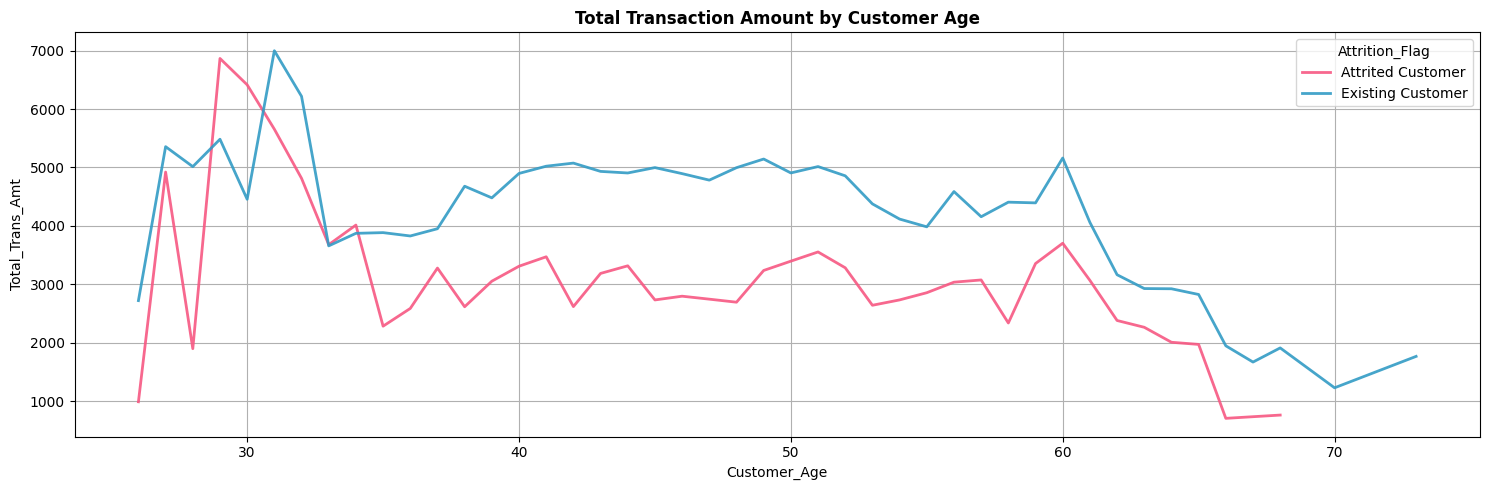

In [303]:
# Total Transaction Amount by Customer Age
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_customer_churn_bussiness, x="Customer_Age", y="Total_Trans_Amt",
             hue="Attrition_Flag", palette=color(n_colors=2), ci=None, linewidth=2, alpha=0.9)
plt.title("Total Transaction Amount by Customer Age", weight = "bold")
plt.grid(True)
plt.tight_layout()
plt.show()

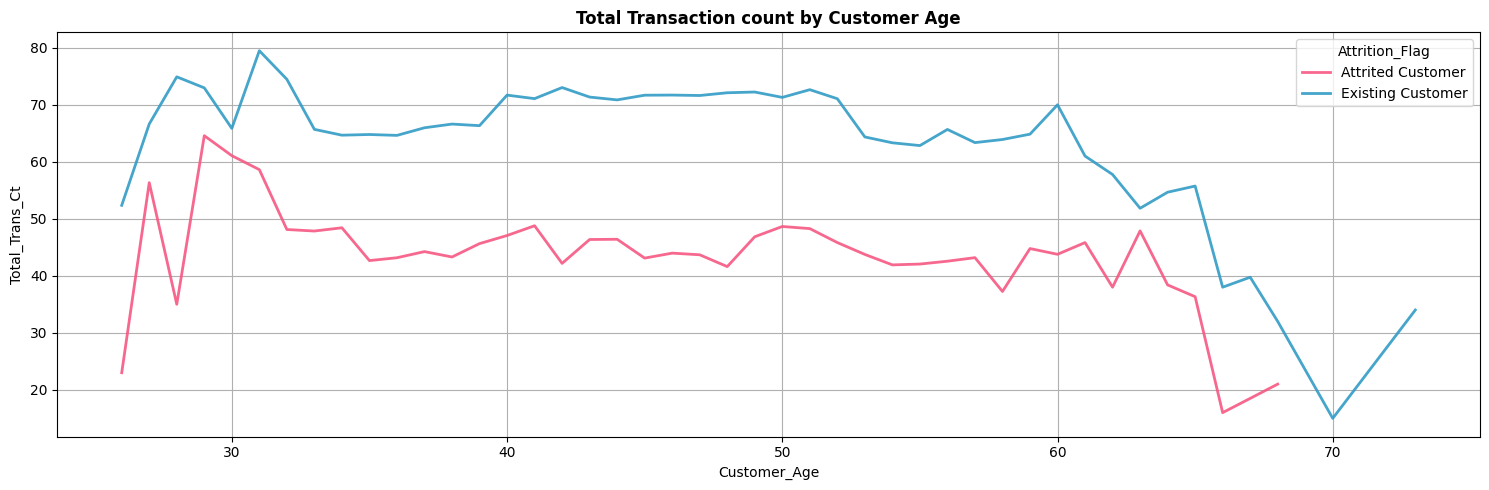

In [304]:
# Total Transaction by Customer Age
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_customer_churn_bussiness, x="Customer_Age", y="Total_Trans_Ct",
             hue="Attrition_Flag", palette=color(n_colors=2), ci=None, linewidth=2, alpha=0.9)
plt.title("Total Transaction count by Customer Age", weight = "bold")
plt.grid(True)
plt.tight_layout()
plt.show()

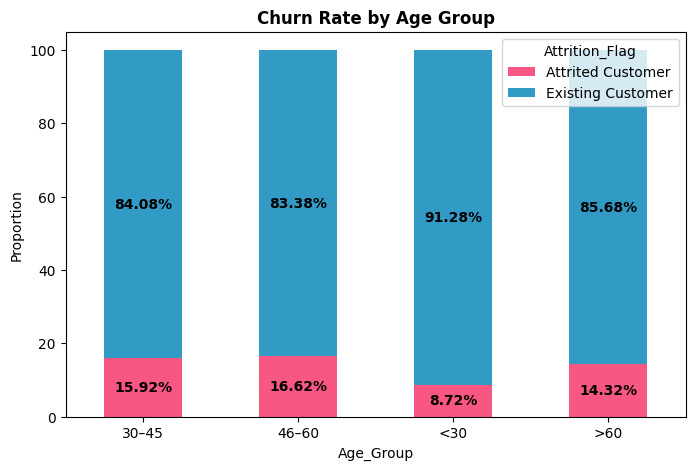

In [305]:
def categorize_age(age):
    if age < 30:
        return "<30"
    elif 30 <= age <= 45:
        return "30–45"
    elif 46 <= age <= 60:
        return "46–60"
    else:
        return ">60"

cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

df_customer_churn_bussiness["Age_Group"] = df_customer_churn_bussiness["Customer_Age"].apply(categorize_age)

age_churn = df_customer_churn_bussiness.groupby("Age_Group")["Attrition_Flag"].value_counts(normalize=True).unstack() * 100

ax = age_churn.plot(kind="bar", stacked=True, figsize=(8, 5), cmap=cmap)
for container in ax.containers:
    ax.bar_label(container, fmt='%1.2f%%', label_type="center", weight="bold", fontsize=10)
plt.title("Churn Rate by Age Group", weight = "bold")
plt.ylabel("Proportion")
plt.legend(title="Attrition_Flag")
plt.xticks(rotation=0)
plt.show()

**Customer Behavior by Age – Business Insights**

**1. Total Transaction Amount and Count by Age**

**Insights:**

* **Existing Customers** consistently perform more transactions (both in count and value) than **Attrited Customers**.
* Transaction activity **peaks around age 30–40** and steadily declines after age 60.
* For Attrited Customers, spending behavior is **lower overall and declines faster with age**.

**2. Churn Rate by Age Group**

**Insights:**

| Age Group | Attrited (%) | Existing (%) |
| --------- | ------------ | ------------ |
| `<30`     | **8.72%**    | 91.28%       |
| `30–45`   | 15.92%       | 84.08%       |
| `46–60`   | **16.62%**   | 83.38%       |
| `>60`     | 14.32%       | 85.68%       |

* **Customers under 30** have the **lowest churn rate**, though they transact less.
* The **46–60 segment has the highest churn rate**, suggesting unmet needs or declining satisfaction.

#### Consumer Behavior by Gender

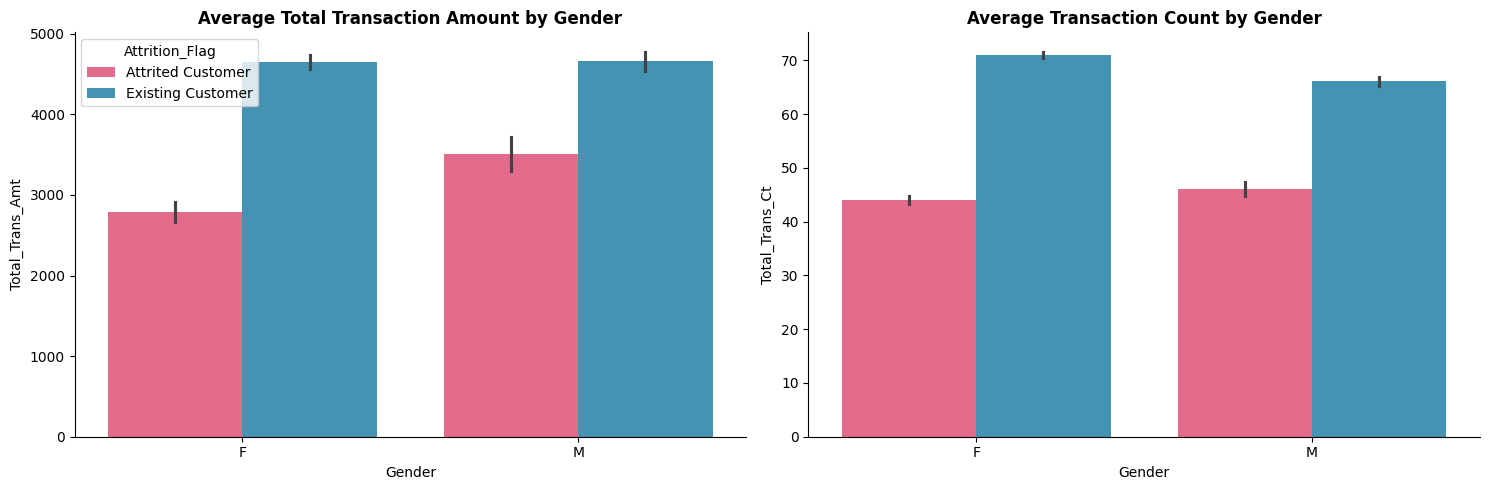

In [306]:
# Total_Trans_Amt and Total_Trans_Ct by Gender
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df_customer_churn_bussiness, x="Gender", y="Total_Trans_Amt",
            estimator="mean", palette=color(n_colors=2),  hue="Attrition_Flag")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Average Total Transaction Amount by Gender", weight = "bold")

plt.subplot(1, 2, 2)
sns.barplot(data=df_customer_churn_bussiness, x="Gender", y="Total_Trans_Ct",
            estimator="mean", palette=color(n_colors=2),  hue="Attrition_Flag")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Average Transaction Count by Gender", weight = "bold")
plt.legend().remove()

plt.tight_layout()
plt.show()


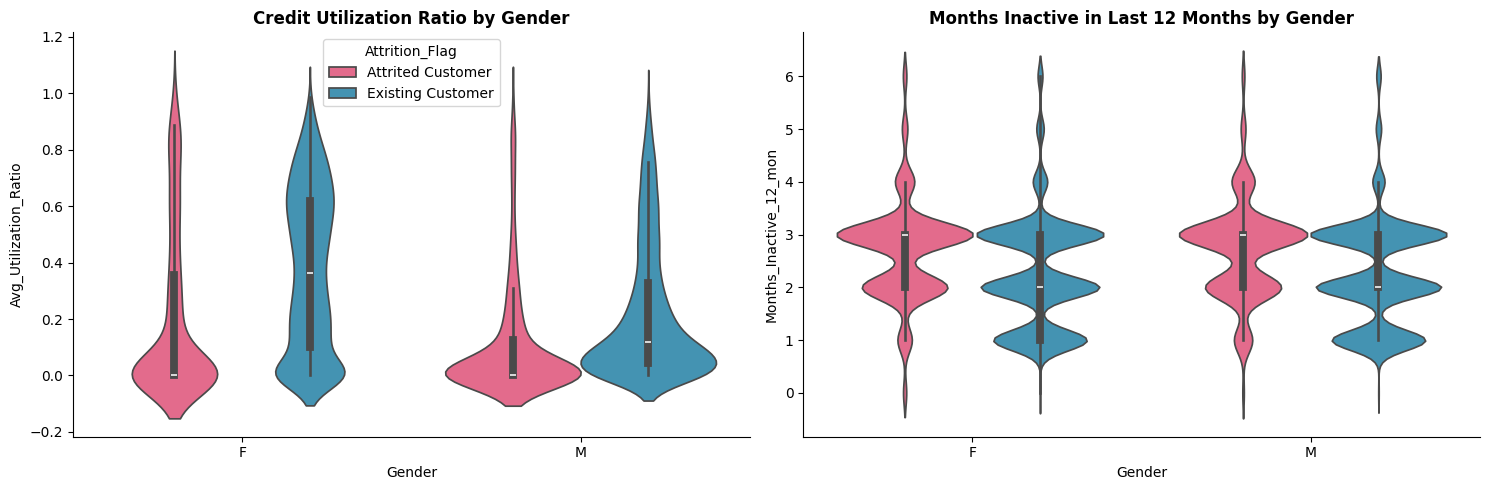

In [307]:
# Avg_Utilization_Ratio and Months_Inactive_12_mon between Male và Female
plt.figure(figsize=(15, 5))

df_customer_churn["Months_Inactive_12_mon"] = \
    pd.to_numeric(df_customer_churn["Months_Inactive_12_mon"], errors="coerce")
plt.subplot(1, 2, 1)
sns.violinplot(data=df_customer_churn, x="Gender", y="Avg_Utilization_Ratio",
               palette=color(n_colors=2), hue="Attrition_Flag")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Credit Utilization Ratio by Gender", weight = "bold")

plt.subplot(1, 2, 2)
sns.violinplot(data=df_customer_churn, x="Gender", y="Months_Inactive_12_mon",
               palette=color(n_colors=2), hue="Attrition_Flag")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.title("Months Inactive in Last 12 Months by Gender", weight = "bold")
plt.legend().remove()

plt.tight_layout()
plt.show()

**1. Average Transactions by Gender (`Total_Trans_Amt`, `Total_Trans_Ct`)**

**Insights:**

* **Existing Customers** have significantly higher transaction amounts and counts than **Attrited Customers**, for both males and females.
* Among **Attrited Customers**, **males have higher average transaction amounts** than females.
* Transaction count is fairly similar between genders in the attrited group, but **female Existing Customers perform more transactions** than males.

**2. Distribution of `Avg_Utilization_Ratio` and `Months_Inactive_12_mon` by Gender**

**Insights:**

* For `Avg_Utilization_Ratio`:

  * Most customers have low utilization ratios, concentrated near zero.
  * **Attrited Customers** show a wider spread toward high utilization, especially among females.
  * No major difference is observed between genders in the **Existing Customer** group.

* For `Months_Inactive_12_mon`:

  * Both genders show similar distributions.
  * Most customers had 2–3 months of inactivity in the past year.
  * **Attrited Customers** exhibit more variation, but no clear gender-specific trend is observed.

#### Credit Utilization Efficiency

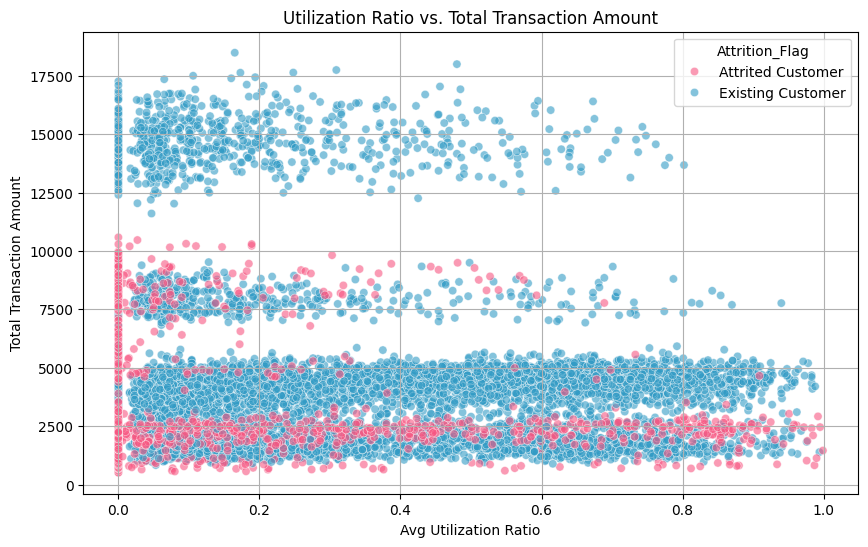

In [308]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_customer_churn_bussiness,
    x="Avg_Utilization_Ratio",
    y="Total_Trans_Amt",
    hue="Attrition_Flag",
    alpha=0.6,
    palette=color(n_colors=2)
)
plt.title("Utilization Ratio vs. Total Transaction Amount")
plt.xlabel("Avg Utilization Ratio")
plt.ylabel("Total Transaction Amount")
plt.grid(True)
plt.show()

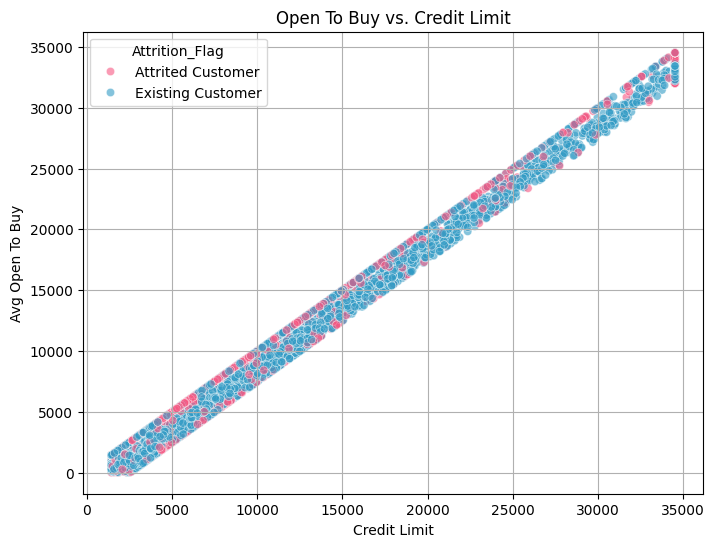

In [309]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_customer_churn,
    x="Credit_Limit",
    y="Avg_Open_To_Buy",
    hue="Attrition_Flag",
    alpha=0.6,
    palette=color(n_colors=2)
)
plt.title("Open To Buy vs. Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Avg Open To Buy")
plt.grid(True)
plt.show()

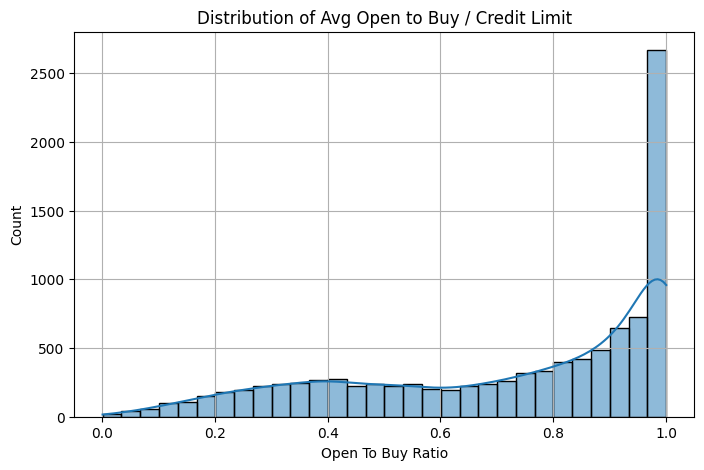

In [313]:
df_customer_churn_bussiness["OpenToLimitRatio"] = df_customer_churn_bussiness["Avg_Open_To_Buy"] / df_customer_churn_bussiness["Credit_Limit"]
plt.figure(figsize=(8, 5))
sns.histplot(df_customer_churn_bussiness["OpenToLimitRatio"], bins=30, kde=True)
plt.title("Distribution of Avg Open to Buy / Credit Limit")
plt.xlabel("Open To Buy Ratio")
plt.grid(True)
plt.show()

**1. Chart: `Avg_Utilization_Ratio` vs. `Total_Trans_Amt`**

**Insights:**

* The data forms several horizontal "bands" — indicating common spending levels (e.g., 2,500 / 5,000 / 10,000...).
* Most data points are concentrated at low `Avg_Utilization_Ratio` values (below 0.4), even when `Total_Trans_Amt` is high.
* There is no clear linear relationship between credit utilization and spending amount.
* **Existing Customers** show a wider spread along both axes.

**2. Chart: `Avg_Open_To_Buy` vs. `Credit_Limit`**

**Insights:**

* The points lie almost perfectly on a diagonal — indicating a near-linear relationship between `Credit_Limit` and `Avg_Open_To_Buy`.
* This is expected because:
  `Avg_Open_To_Buy ≈ Credit_Limit - Avg_Revolving_Bal`.
* The distribution appears similar across both **Attrited** and **Existing** customer groups.

**3. Chart: Distribution of `Avg_Open_To_Buy / Credit_Limit`**

**Insights:**

* The distribution is heavily right-skewed — the majority of customers have an **open-to-buy ratio > 0.8**, indicating a large portion of their credit limit remains unused.
* The peak occurs close to 1.0, confirming that most customers are using very little of their available credit.
* A smaller subset has ratios below 0.4, meaning they are utilizing most of their limit.

# **Data Preprocessing**

## Feature Engineering

In [314]:
df_customer_churn["Utilization_Ratio_Per_Trans"] = df_customer_churn["Avg_Utilization_Ratio"] / (df_customer_churn["Total_Trans_Ct"] + 1)
df_customer_churn["Credit_Usage_Efficiency"] = df_customer_churn["Total_Trans_Amt"] / (df_customer_churn["Credit_Limit"] + 1)
df_customer_churn["Trans_Change_Rate"] = df_customer_churn["Total_Ct_Chng_Q4_Q1"] / (df_customer_churn["Total_Trans_Ct"] + 1)
df_customer_churn["Age_To_Months_Ratio"] = df_customer_churn["Customer_Age"] / (df_customer_churn["Months_on_book"] + 1)

`Utilization_Ratio_Per_Trans`

* Measures the **average utilization ratio per transaction**.
* Helps distinguish customers who **make fewer but larger transactions** (potentially high risk) from those who **spend smaller amounts more frequently**.

`Credit_Usage_Efficiency`

* Indicates how efficiently the customer **converts their credit limit into actual transaction amount**.
* High values may reflect good utilization — or possibly overextension.

`Open_To_Buy_Ratio`

* Represents the **remaining credit capacity**.
* High ratio → customer still has large available credit.
* Low ratio → customer is utilizing most of their limit, potentially risky.

`Trans_Change_Rate`

* Measures the **rate of transaction count change between Q4 and Q1** relative to total transactions.
* A high value suggests **behavioral shifts**, which could be early signs of churn or instability.

`Age_To_Months_Ratio`

* Estimates the **relative age at account creation**.
* Younger customers with long tenure may indicate **higher loyalty**.

In [315]:
list_feature_drop = ["Recency", "Frequency", "Monetary", "R_Score", "F_Score", "M_Score", "CLIENTNUM"]
df_customer_churn.drop(columns=list_feature_drop, axis=1, inplace=True)

KeyError: "['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'CLIENTNUM'] not found in axis"

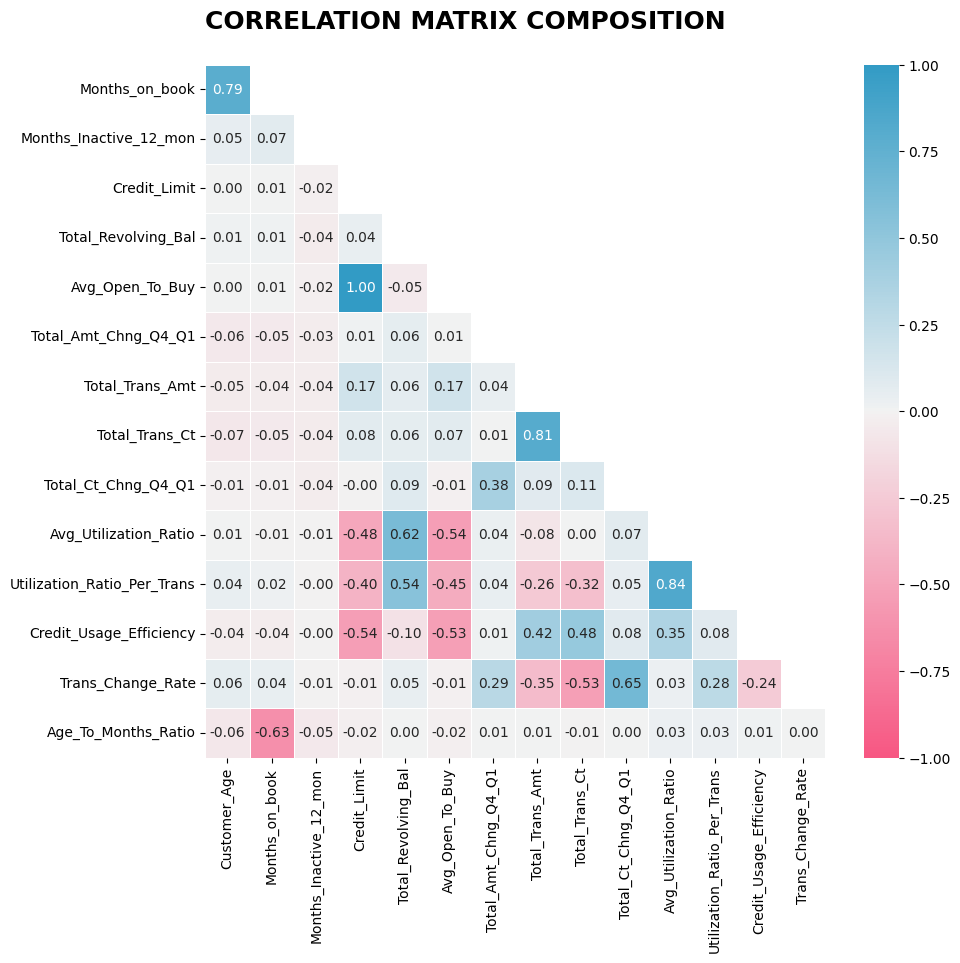

In [316]:
corr_matrix = df_customer_churn.corr(numeric_only=True)
# one_like can build a matrix of boolean(True, False) with the same shape as our data
ones_corr = np.ones_like(corr_matrix, dtype=bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

fig, ax = plt.subplots(figsize = (10, 9))
# That method uses HUSL colors, so you need hue, saturation, and lightness. 
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

title = "CORRELATION MATRIX COMPOSITION\n"
ax.set_title(title, loc="left", fontsize=18, weight="bold");

In [317]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df_customer_churn[num_features].columns
vif_data["VIF"] = [variance_inflation_factor(df_customer_churn[num_features].values, i)
                   for i in range(len(df_customer_churn[num_features].columns))]

In [318]:
vif_data

feature        VIF
0           Customer_Age  70.631111
1           Credit_Limit        inf
2        Avg_Open_To_Buy        inf
3        Total_Trans_Amt   7.675934
4         Months_on_book  56.296010
5         Total_Trans_Ct  21.627793
6    Total_Ct_Chng_Q4_Q1  11.656472
7   Total_Amt_Chng_Q4_Q1  13.224664
8  Avg_Utilization_Ratio   5.995190
9    Total_Revolving_Bal        inf

**VIF Analysis – Detecting Multicollinearity in Numerical Features**


**Key Findings from VIF Table**

| Feature                    | VIF Score | Interpretation                                                                |
| -------------------------- | --------- | ----------------------------------------------------------------------------- |
| **Credit\_Limit**          | ∞         | Perfect multicollinearity — likely caused by `Avg_Open_To_Buy` being derived. |
| **Avg\_Open\_To\_Buy**     | ∞         | Strongly collinear with `Credit_Limit` (→ recommend **drop 1 of them**)       |
| **Customer\_Age**          | 219.7     | Very high collinearity with `Months_on_book` (r = 0.79)                       |
| **Months\_on\_book**       | 132.2     | Same issue — should keep only **one** of the pair                             |
| **Total\_Trans\_Ct**       | 56.6      | Strong correlation with `Total_Trans_Amt` (r = 0.81) — consider dropping one  |
| **Age\_To\_Months\_Ratio** | 59.3      | Derived from age/months → high VIF is expected                                |

**Features with Multicollinearity Risk (VIF > 10)**

* `Credit_Limit`, `Avg_Open_To_Buy` → **Perfect correlation**
* `Customer_Age`, `Months_on_book` → **Very high redundancy**
* `Total_Trans_Ct`, `Total_Trans_Amt` → strong positive linear dependency
* `Age_To_Months_Ratio` → engineered feature, already dependent

**Handling Multicollinearity in Feature Set**

Although several features exhibit **high multicollinearity** (e.g., high VIF scores or perfect correlations),
we will **not drop any of them** at this stage.

> This decision is based on the fact that **multicollinearity primarily affects linear models** (e.g., Logistic Regression),
> whereas **non-linear models** (e.g., Decision Trees, Random Forest, XGBoost) are **not sensitive** to collinear features.

Furthermore:

* Tree-based models **naturally handle redundant features** by selecting only the most informative splits.
* Removing features too early might lead to **loss of potentially useful signals** for churn prediction.

👉 **Action**: We will retain all numerical features for now and rely on model-specific mechanisms (e.g., regularization or feature importance) to handle redundancy if needed.

## Handling Skewness

In [319]:
list_new_features = ["Utilization_Ratio_Per_Trans", "Credit_Usage_Efficiency", "Trans_Change_Rate", "Age_To_Months_Ratio"]
num_features.extend(list_new_features)

In [320]:
skew_feature, skew_df = check_skewness(data=df_customer_churn, numerical_features=num_features)


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
Trans_Change_Rate              |  +6.138422 | Highly skewed
Total_Ct_Chng_Q4_Q1            |  +2.064031 | Highly skewed
Total_Trans_Amt                |  +2.041003 | Highly skewed
Utilization_Ratio_Per_Trans    |  +2.027268 | Highly skewed
Total_Amt_Chng_Q4_Q1           |  +1.732064 | Highly skewed
Credit_Limit                   |  +1.666726 | Highly skewed
Avg_Open_To_Buy                |  +1.661697 | Highly skewed
Age_To_Months_Ratio            |  +1.556009 | Highly skewed
Credit_Usage_Efficiency        |  +1.269607 | Highly skewed
Avg_Utilization_Ratio          |  +0.718008 | Moderately skewed
Total_Trans_Ct                 |  +0.153673 | Approximately symmetric
Total_Revolving_Bal            |  -0.148837 | Approximately symmetric
Months_on_book                 |  -0

In [321]:
from sklearn.preprocessing import PowerTransformer

def handle_skewed_features(
    df,
    zero_threshold=0.9,
    skew_threshold=0.5,
    num_features=None,
    exclude_cols=None    
):
    """
    Handle skewed numerical features by applying appropriate transformations.

    Parameters:
    - df: pandas.DataFrame
    - zero_threshold: float (default=0.9)
    - skew_threshold: float (default=0.5)
    - num_features: list of numerical columns to consider
    - exclude_cols: list of columns to skip entirely

    Returns:
    - df: transformed DataFrame
    - transformed_cols: list of new feature names
    - high_zero_cols: list of sparse features (> zero_threshold)
    - skewed_cols: list of auto‑detected skewed features
    """
    df = df.copy()
    if num_features is None:
        raise ValueError("`num_features` must be provided")
    if exclude_cols is None:
        exclude_cols = []

    # 1) pick the numeric cols to scan
    numerical_cols = [c for c in num_features if c not in exclude_cols]

    # 2) detect ultra‑sparse
    zero_ratios = (df[numerical_cols] == 0).sum() / len(df)
    high_zero_cols = zero_ratios[zero_ratios > zero_threshold].index.tolist()

    # 3) compute skew
    skew_vals = df[numerical_cols].apply(lambda s: skew(s.dropna()))
    auto_skewed = skew_vals[abs(skew_vals) > skew_threshold].index.tolist()

    # 4) union these with your forced list
    to_transform = list(set(auto_skewed))

    transformed_cols = []
    dropped_cols     = []

    for col in to_transform:
        # if it's sparse → binary+log
        if col in high_zero_cols:
            df[f"Has_{col}"] = (df[col] > 0).astype(int)
            df[f"Log_{col}"] = df[col].map(lambda x: np.log1p(x) if x > 0 else 0)
            transformed_cols += [f"Has_{col}", f"Log_{col}"]
            dropped_cols.append(col)
        # if it's discrete small‑cardinality, skip transform but keep
        elif df[col].nunique() <= 5:
            # do nothing (we still keep raw col in df)
            continue
        # otherwise apply Yeo‑Johnson
        else:
            pt = PowerTransformer(method="yeo-johnson")
            arr = df[[col]].values  # shape (n,1)
            df[f"PT_{col}"] = pt.fit_transform(arr)
            transformed_cols.append(f"PT_{col}")
            dropped_cols.append(col)

    # drop originals for any column we did transform
    df.drop(columns=dropped_cols, inplace=True)

    return df, transformed_cols, high_zero_cols, auto_skewed

In [322]:
processed_df, transformed_columns, sparse_columns, skewed_columns = handle_skewed_features(df=df_customer_churn, 
                                                                                           num_features=skew_feature)

In [323]:
list_feature_skewed = processed_df.select_dtypes(include=["number"]).columns.tolist()
skew_feature, skew_df = check_skewness(data=processed_df, numerical_features=list_feature_skewed)


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
Months_Inactive_12_mon         |  +0.633061 | Moderately skewed
PT_Utilization_Ratio_Per_Trans |  +0.350458 | Approximately symmetric
PT_Trans_Change_Rate           |  +0.271947 | Approximately symmetric
PT_Avg_Utilization_Ratio       |  +0.196952 | Approximately symmetric
Total_Trans_Ct                 |  +0.153673 | Approximately symmetric
Total_Revolving_Bal            |  -0.148837 | Approximately symmetric
PT_Credit_Usage_Efficiency     |  +0.113058 | Approximately symmetric
PT_Age_To_Months_Ratio         |  -0.106826 | Approximately symmetric
Months_on_book                 |  -0.106565 | Approximately symmetric
PT_Credit_Limit                |  +0.102567 | Approximately symmetric
PT_Total_Amt_Chng_Q4_Q1        |  -0.088065 | Approximately symmetric
PT_Total_Ct_Chng

**Insight** <br>
**Observations from the Skewness Table (`processed_df`):**

**Approximately Symmetric**: <br>
Several features, such as: <br>
  * `PT_Utilization_Ratio_Per_Trans`, `PT_Trans_Change_Rate`, `PT_Avg_Utilization_Ratio`, `PT_Credit_Usage_Efficiency`, `PT_Age_To_Months_Ratio`, `PT_Credit_Limit`, `PT_Total_Amt_Chng_Q4_Q1`, `PT_Total_Ct_Chng_Q4_Q1`, `PT_Avg_Open_To_Buy` and `PT_Total_Trans_Amt` show skewness close to `0`.
  * This indicates that **Yeo-Johnson transformation was effective** for these variables.

## Re-Checking Outlier

In [324]:
checking_outlier(list_feature=list_feature_skewed, df=processed_df, dataset_name="Data")

Feature  Outlier Count
0             Customer_Age              2
1           Months_on_book            386
2   Months_Inactive_12_mon            331
3           Total_Trans_Ct              2
4  PT_Total_Amt_Chng_Q4_Q1            357
5       PT_Total_Trans_Amt             53
6     PT_Trans_Change_Rate             32
7   PT_Total_Ct_Chng_Q4_Q1            459
8   PT_Age_To_Months_Ratio            263
9       PT_Avg_Open_To_Buy             15

## Create Test Set

🔴 Suppose you chatted with experts who told you that the **Total_Trans_Amt** is a very important attribute to predict **Attrition_Flag**. <br>
🔴 We may want to ensure that the test set is representative of the various categories of total trans amount in the whole dataset. Since the Total_Trans_Amt is a continuous numerical attribute, we first need to create an score category attribute.

In [325]:
df_customer_churn["Attrition_Flag"].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [326]:
from sklearn.preprocessing import LabelEncoder

le_Gender = LabelEncoder()
processed_df["Gender"] = le_Gender.fit_transform(processed_df["Gender"])

manual_map = {
    "Attrited Customer": 1,
    "Existing Customer": 0
}

processed_df["Attrition_Flag"] = processed_df["Attrition_Flag"].map(manual_map)

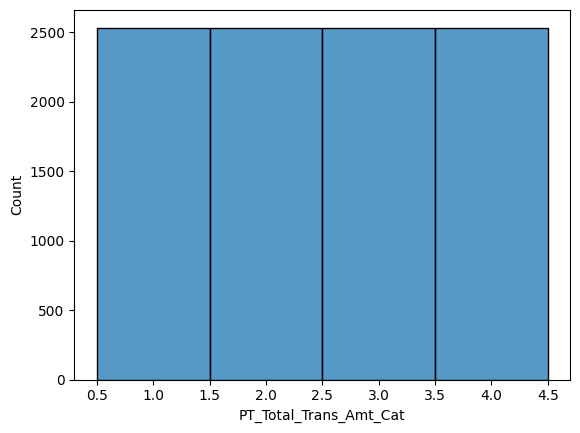

In [327]:
processed_df["PT_Total_Trans_Amt_Cat"] = pd.qcut(processed_df["PT_Total_Trans_Amt"],
                                              q=4,
                                              labels=[1, 2, 3, 4])

sns.histplot(data=processed_df["PT_Total_Trans_Amt_Cat"]);

In [328]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(processed_df, processed_df["PT_Total_Trans_Amt_Cat"]):
    start_train_set = processed_df.iloc[train_index]
    start_test_set = processed_df.iloc[test_index]

In [329]:
# Now we should remove the PT_Total_Trans_Amt_Cat attribute so the data is back to its original state:
for set_ in (start_train_set, start_test_set): 
    set_.drop("PT_Total_Trans_Amt_Cat", axis=1, inplace=True)

## Scale and Encode

In [330]:
df_Churn_new = start_train_set.drop("Attrition_Flag", axis=1)
df_Churn_label = start_train_set["Attrition_Flag"].copy()

In [331]:
df_Churn_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8101 entries, 9736 to 6136
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Customer_Age                    8101 non-null   int8    
 1   Gender                          8101 non-null   int64   
 2   Dependent_count                 8101 non-null   category
 3   Education_Level                 8101 non-null   category
 4   Marital_Status                  8101 non-null   category
 5   Income_Category                 8101 non-null   category
 6   Card_Category                   8101 non-null   category
 7   Months_on_book                  8101 non-null   int8    
 8   Total_Relationship_Count        8101 non-null   category
 9   Months_Inactive_12_mon          8101 non-null   int64   
 10  Contacts_Count_12_mon           8101 non-null   category
 11  Total_Revolving_Bal             8101 non-null   int16   
 12  Total_Trans_Ct        

In [332]:
list_feature_num_robust = ["Customer_Age","Months_on_book", "Total_Trans_Ct",  "PT_Age_To_Months_Ratio", "PT_Avg_Open_To_Buy",
                           "PT_Total_Ct_Chng_Q4_Q1", "PT_Total_Trans_Amt", "PT_Trans_Change_Rate", "PT_Total_Amt_Chng_Q4_Q1"]
list_feature_num_stand = ["Total_Revolving_Bal", "PT_Credit_Limit", "PT_Credit_Usage_Efficiency", "PT_Avg_Utilization_Ratio",
                          "PT_Utilization_Ratio_Per_Trans"]
list_feature_cat_onehot = ["Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Dependent_count",
                           "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Total_Relationship_Count", "RFM_Segment"]
list_feature_cat_keep = ["Gender"]


In [333]:
# There are no **missing values** in dataset. But we will still handle missing values ​​to check the data in the future.
num_robust_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

num_stand_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_onehot_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("encoder", OneHotEncoder(handle_unknown="ignore")) # Handling Text and Categorical Attributes
])

cat_keep_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

In [334]:
preprocessor = ColumnTransformer(transformers=[
    ("num_robust", num_robust_transformer, list_feature_num_robust),
    ("num_standard", num_stand_transformer, list_feature_num_stand),
    ("cat_onehot", cat_onehot_transformer, list_feature_cat_onehot),
    ("cat_keep", cat_keep_transformer, list_feature_cat_keep),
])

preprocessor.fit(df_Churn_new)

ColumnTransformer(transformers=[('num_robust',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['Customer_Age', 'Months_on_book',
                                  'Total_Trans_Ct', 'PT_Age_To_Months_Ratio',
                                  'PT_Avg_Open_To_Buy',
                                  'PT_Total_Ct_Chng_Q4_Q1',
                                  'PT_Total_Trans_Amt', 'PT_Trans_Change_Rate',
                                  'PT_Total_Amt_Chng_Q4_Q1']),
                                ('num_standard',
                                 Pipeli...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Education_Level', 'Marital_Status',
                                  'Income_Category', 'Card_Category',
                                  'Dependent_count', 'Months_Inactive_12_mon',
                                  'Contacts_Count_12_mon',
                                  'Total_Relationship_Count', 'RFM_Segment']),
                                ('cat_keep',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Gender'])])

In [335]:
df_Churn_prepared = preprocessor.transform(df_Churn_new)

In [336]:
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num_robust__Customer_Age',
 'num_robust__Months_on_book',
 'num_robust__Total_Trans_Ct',
 'num_robust__PT_Age_To_Months_Ratio',
 'num_robust__PT_Avg_Open_To_Buy',
 'num_robust__PT_Total_Ct_Chng_Q4_Q1',
 'num_robust__PT_Total_Trans_Amt',
 'num_robust__PT_Trans_Change_Rate',
 'num_robust__PT_Total_Amt_Chng_Q4_Q1',
 'num_standard__Total_Revolving_Bal',
 'num_standard__PT_Credit_Limit',
 'num_standard__PT_Credit_Usage_Efficiency',
 'num_standard__PT_Avg_Utilization_Ratio',
 'num_standard__PT_Utilization_Ratio_Per_Trans',
 'cat_onehot__Education_Level_College',
 'cat_onehot__Education_Level_Doctorate',
 'cat_onehot__Education_Level_Graduate',
 'cat_onehot__Education_Level_High School',
 'cat_onehot__Education_Level_Post-Graduate',
 'cat_onehot__Education_Level_Uneducated',
 'cat_onehot__Education_Level_Unknown',
 'cat_onehot__Marital_Status_Divorced',
 'cat_onehot__Marital_Status_Married',
 'cat_onehot__Marital_Status_Single',
 'cat_onehot__Marital_Status_Unknown',
 'cat_onehot__Income_Ca

# Define Metric

| Metric        | Definition                                                  | Meaning in Attrition Context                                          |
| ------------- | ----------------------------------------------------------- | --------------------------------------------------------------------- |
| **Recall**    | $\frac{TP}{TP + FN}$                                        | **Most important** – how many true leavers you can catch              |
| **Precision** | $\frac{TP}{TP + FP}$                                        | Among predicted leavers, how many are actually correct                |
| **Accuracy**  | $\frac{TP + TN}{Total}$                                     | Can be misleading with imbalanced data (e.g., <20% attrition)         |
| **F1-score**  | $\frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$ | Balanced trade-off between Precision and Recall                       |
| **AUC-ROC**   | Area under ROC Curve                                        | Measures ability to distinguish leavers vs. stayers at all thresholds |

# Comparison Models

In [337]:
# Using SMOTE to handling imbalance data.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_Churn_prepared, df_Churn_label)

In [355]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier,
AdaBoostClassifier, BaggingClassifier)
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

seed = 42
max_iter = 50000

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
models = [
    LinearSVC(max_iter=max_iter, random_state=42),
    SVC(kernel="rbf", random_state=seed),
    KNeighborsClassifier(metric = "minkowski", p = 2, n_neighbors=5),
    GaussianNB(),
    LogisticRegression(solver="liblinear", max_iter=max_iter, random_state=seed),
    DecisionTreeClassifier(max_depth=5, random_state=seed),
    RandomForestClassifier(n_estimators=100, random_state=seed),
    ExtraTreesClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    XGBClassifier(n_estimators= 2000, max_depth= 4, eval_metric = "logloss",
                  random_state=seed, min_child_weight= 2, gamma=0.9,
                  subsample=0.8, colsample_bytree=0.8, objective= "binary:logistic",
                  nthread= -1),
    MLPClassifier(max_iter=max_iter, random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    RidgeClassifier(alpha=1.0, random_state=seed, max_iter=max_iter),
    RidgeClassifierCV(alphas=[0.1, 0.5, 1.0], cv=kfold),
    CatBoostClassifier(verbose=0, random_seed=seed, allow_writing_files=False),
    BaggingClassifier(random_state=seed),
    LGBMClassifier(random_state=seed, verbosity=-1)
]

In [356]:
def generate_baseline_results(models = models, X = X_resampled, y = y_resampled, metric = "roc_auc",
                              cv = kfold, plot_result = False):
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        model_scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
        for fold_idx, score in enumerate(model_scores):
            entries.append((model_name, fold_idx, score))
        cv_df = pd.DataFrame(entries, columns=["model_name", "fold_id", "roc_auc_score"])

    # Summary
    mean = cv_df.groupby("model_name")["roc_auc_score"].mean()
    std = cv_df.groupby("model_name")["roc_auc_score"].std()

    baseline_result = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_result.columns = ["Mean", "Standard Deviation"]

    # Sort by roc_auc
    baseline_result.sort_values(by=["Mean"], ascending=False, inplace=True)   

    if plot_result:
        plt.figure(figsize=(18, 8))
        sns.barplot(x="model_name", y="roc_auc_score", data=cv_df, palette="viridis")
        plt.title("Base-Line Model ROC AUC using 5-fold cross-validation", fontsize=14, weight="bold", pad=20)
        plt.xlabel("Model")
        plt.ylabel("roc_auc_score")
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

        return baseline_result
    else:
        return baseline_result

/Users/User Files/Business Project/Bank Customer Credit Card Churn/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/User Files/Business Project/Bank Customer Credit Card Churn/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/User Files/Business Project/Bank Customer Credit Card Churn/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/User Files/Business Project/Bank Customer Credit Card Churn/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


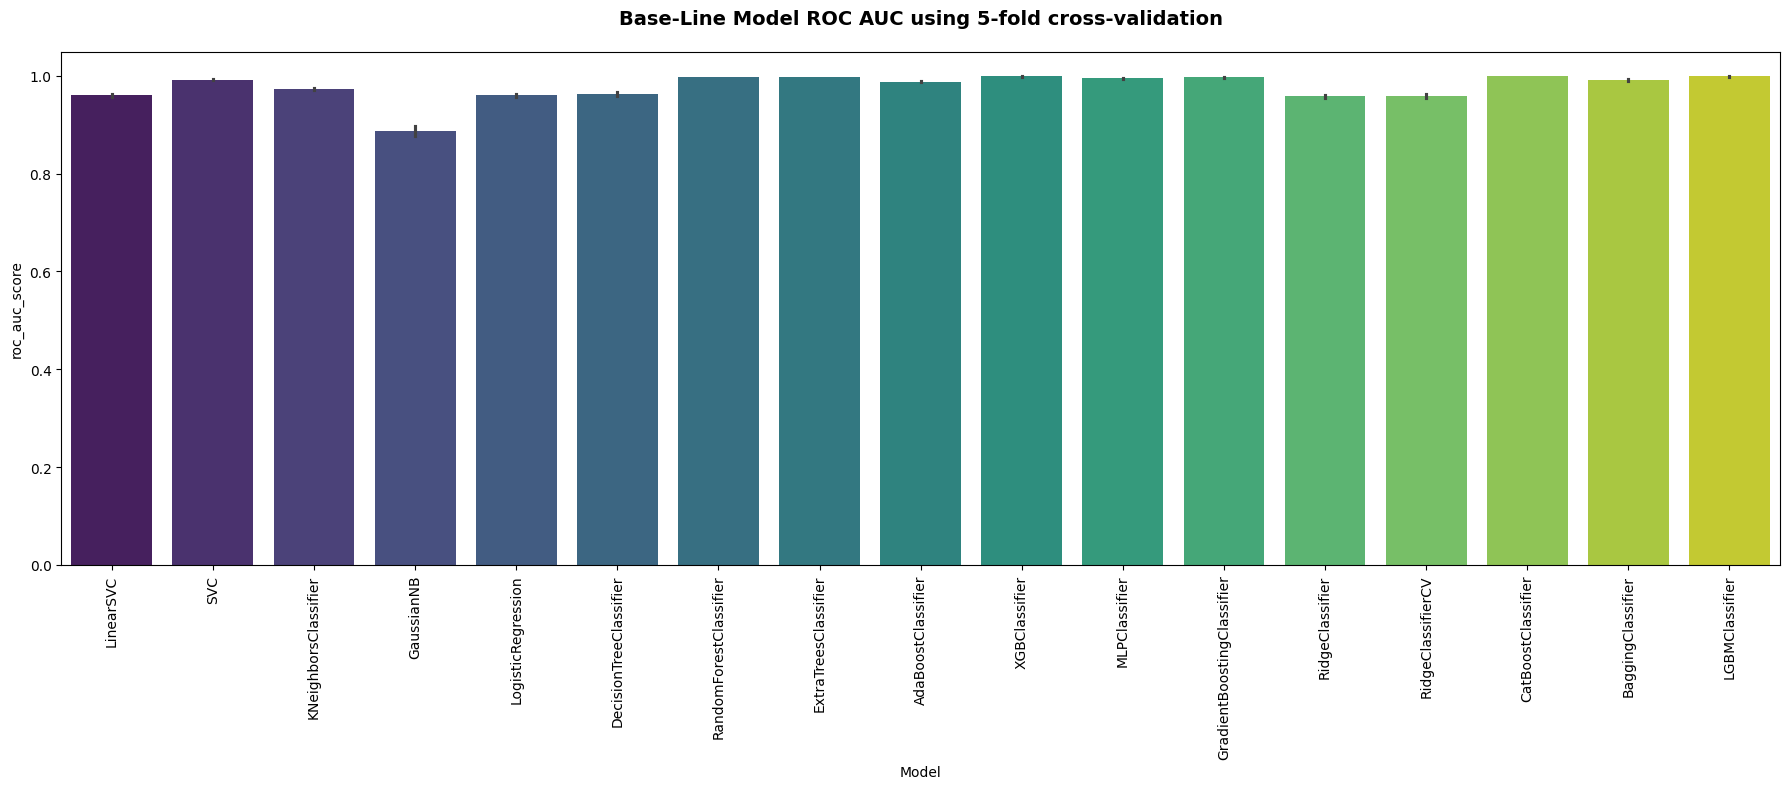

Mean  Standard Deviation
model_name                                              
CatBoostClassifier          0.999015            0.000306
LGBMClassifier              0.998846            0.000216
XGBClassifier               0.998770            0.000377
ExtraTreesClassifier        0.998109            0.000597
RandomForestClassifier      0.997760            0.000426
GradientBoostingClassifier  0.996869            0.000891
MLPClassifier               0.995256            0.001295
SVC                         0.992446            0.002150
BaggingClassifier           0.991464            0.002356
AdaBoostClassifier          0.988374            0.002588
KNeighborsClassifier        0.972864            0.001901
DecisionTreeClassifier      0.963016            0.005015
LinearSVC                   0.960137            0.004247
LogisticRegression          0.959914            0.004278
RidgeClassifierCV           0.958469            0.004313
RidgeClassifier             0.958446            0.004318
GaussianNB                  0.886432            0.012698

In [357]:
generate_baseline_results(plot_result = True)

# Hyperparameter tuning

In [377]:
def shap_plot(model, X_test, list_feature, type = None):    
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    X_test_sample = pd.DataFrame(X_test, columns=list_feature)
    explainer = shap.Explainer(model.predict, X_test_sample)
    shap_values = explainer(X_test_sample)
    if type =="bar":
        shap_importance = np.abs(shap_values.values).mean(axis=0)
        shap_df = pd.DataFrame({"feature": X_test_sample.columns, "importance": shap_importance})
        shap_df = shap_df.sort_values("importance", ascending=False).head(20)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=shap_df["importance"], y=shap_df["feature"], palette="viridis", order=shap_df["feature"])
        plt.xlabel("mean(|SHAP value|)")
        plt.title("SHAP Feature Importance")
        plt.tight_layout()
        plt.show()
    else:
        shap.summary_plot(shap_values, X_test_sample)

In [359]:
def plot_ROC_confusionMatrix(estimator, X_val, y_val, figsize):
    y_pred_prob = estimator.predict_proba(X_val)[:, 1]  # Probability of positive class
    y_pred = estimator.predict(X_val)

    fig, ax = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=figsize)
    
    # Plot 1    
    # Calculate ROC
    fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
    rocScore = roc_auc_score(y_val, y_pred_prob)

    ax[0, 0].plot(fpr, tpr, label=f"{estimator.__class__.__name__} (AUC = {rocScore:.2f})")
    ax[0, 0].plot([0, 1], [0, 1], "b--")
    ax[0, 0].set_xlabel("False Positive Rate")
    ax[0, 0].set_ylabel("True Positive Rate")
    ax[0, 0].set_title(f"ROC ({estimator.__class__.__name__})", weight="bold")
    ax[0, 0].legend()

    # Plot 2
    confusionMatrix = confusion_matrix(y_val, y_pred)
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", ax=ax[0, 1])
    ax[0, 1].set_title(f"Confusion Matrix ({estimator.__class__.__name__})", weight="bold")
    ax[0, 1].set_xlabel("Prediction")
    ax[0, 1].set_ylabel("Actual")

    # plot 3
    precision, recall, thresholds_pr = precision_recall_curve(y_val, y_pred_prob)
    pr_auc = auc(recall, precision)
    ax[1, 0].plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.3f})")
    ax[1, 0].set_xlabel("Recall")
    ax[1, 0].set_ylabel("Precision")
    ax[1, 0].set_title("Precision-Recall Curve")
    ax[1, 0].legend()
    
    ax.flat[-1].set_visible(False)

    plt.tight_layout()
    plt.show()

    print(classification_report(y_val, y_pred))

In [360]:
# Function to evaluate models
def evaluate_model(model, X_train, X_val, y_train, y_val, figsize = (15, 6), show_shap_plot = False):
    print(f"Evaluating {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    plot_ROC_confusionMatrix(estimator = model, X_val = X_val, y_val = y_val, figsize = figsize)
    if show_shap_plot:
        shap_sample = X_val.iloc[:200] if isinstance(X_val, pd.DataFrame) else X_val[:200]
        shap_plot(model=model, X_test=shap_sample, list_feature=list_feature_prepared)

In [361]:
X_test = start_test_set.drop("Attrition_Flag", axis=1)
y_test = start_test_set["Attrition_Flag"].copy()
X_test_prepared = preprocessor.transform(X_test)

## CatBoostClassifier

In [362]:
# After running optuna.
param_cb = {
 "iterations": 687,
 "learning_rate": 0.22278841471925673,
 "depth": 7,
 "l2_leaf_reg": 2.146037400088227,
 "border_count": 54,
 "random_strength": 0.07669797192938685,
 "bagging_temperature": 0.9398972489915723,
 "eval_metric": "AUC",
 "loss_function": "Logloss",
 "verbose": 0,
 "random_seed": seed
}

In [363]:
best_model_cb = CatBoostClassifier(**param_cb)
best_model_cb

Evaluating CatBoostClassifier...


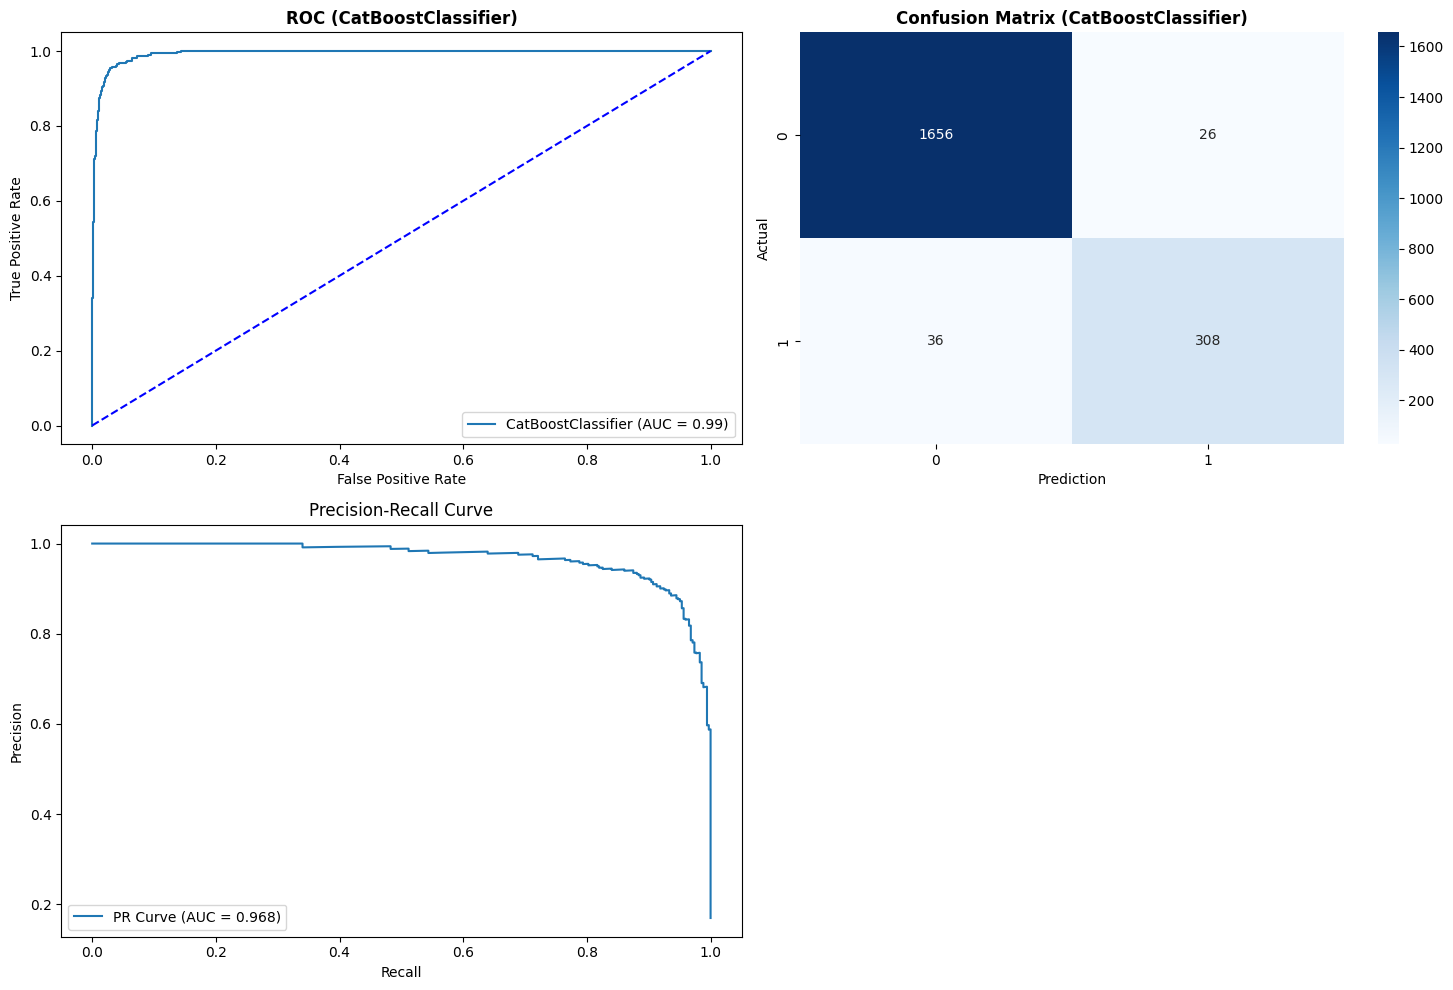

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1682
           1       0.92      0.90      0.91       344

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026



In [364]:
evaluate_model(model = best_model_cb, X_train=X_resampled, X_val=X_test_prepared,
               y_train=y_resampled, y_val=y_test, figsize=(15, 10), show_shap_plot=False)

## LGBMClassifier

In [365]:
# After running optuna.
param_lgbm = {
 "n_estimators": 864,
 "learning_rate": 0.061163220617013334,
 "num_leaves": 110,
 "max_depth": 13,
 "min_child_samples": 31,
 "subsample": 0.6463158924558087,
 "colsample_bytree": 0.7909944139467433,
 "reg_alpha": 7.855232280011533e-07,
 "reg_lambda": 0.1044433782968261,
 "random_seed": seed,
 "n_jobs": -1,
 "verbosity": -1
}

In [366]:
best_model_lgbm = LGBMClassifier(**param_lgbm)
best_model_lgbm

LGBMClassifier(colsample_bytree=0.7909944139467433,
               learning_rate=0.061163220617013334, max_depth=13,
               min_child_samples=31, n_estimators=864, n_jobs=-1,
               num_leaves=110, random_seed=42, reg_alpha=7.855232280011533e-07,
               reg_lambda=0.1044433782968261, subsample=0.6463158924558087,
               verbosity=-1)

Evaluating LGBMClassifier...


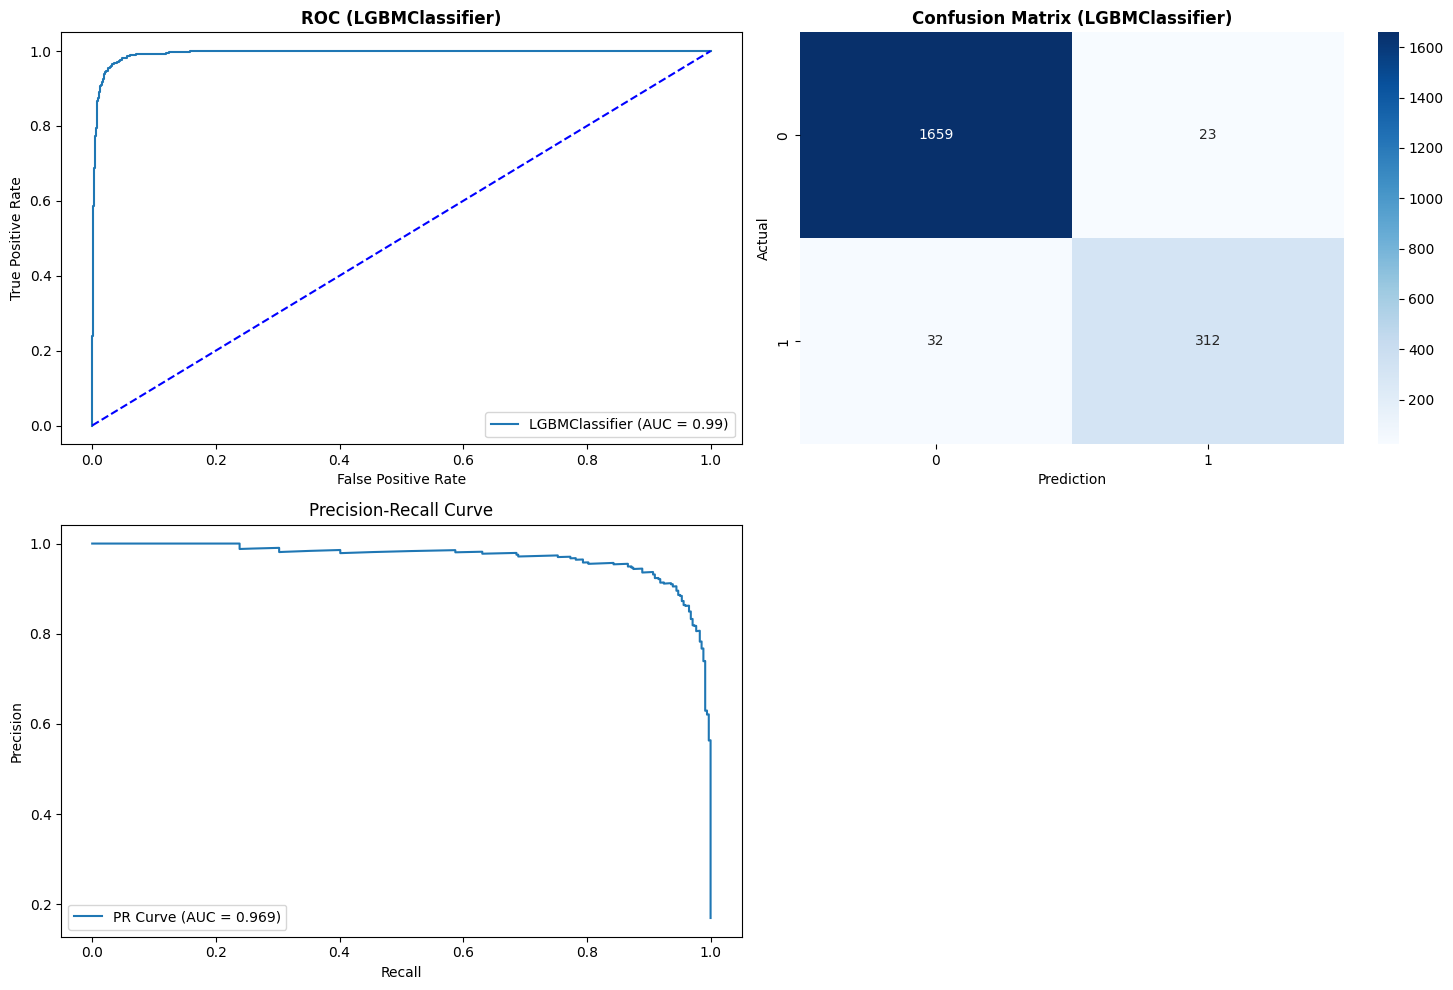

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1682
           1       0.93      0.91      0.92       344

    accuracy                           0.97      2026
   macro avg       0.96      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026



In [367]:
evaluate_model(model = best_model_lgbm, X_train=X_resampled, X_val=X_test_prepared,
               y_train=y_resampled, y_val=y_test, figsize=(15, 10), show_shap_plot=False)

## XGBClassifier

In [368]:
# After running optuna.
param_xgb = {
 "n_estimators": 831,
 "max_depth": 12,
 "learning_rate": 0.02583971809059078,
 "subsample": 0.6245033991063241,
 "colsample_bytree": 0.7600912832095267,
 "gamma": 1.8611817476742898,
 "reg_alpha": 0.28438437703658187,
 "reg_lambda": 0.00013468443121609304,
 "min_child_weight": 1,
 "n_jobs": -1,
 "verbosity": 0,
 "use_label_encoder": False,
 "eval_metric": "auc"
}

In [369]:
best_model_xgb = XGBClassifier(**param_xgb)
best_model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7600912832095267, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, feature_weights=None,
              gamma=1.8611817476742898, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02583971809059078,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=831, n_jobs=-1,
              num_parallel_tree=None, ...)

Evaluating XGBClassifier...


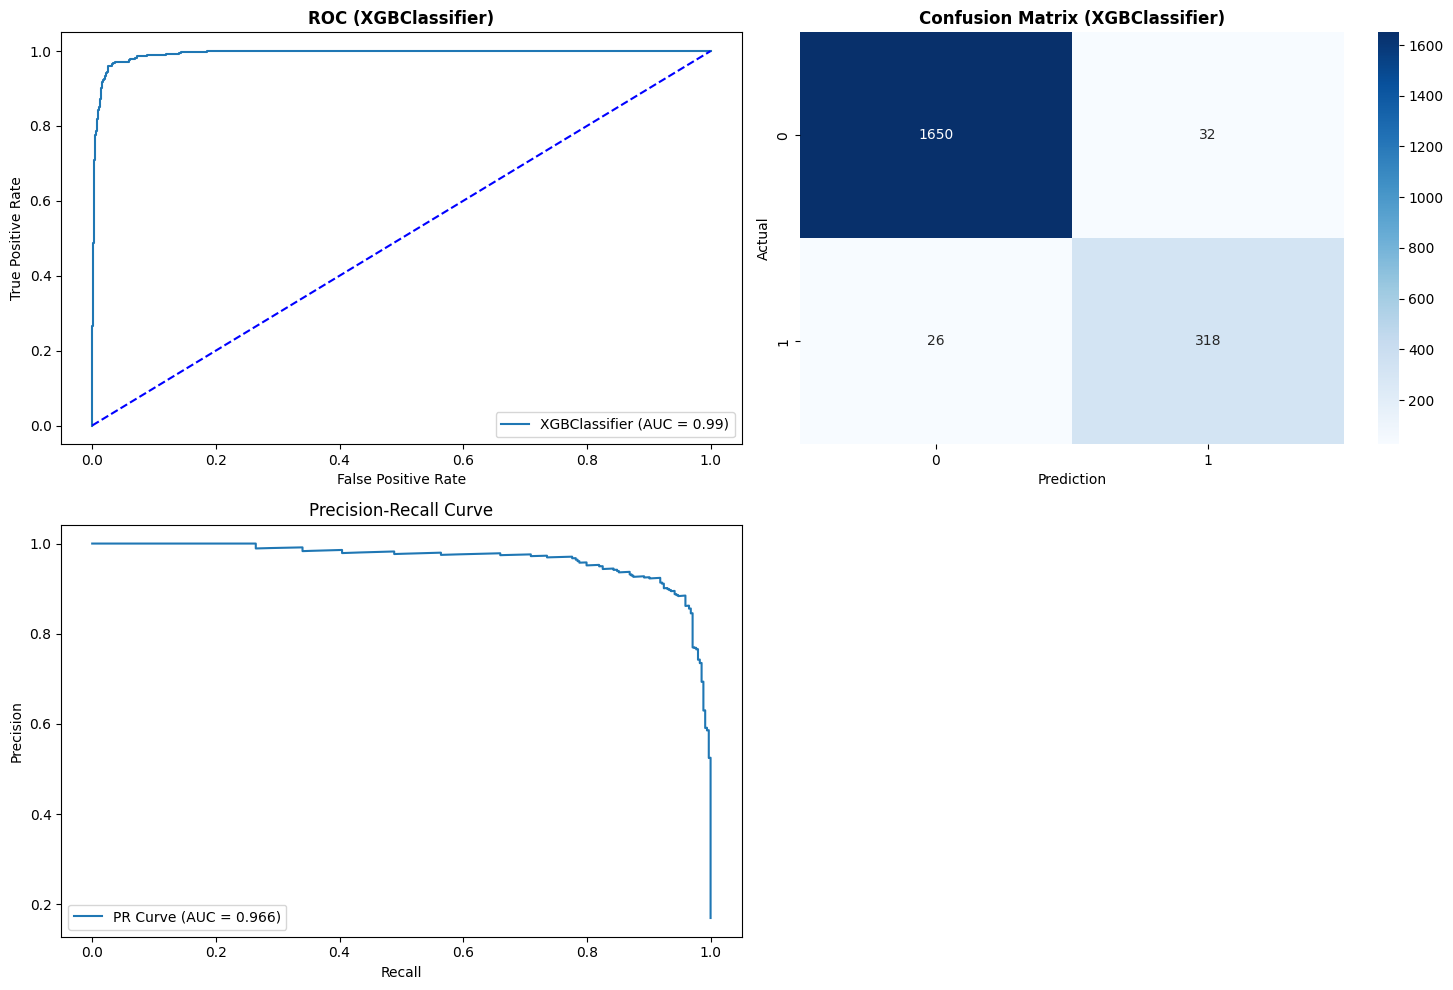

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1682
           1       0.91      0.92      0.92       344

    accuracy                           0.97      2026
   macro avg       0.95      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026



In [370]:
evaluate_model(model = best_model_xgb, X_train=X_resampled, X_val=X_test_prepared,
               y_train=y_resampled, y_val=y_test, figsize=(15, 10), show_shap_plot=False)

# Conclusion

## VotingClassifier

In [372]:
from sklearn.ensemble import VotingClassifier
voting_clf_soft = VotingClassifier(
    estimators=[
        ("catboost", best_model_cb),
        ("xgb", best_model_xgb),
        ("lgbm", best_model_lgbm)
    ],
    voting="soft",
    n_jobs=-1
)

In [373]:
cv_scores = cross_val_score(
    voting_clf_soft,
    X=X_resampled,
    y=y_resampled,
    cv=kfold,
    scoring="roc_auc",
    n_jobs=-1
)
print(f"Cross-validated ROC AUC (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

/Users/User Files/Business Project/Bank Customer Credit Card Churn/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/User Files/Business Project/Bank Customer Credit Card Churn/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/User Files/Business Project/Bank Customer Credit Card Churn/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/User Files/Business Project/Bank Customer Credit Card Churn/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Cross-validated ROC AUC (mean ± std): 0.9990 ± 0.0003


/Users/User Files/Business Project/Bank Customer Credit Card Churn/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Evaluating VotingClassifier...


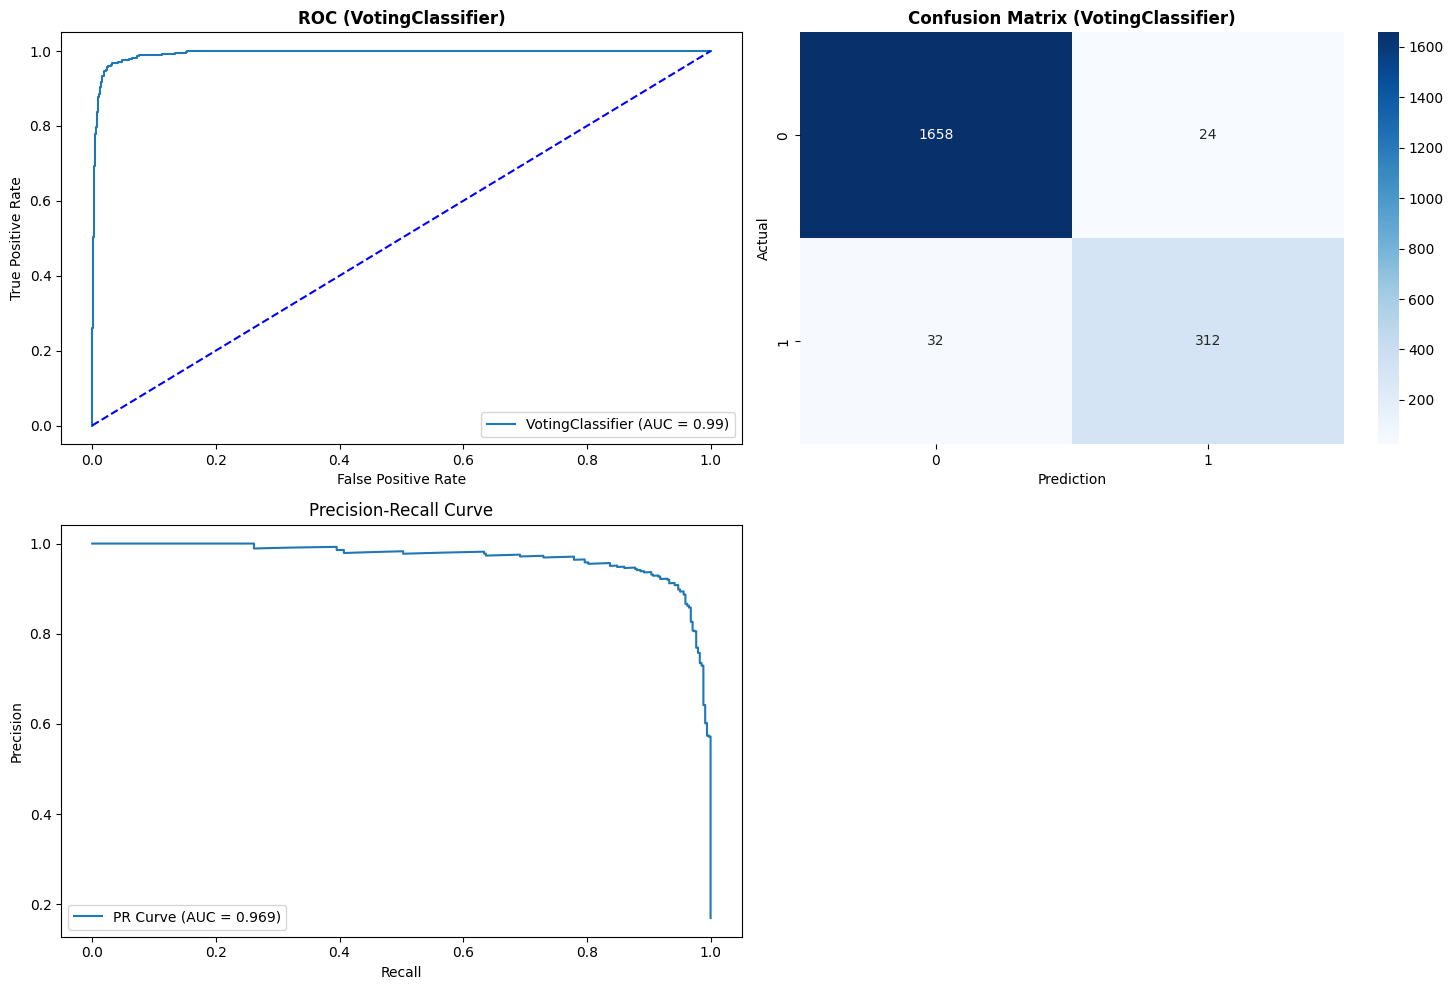

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1682
           1       0.93      0.91      0.92       344

    accuracy                           0.97      2026
   macro avg       0.95      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026



In [374]:
evaluate_model(model = voting_clf_soft, X_train=X_resampled, X_val=X_test_prepared,
               y_train=y_resampled, y_val=y_test, figsize=(15, 10), show_shap_plot=False)

PermutationExplainer explainer: 201it [00:56,  3.05it/s]                         


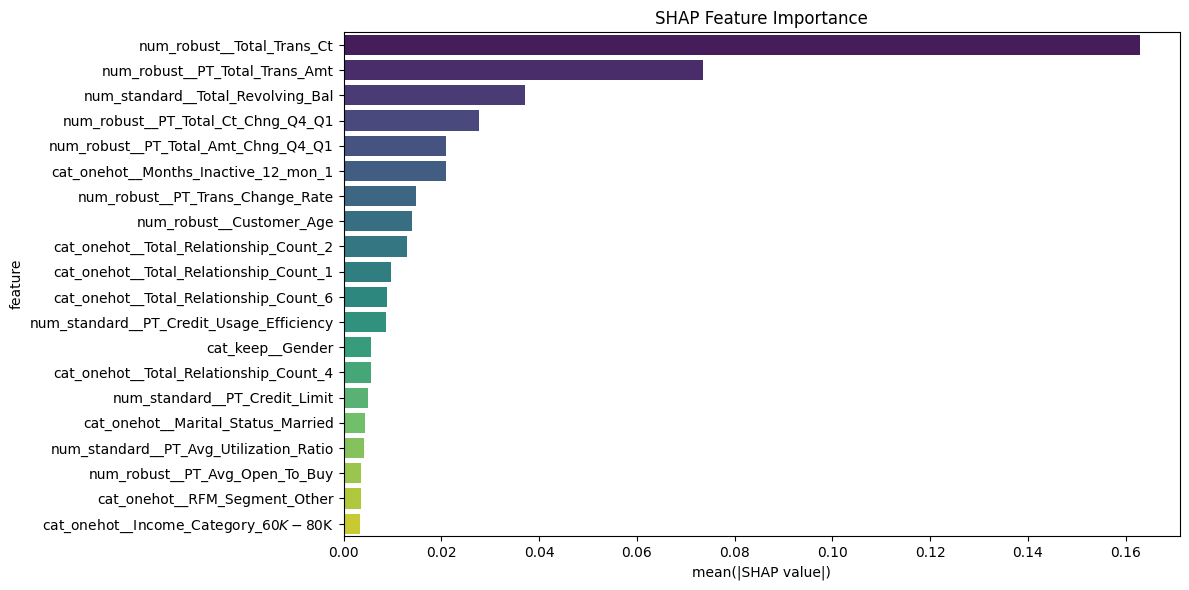

In [375]:
shap_sample = X_test_prepared.iloc[:200] if isinstance(X_test_prepared, pd.DataFrame) else X_test_prepared[:200]
shap_plot(model=voting_clf_soft, X_test=shap_sample, list_feature=list_feature_prepared, type="bar")

PermutationExplainer explainer: 201it [00:53,  3.04it/s]                         


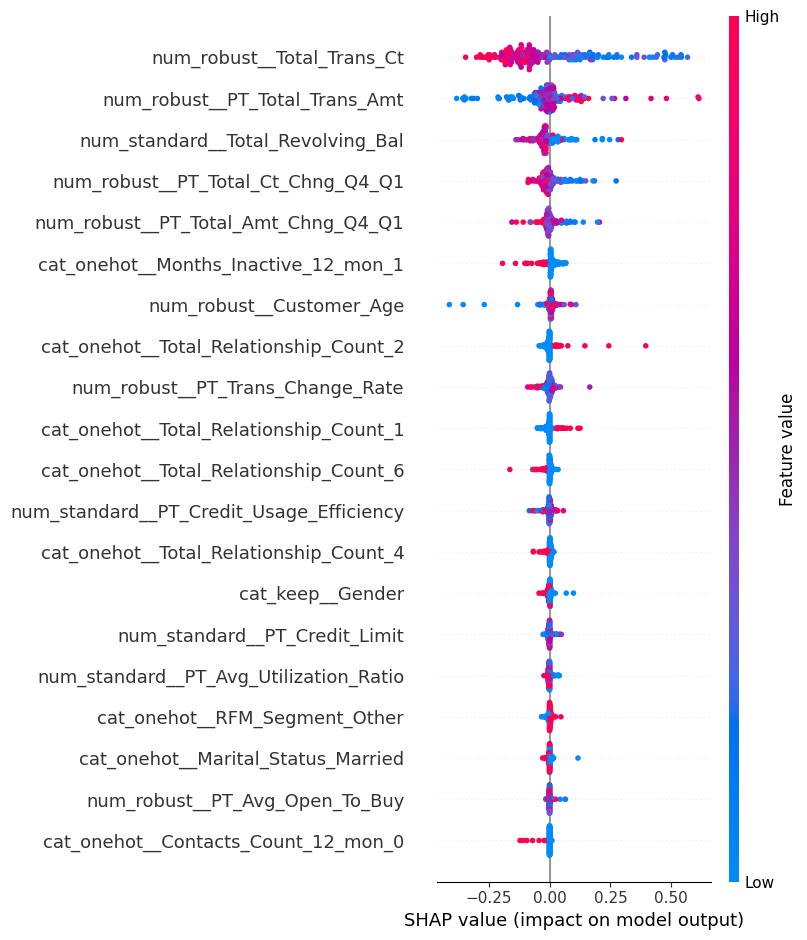

In [376]:
shap_plot(model=voting_clf_soft, X_test=shap_sample, list_feature=list_feature_prepared)

**Top 5 Most Influential Features**

| Feature                                         | Interpretation                                                                                                                           |
| ----------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------- |
| **num\_robust\_\_Total\_Trans\_Ct**             | Transaction count is the **most important factor**. More frequent transactions (red) lead to higher credit score predictions.            |
| **num\_robust\_\_PT\_Total\_Trans\_Amt**        | Total transaction amount (proportional). Higher spending indicates stronger financial behavior, contributing positively to credit score. |
| **num\_standard\_\_Total\_Revolving\_Bal**      | Total revolving balance. High values (red) lead to negative SHAP values — indicating potential risk due to high debt levels.             |
| **num\_robust\_\_PT\_Total\_Ct\_Chng\_Q4\_Q1**  | Change in transaction count between Q4 and Q1. Sudden increases or drops reflect financial volatility and can influence score both ways. |
| **num\_robust\_\_PT\_Total\_Amt\_Chng\_Q4\_Q1** | Change in transaction amount between quarters. The impact is bidirectional depending on the direction and magnitude of change.           |

**Other Notable Features:**

| Feature                                    | Interpretation                                                                                                              |
| ------------------------------------------ | --------------------------------------------------------------------------------------------------------------------------- |
| `cat_onehot__Months_Inactive_12_mon_1`     | Customers inactive for 1 month in the past year show strong negative impact (red dots shifting left).                       |
| `num_robust__Customer_Age`                 | Age has mild influence. Older customers tend to have positive SHAP values, possibly reflecting more stable credit behavior. |
| `num_standard__PT_Credit_Usage_Efficiency` | Efficiency of credit usage — higher efficiency (red) contributes positively to credit score.                                |
| `cat_keep__Gender`                         | Minimal effect — the model doesn’t significantly differentiate by gender.                                                   |
| `num_standard__PT_Credit_Limit`            | Credit limit has minor influence but follows expected direction: higher limit → higher predicted score.                     |

**General Takeaways:**

* **Credit behavior** (transactions, balances, quarter-over-quarter changes) is the **dominant signal** in determining credit score.
* Categorical features like one-hot encoded `inactive months` and `relationship count` also provide meaningful patterns.
* **Demographics** like gender or marital status play a **less important role**, indicating the model focuses more on **behavioral and financial indicators**.

# Recommendation

**Summary Table – SHAP Importance & Statistical Significance**

| Feature                        | SHAP Importance | Stat Test Significance | Combined Insight                                                    | Suggested Action                                                    |
| ------------------------------ | --------------- | ---------------------- | ------------------------------------------------------------------- | ------------------------------------------------------------------- |
| **Total\_Trans\_Ct**           | Very High    | ✅ Significant          | Fewer transactions → higher churn risk                              | Monitor customers with low activity; send offers to re-engage usage |
| **Total\_Trans\_Amt**          | Very High    | ✅ Significant          | Lower spending → associated with higher churn                       | Encourage spend with personalized promotions                        |
| **Total\_Revolving\_Bal**      | High         | ✅ Significant          | Low balance may reflect card inactivity → churn risk                | Target low-usage customers with usage incentives                    |
| **Total\_Ct\_Chng\_Q4\_Q1**    | Medium       | ✅ Significant          | Smaller increase in transaction count → churn-prone                 | Flag drop in transactional patterns; re-engagement campaigns        |
| **Total\_Amt\_Chng\_Q4\_Q1**   | Medium       | ✅ Significant          | Low spending growth over time → churn signal                        | Promote positive spending trends through milestone offers           |
| **Avg\_Open\_To\_Buy**         | Low          | ✅ Significant          | Less available credit → potential disengagement                     | Consider offering alternative card options                          |
| **Contacts\_Count\_12\_mon**   | Low          | ✅ Significant          | Frequent contact → correlated with churn (possibly dissatisfaction) | Balance communication; avoid overwhelming the customer              |
| **Months\_Inactive\_12\_mon**  | Medium       | ✅ Significant          | 3–4 inactive months → strong churn predictor                        | Launch reactivation campaigns for inactive users                    |
| **Total\_Relationship\_Count** | Medium       | ✅ Significant          | Fewer linked products (1–2) → less loyal customers                  | Cross-sell/upsell to increase engagement and stickiness             |

**Overall Observations:**

* Strong alignment between **SHAP-based feature importance** and **statistical test results** reinforces trust in model behavior.
* Behavioral indicators (transactions, usage changes) dominate both SHAP impact and statistical correlation.
* Demographic features like `Gender`, `Marital_Status`, and `Education_Level` show low predictive value, validating the model’s behavioral focus.

**Strategic Recommendations:**

| Behavioral Segment              | Key Features                        | Recommended Strategy                                         |
| ------------------------------- | ----------------------------------- | ------------------------------------------------------------ |
| **Low activity users**          | `Total_Trans_Ct`, `Total_Trans_Amt` | Use cashback or bonus incentives tied to usage thresholds    |
| **Declining engagement**        | `*_Chng_Q4_Q1`                      | Early alerts + customer support follow-up                    |
| **Limited product holders**     | `Total_Relationship_Count`          | Introduce new product bundles or upgrade options             |
| **Inactive users (3–4 months)** | `Months_Inactive_12_mon`            | Trigger personalized reactivation flows                      |
| **Over-contacted customers**    | `Contacts_Count_12_mon`             | Optimize communication frequency and tailor outreach content |